In [102]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import datetime
import lxml
import requests
import selenium
from collections import OrderedDict
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import os
from datetime import datetime, timedelta
import shutil
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Image
import math 
from openpyxl.styles.colors import Color
from datetime import datetime, timedelta, time 
import openpyxl
from openpyxl import Workbook
from openpyxl import styles
from openpyxl.styles import Font, Color
from PIL import Image

In [1]:
%run ACR2CheckDocs.ipynb

MX:
WRONG WEEK
NK:
WRONG WEEK
MX:
WRONG WEEK
NK:
WRONG WEEK


## 1.) Getting Cleaned TW,LW,LY,2019 Data

In [24]:
def GettingLastYearDate(date):
    # Convert the input date to a datetime object
    input_date = datetime.strptime(date, "%m/%d/%Y")

    # Calculate the date of the same day in the previous year
    last_year_date = input_date - timedelta(days=365)

    # Format the date as "mm/dd/yyyy"
    formatted_date = last_year_date.strftime("%m/%d/%Y")

    return formatted_date

In [25]:
current_year_date=datetime.now().date().strftime("%m/%d/%Y") 

In [26]:
import pandas as pd


def convert_date_format(df):
    # Convert the 'Travel Dates' column to datetime format
    df['Travel Date'] = pd.to_datetime(df['Travel Date'])

    # Convert the dates to the desired format
    df['Travel Date'] = df['Travel Date'].dt.strftime('%b %d, %Y')

    # Return the updated DataFrame
    return df



def getCSVs(mkt_airline):
    data_paths = []
    for airline in mkt_airline:
        OGTWData = airline + "TWPullData.csv"
        OGLWData = airline + "LWPullData.csv"
        OGLYData = airline + "LYData.csv"
        if airline in ['XP', 'MX']:
            data_paths.append((OGTWData, OGLWData, OGLYData))
        else:
            OGTwenty19Data = airline + "2019PullData.csv"
            data_paths.append((OGTWData, OGLWData, OGLYData, OGTwenty19Data))
    return data_paths

def cleanCSVs(file_paths):
    cleaned_data = []
    for paths in file_paths:
        TWData = pd.read_csv(paths[0], skiprows=5)
        LWData = pd.read_csv(paths[1], skiprows=5)
        LastYearData = pd.read_csv(paths[2], skiprows=5)
        TWData.dropna(inplace=True)
        LWData.dropna(inplace=True)
        LastYearData.dropna(inplace=True)
        TWData = convert_date_format(TWData)
        LWData = convert_date_format(LWData)
        LYData = convert_date_format(LastYearData)
        if len(paths) == 4:
            Twenty19Data = pd.read_csv(paths[3], skiprows=5)
            Twenty19Data.dropna(inplace=True)
            Twenty19Data = convert_date_format(Twenty19Data)
            cleaned_data.append((TWData, LWData, LYData, Twenty19Data))
        else:
            cleaned_data.append((TWData, LWData, LYData))
    return cleaned_data


def Clean1CSV(file):
    Data=pd.read_csv(file, skiprows=5)
    Data.dropna(inplace=True)
    Data=convert_date_format(Data)
    return Data

In [27]:
mkt_airline = ['NK','SY','XP','MX','G4','F9','B6','AS','AA','UA','DL','WN']
file_paths = getCSVs(mkt_airline)
cleaned_data = cleanCSVs(file_paths)

In [28]:
NKThisWeekData=cleaned_data[0][0]
SYThisWeekData=cleaned_data[1][0]
XPThisWeekData=cleaned_data[2][0]
MXThisWeekData=cleaned_data[3][0]
G4ThisWeekData=cleaned_data[4][0]
F9ThisWeekData=cleaned_data[5][0]
B6ThisWeekData=cleaned_data[6][0]
ASThisWeekData=cleaned_data[7][0]
AAThisWeekData=cleaned_data[8][0]
UAThisWeekData=cleaned_data[9][0]
DLThisWeekData=cleaned_data[10][0]
WNThisWeekData=cleaned_data[11][0]

NKLastWeekData=cleaned_data[0][1]
SYLastWeekData=cleaned_data[1][1]
XPLastWeekData=cleaned_data[2][1]
MXLastWeekData=cleaned_data[3][1]
G4LastWeekData=cleaned_data[4][1]
F9LastWeekData=cleaned_data[5][1]
B6LastWeekData=cleaned_data[6][1]
ASLastWeekData=cleaned_data[7][1]
AALastWeekData=cleaned_data[8][1]
UALastWeekData=cleaned_data[9][1]
DLLastWeekData=cleaned_data[10][1]
WNLastWeekData=cleaned_data[11][1]

NKLastYearData=cleaned_data[0][2]
SYLastYearData=cleaned_data[1][2]
XPLastYearData=cleaned_data[2][2]
MXLastYearData=cleaned_data[3][2]
G4LastYearData=cleaned_data[4][2]
F9LastYearData=cleaned_data[5][2]
B6LastYearData=cleaned_data[6][2]
ASLastYearData=cleaned_data[7][2]
AALastYearData=cleaned_data[8][2]
UALastYearData=cleaned_data[9][2]
DLLastYearData=cleaned_data[10][2]
WNLastYearData=cleaned_data[11][2]

NKTwenty19Data=cleaned_data[0][3]
SYTwenty19Data=cleaned_data[1][3]
G4Twenty19Data=cleaned_data[4][3]
F9Twenty19Data=cleaned_data[5][3]
B6Twenty19Data=cleaned_data[6][3]
ASTwenty19Data=cleaned_data[7][3]
AATwenty19Data=cleaned_data[8][3]
UATwenty19Data=cleaned_data[9][3]
DLTwenty19Data=cleaned_data[10][3]
WNTwenty19Data=cleaned_data[11][3]


## 2.) Data Additions 

In [29]:
#This cell will add more info to the cleaned_data:

def AddMonthAndDay(file_path):
    WholeDates=file_path['Travel Date']
    WholeDates=pd.to_datetime(WholeDates)
    MonthDayOnly=WholeDates.dt.strftime("%B %d")
    file_path['Travel Month and Day']=MonthDayOnly
    MonthOnly=WholeDates.dt.strftime("%B")
    file_path['Month']=MonthOnly
    return file_path

def AddMonthAndYear(file_path):
    WholeDates=file_path['Travel Date']
    WholeDates=pd.to_datetime(WholeDates)
    MonthYearOnly=WholeDates.dt.strftime("%B %Y")
    file_path['Travel Month and Year']=MonthYearOnly
    return file_path

def WoWAddMonthAndYear(file_path):
    WholeDates=file_path['Travel Date']
    WholeDates=pd.to_datetime(WholeDates)
    MonthYearOnly=WholeDates.dt.strftime("%B %Y")
    file_path['Travel Month and Year']=MonthYearOnly
    return file_path

#Month Part Additions
def get_part_of_month(date):
    day = int(date.split()[1])
    if day <= 10:
        return 'Early'
    elif day <= 20:
        return 'Middle'
    else:
        return 'Late'


def Thanksgiving_range(date, first_day_of_week):
    month = date.split()[0]
    day = int(date.split()[1])
    if month == 'November':
        index = day
        thanksgiving_index = 1
        if day == 1:
            if first_day_of_week == 'Thursday':
                thanksgiving_index = 22
            elif first_day_of_week == 'Friday':
                thanksgiving_index = 28
            elif first_day_of_week == 'Saturday':
                thanksgiving_index = 27
            elif first_day_of_week == 'Sunday':
                thanksgiving_index = 26
            elif first_day_of_week == 'Monday':
                thanksgiving_index = 25
            elif first_day_of_week == 'Tuesday':
                thanksgiving_index = 24
            elif first_day_of_week == 'Wednesday':
                thanksgiving_index = 23
               
            if thanksgiving_index == 30:
                thanksgiving_range = list(range(thanksgiving_index - 6, 29))
            else:
                thanksgiving_range = list(range(thanksgiving_index - 6, thanksgiving_index + 4))
                return thanksgiving_range



def AddTurkeyTime(file_path):
    file_path['Seasonality'] = file_path.apply(lambda row: Thanksgiving_range(row['Travel Month and Day'], row['Day of Week']), axis=1)
    output=file_path['Seasonality'][0]
    for i in range(len(file_path)):
        file_path['Seasonality'][i] = output


def mark_seasonality(row):
    index = row.name+1
    date = row['Travel Month and Day']
    day_range = row['Seasonality']

    if index < min(day_range):
        return 'OP Fall'
    elif index in day_range:
        return 'Thanksgiving'
    elif index > max(day_range):
        return 'Post-Thanksgiving'

    return 'Other'

#Demand Period Additions/Definitions    
def get_seasonality(date, day_of_week):
    month = date.split()[0]
    day = int(date.split()[1])
    day_of_week = day_of_week.strip()
    if month in ['January']:
        if day <= 3:
            return 'Xmas/NY'
        elif day>=4 and day<=10:
            return 'Three Kings'
        elif day> 10 and day<=17:
            return 'Mid ' + 'Jan'
        else:
            return 'Off Peak Winter'
    elif month in ['February']:
        if day <= 13:
            return 'Off Peak Winter'
        else:
            return 'Pres day-Pre SB'
    elif month in ['March']:
        if day <= 6:
            return 'Pres day-Pre SB'
        elif day>=7 and day<24:
            return 'SB1'
        else:
            return 'SB2+Easter'
    elif month in ['April']:
        if day <= 7:
            return 'SB2+Easter'
        else:
            return 'Intra-Peak Spring'
    elif month in ['May']:
        if day<=14:
            return 'Intra-Peak Spring'
        else:
            return 'Early Summer+Mem Day'
    elif month in ['June']:
        if day<=13:
            return 'Early Summer+Mem Day'
        else:
            return 'Summer'
    elif month in ['July']:
        return 'Summer'
    elif month in ['August']:
        if day<=11:
            return 'Summer'
        else:
            return 'Late Summer'
    elif month in ['September']:
        if day<=5:
            return 'Late Summer'
        else:
            return 'Early Fall'
    elif month in ['October']:
        if day<=5:
            return 'Early Fall'
        elif day>=6 and day<=27:
            return 'Fall'
        else:
            return 'OP Fall'
    elif month in ['December']:
        if day==1 and day_of_week=='Sunday':
            if day==1:
                return 'Thanksgiving'
            elif day>1 and day<=19:
                return 'Post-Thanksgiving'
            else:
                return 'Xmas/NY'
        else:
            if day<=19:
                return 'Post-Thanksgiving'
            else:
                return 'Xmas/NY'
            
           
    elif month in ['November']:  #(EDIT)November Needs Adjustments!! 
        if day<=16:              #This is set for 2023, change for 2024 when necessary
            return 'OP Fall'
        elif day>16 and day<=26:
            return 'Thanksgiving' 
        elif day>=27 and day<=30:
            return 'Post-Thanksgiving'

#Adding Month Part
def AddMonthRange(file_path):
    file_path['Part of Month'] = file_path['Travel Month and Day'].apply(get_part_of_month)

#Adding Demand Period    
def AddSeasonality(file_path):
    file_path['Seasonality'] = file_path.apply(lambda row: get_seasonality(row['Travel Month and Day'], row['Day of Week']), axis=1)


def AddMoreInfo(file_path):
    AddMonthRange(file_path)
    AddSeasonality(file_path)
    return file_path



    

In [30]:
NKThisWeekData=AddMonthAndDay(NKThisWeekData)
SYThisWeekData=AddMonthAndDay(SYThisWeekData)
XPThisWeekData=AddMonthAndDay(XPThisWeekData)
MXThisWeekData=AddMonthAndDay(MXThisWeekData)
G4ThisWeekData=AddMonthAndDay(G4ThisWeekData)
F9ThisWeekData=AddMonthAndDay(F9ThisWeekData)
B6ThisWeekData=AddMonthAndDay(B6ThisWeekData)
ASThisWeekData=AddMonthAndDay(ASThisWeekData)
AAThisWeekData=AddMonthAndDay(AAThisWeekData)
UAThisWeekData=AddMonthAndDay(UAThisWeekData)
DLThisWeekData=AddMonthAndDay(DLThisWeekData)
WNThisWeekData=AddMonthAndDay(WNThisWeekData)

NKLastWeekData=AddMonthAndDay(NKLastWeekData)
SYLastWeekData=AddMonthAndDay(SYLastWeekData)
XPLastWeekData=AddMonthAndDay(XPLastWeekData)
MXLastWeekData=AddMonthAndDay(MXLastWeekData)
G4LastWeekData=AddMonthAndDay(G4LastWeekData)
F9LastWeekData=AddMonthAndDay(F9LastWeekData)
B6LastWeekData=AddMonthAndDay(B6LastWeekData)
ASLastWeekData=AddMonthAndDay(ASLastWeekData)
AALastWeekData=AddMonthAndDay(AALastWeekData)
UALastWeekData=AddMonthAndDay(UALastWeekData)
DLLastWeekData=AddMonthAndDay(DLLastWeekData)
WNLastWeekData=AddMonthAndDay(WNLastWeekData)

NKLastYearData=AddMonthAndDay(NKLastYearData)
SYLastYearData=AddMonthAndDay(SYLastYearData)
XPLastYearData=AddMonthAndDay(XPLastYearData)
MXLastYearData=AddMonthAndDay(MXLastYearData)
G4LastYearData=AddMonthAndDay(G4LastYearData)
F9LastYearData=AddMonthAndDay(F9LastYearData)
B6LastYearData=AddMonthAndDay(B6LastYearData)
ASLastYearData=AddMonthAndDay(ASLastYearData)
AALastYearData=AddMonthAndDay(AALastYearData)
UALastYearData=AddMonthAndDay(UALastYearData)
DLLastYearData=AddMonthAndDay(DLLastYearData)
WNLastYearData=AddMonthAndDay(WNLastYearData)

NKTwenty19Data=AddMonthAndDay(NKTwenty19Data)
SYTwenty19Data=AddMonthAndDay(SYTwenty19Data)
G4Twenty19Data=AddMonthAndDay(G4Twenty19Data)
F9Twenty19Data=AddMonthAndDay(F9Twenty19Data)
B6Twenty19Data=AddMonthAndDay(B6Twenty19Data)
ASTwenty19Data=AddMonthAndDay(ASTwenty19Data)
AATwenty19Data=AddMonthAndDay(AATwenty19Data)
UATwenty19Data=AddMonthAndDay(UATwenty19Data)
DLTwenty19Data=AddMonthAndDay(DLTwenty19Data)
WNTwenty19Data=AddMonthAndDay(WNTwenty19Data)

In [31]:
F9ThisWeekData

,Airline Code,Travel Date,Day of Week,Origin Code,Destination Code,Type,Flights,Seats,ASMs,Travel Month and Day,Month
0,F9,"Nov 13, 2023",Monday,ATL,BUF,Narrow,1,186.0,132432.0,November 13,November
1,F9,"Nov 13, 2023",Monday,ATL,BWI,Narrow,2,470.0,270720.0,November 13,November
2,F9,"Nov 13, 2023",Monday,ATL,CLE,Narrow,1,180.0,99720.0,November 13,November
3,F9,"Nov 13, 2023",Monday,ATL,CUN,Narrow,2,460.0,405260.0,November 13,November
4,F9,"Nov 13, 2023",Monday,ATL,CVG,Narrow,2,426.0,158898.0,November 13,November
...,...,...,...,...,...,...,...,...,...,...,...
58152,F9,"Apr 09, 2024",Tuesday,TTN,ATL,Narrow,1,186.0,130386.0,April 09,April
58153,F9,"Apr 09, 2024",Tuesday,TTN,FLL,Narrow,1,186.0,190836.0,April 09,April
58154,F9,"Apr 09, 2024",Tuesday,TTN,MCO,Narrow,2,372.0,333684.0,April 09,April
58155,F9,"Apr 09, 2024",Tuesday,TTN,PBI,Narrow,1,186.0,183210.0,April 09,April


In [32]:
#This cell puts all files in one list which will be referneced later on in the code 
#We also add Month part, Demand Period, and aMkt

AirlineDataFrames = [
    "NKThisWeekData", "SYThisWeekData", "XPThisWeekData", "MXThisWeekData",
    "G4ThisWeekData", "F9ThisWeekData", "B6ThisWeekData", "ASThisWeekData",
    "AAThisWeekData", "UAThisWeekData", "DLThisWeekData", "WNThisWeekData",
    "NKLastYearData", "SYLastYearData", "XPLastYearData", "MXLastYearData",
    "G4LastYearData", "F9LastYearData", "B6LastYearData", "ASLastYearData",
    "AALastYearData", "UALastYearData", "DLLastYearData", "WNLastYearData",
    "NKTwenty19Data", "SYTwenty19Data", "G4Twenty19Data", "F9Twenty19Data",
    "B6Twenty19Data", "ASTwenty19Data", "AATwenty19Data", "UATwenty19Data",
    "DLTwenty19Data", "WNTwenty19Data", "NKLastWeekData", "SYLastWeekData", 
    "XPLastWeekData", "MXLastWeekData", "G4LastWeekData", "F9LastWeekData", 
    "B6LastWeekData", "ASLastWeekData", "AALastWeekData", "UALastWeekData", 
    "DLLastWeekData", "WNLastWeekData",
]

for variable_name in AirlineDataFrames:
    globals()[variable_name] = AddMoreInfo(globals()[variable_name])

#aMkt Additions  
def sort_codes(row):
    return ''.join(sorted([row['Origin Code'], row['Destination Code']]))

def AddAlphaMarket(file_path):
    file_path['aMkt'] = file_path.apply(sort_codes, axis=1)
    return file_path

for variable_name in AirlineDataFrames:
    globals()[variable_name] = AddAlphaMarket(globals()[variable_name])


In [33]:
#This cell adds more information inclduing F9overlap, stage, distance

def GatherF9Markets(file_path):
    unique_values = file_path['aMkt'].unique().tolist()
    return unique_values

def CheckOverlapAndMark(other_df, F9Mkts):
    # Step 2: Check the overlap
    overlap_mask = other_df['aMkt'].isin(F9Mkts)

    # Step 3: Mark the overlap
    # Creating a new column 'is_overlap' and fill it with 'Yes' if there is an overlap, 'No' otherwise
    other_df['F9overlap'] = overlap_mask.replace({True: 'Yes', False: 'No'})

    return other_df


def AddDistance(df):
    """
    Function to add a 'Distance' column to a dataframe.
    
    Parameters:
    df (DataFrame): The DataFrame you want to modify.
    
    Returns:
    DataFrame: The modified DataFrame.
    """
    # Convert 'Seats' column to numeric values, coercing non-numeric values to NaN
    df['Seats'] = pd.to_numeric(df['Seats'], errors='coerce')

    # Calculate 'Distance' column
    df['Distance'] = df['ASMs'] / df['Seats']

    # Return modified DataFrame
    return df


def AddStageGroup(df):
    """
    Function to add a 'Stage Group' column to a DataFrame based on 'Distance_y' values.

    Parameters:
    MergedTable (DataFrame): DataFrame with 'Distance_y' column.

    Returns:
    DataFrame: The modified DataFrame with an additional 'Stage Group' column.
    """
    def assign_stage_group(distance):
        if distance < 750:
            return "Short Haul"
        elif 750 <= distance < 1501:
            return "Medium Haul"
        elif 1501 <= distance < 2751:
            return "Long Haul"
        else:
            return "Xtra Long Haul"
        
    df['Stage Group'] = df['Distance'].apply(assign_stage_group)
    
    return df


In [34]:
#Split Lists Accordingly and apply F9 Overlap
F9WeeklyMarkets=GatherF9Markets(F9ThisWeekData)
F9YearMarkets=GatherF9Markets(F9LastYearData)
F9PrePandemicMarkets=GatherF9Markets(F9Twenty19Data)
F9WeeklyMarkets
# Initialize empty lists
WeekFiles = []
YearFiles = []
NineteenFiles = []

# Go through each file name
for file in AirlineDataFrames:
    # Check if 'Week' is in the file name
    if 'Week' in file:
        WeekFiles.append(file)
    # Check if 'Year' is in the file name
    elif 'Year' in file:
        YearFiles.append(file)
    # Check if '19' is in the file name
    elif '19' in file:
        NineteenFiles.append(file)


for file in WeekFiles:
    # Get the DataFrame from the current environment
    df = globals()[file]
    # Apply the function to the DataFrame
    CheckOverlapAndMark(df, F9WeeklyMarkets)

for file in YearFiles:
    # Get the DataFrame from the current environment
    df = globals()[file]
    # Apply the function to the DataFrame
    CheckOverlapAndMark(df, F9YearMarkets)
    
for file in NineteenFiles:
    df=globals()[file]
    CheckOverlapAndMark(df, F9PrePandemicMarkets)

In [35]:
F9ThisWeekData

,Airline Code,Travel Date,Day of Week,Origin Code,Destination Code,Type,Flights,Seats,ASMs,Travel Month and Day,Month,Part of Month,Seasonality,aMkt,F9overlap
0,F9,"Nov 13, 2023",Monday,ATL,BUF,Narrow,1,186.0,132432.0,November 13,November,Middle,OP Fall,ATLBUF,Yes
1,F9,"Nov 13, 2023",Monday,ATL,BWI,Narrow,2,470.0,270720.0,November 13,November,Middle,OP Fall,ATLBWI,Yes
2,F9,"Nov 13, 2023",Monday,ATL,CLE,Narrow,1,180.0,99720.0,November 13,November,Middle,OP Fall,ATLCLE,Yes
3,F9,"Nov 13, 2023",Monday,ATL,CUN,Narrow,2,460.0,405260.0,November 13,November,Middle,OP Fall,ATLCUN,Yes
4,F9,"Nov 13, 2023",Monday,ATL,CVG,Narrow,2,426.0,158898.0,November 13,November,Middle,OP Fall,ATLCVG,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58152,F9,"Apr 09, 2024",Tuesday,TTN,ATL,Narrow,1,186.0,130386.0,April 09,April,Early,Intra-Peak Spring,ATLTTN,Yes
58153,F9,"Apr 09, 2024",Tuesday,TTN,FLL,Narrow,1,186.0,190836.0,April 09,April,Early,Intra-Peak Spring,FLLTTN,Yes
58154,F9,"Apr 09, 2024",Tuesday,TTN,MCO,Narrow,2,372.0,333684.0,April 09,April,Early,Intra-Peak Spring,MCOTTN,Yes
58155,F9,"Apr 09, 2024",Tuesday,TTN,PBI,Narrow,1,186.0,183210.0,April 09,April,Early,Intra-Peak Spring,PBITTN,Yes


In [36]:
#Check and see if we have all desired columns (without GeoRegions)
print(F9ThisWeekData.iloc[31450])


Airline Code                         F9
Travel Date                Feb 01, 2024
Day of Week                    Thursday
Origin Code                         CMH
Destination Code                    MCO
Type                             Narrow
Flights                               1
Seats                             186.0
ASMs                           149172.0
Travel Month and Day        February 01
Month                          February
Part of Month                     Early
Seasonality             Off Peak Winter
aMkt                             CMHMCO
F9overlap                           Yes
Name: 31450, dtype: object


In [37]:
#The following two cells format the ASMs and Seats in our 2019 files so that we can do furher calculations on
#(DO NOT EDIT CELL) If "Could not process DataFrame....Move on to next cell" outputs, move on- there is no error. 

dataframe_list = ['NKTwenty19Data', 'SYTwenty19Data', 'G4Twenty19Data', 
                  'F9Twenty19Data', 'B6Twenty19Data', 'ASTwenty19Data',
                  'AATwenty19Data', 'UATwenty19Data', 'DLTwenty19Data',
                  'WNTwenty19Data']

# Create a dictionary with keys as the names of dataframes and values as the dataframes themselves
dataframes = {df_name: globals()[df_name] for df_name in dataframe_list}

# # Apply the transformation to each dataframe
for df_name, df in dataframes.items():
    try:
        df['ASMs'] = df['ASMs'].str.replace(',', '').astype(float)
    except AttributeError:
        print(f"Could not process DataFrame {df_name}. Move on to next cell.")
        

In [38]:
dataframe_list = ['NKTwenty19Data', 'SYTwenty19Data', 'B6Twenty19Data',
                  'ASTwenty19Data', 'AATwenty19Data', 'UATwenty19Data',
                  'DLTwenty19Data', 'WNTwenty19Data']

for df_name in dataframe_list:
    df = globals()[df_name]  # Get DataFrame by name
    if df['Seats'].dtype == 'object':  # If 'Seats' is object type
        df['Seats'] = df['Seats'].apply(lambda x: int(x.replace(',', '')) if isinstance(x, str) else x)
    df['Seats'] = df['Seats'].astype(object)


In [39]:
#The two following cells add Distance, Stage, Peak/Off-Peak/and TravelMonth and Year to all files in AirlineDataFrames

In [40]:
for variable_name in AirlineDataFrames:
    globals()[variable_name] = AddDistance(globals()[variable_name])

for variable_name in AirlineDataFrames:
    globals()[variable_name] = AddStageGroup(globals()[variable_name])

In [41]:
def PeakOffPeak(file_path):
    """
    Function to add a 'Peak/Off-Peak' column to a dataframe.
    
    Parameters:
    df (DataFrame): The DataFrame you want to modify.
    
    Returns:
    DataFrame: The modified DataFrame.
    """
    # Define the mapping of days of the week to "P" and "OP"
    day_mapping = {'Tuesday': 'OP', 'Wednesday': 'OP', 'Saturday': 'OP',
                   'Monday': 'P', 'Thursday': 'P', 'Friday': 'P', 'Sunday': 'P'}
    
    # Create 'Peak/Off-Peak' column
    file_path['Peak/Off-Peak'] = file_path['Day of Week'].map(day_mapping)

    # Return modified DataFrame
    return file_path

for variable_name in AirlineDataFrames:
    globals()[variable_name] = PeakOffPeak(globals()[variable_name])
for variable_name in AirlineDataFrames:
    globals()[variable_name] = AddMonthAndYear(globals()[variable_name])

In [42]:
#Route Type Additions
AirportsGeoCodes=pd.read_csv("airports_geo_codes.csv")
AirportsGeoCodes
AirportsGeoCodes['Region'] = np.where((AirportsGeoCodes.Region =='A'), 'PNW', AirportsGeoCodes.Region)
AirportsGeoCodes['Region'] = np.where((AirportsGeoCodes.Region =='B'), 'NorCal', AirportsGeoCodes.Region)
AirportsGeoCodes['Region'] = np.where((AirportsGeoCodes.Region =='C'), 'SoCal', AirportsGeoCodes.Region)
AirportsGeoCodes['Region'] = np.where((AirportsGeoCodes.Region =='D'), 'North Mountain West', AirportsGeoCodes.Region)
AirportsGeoCodes['Region'] = np.where((AirportsGeoCodes.Region =='E'), 'Southwest', AirportsGeoCodes.Region)
AirportsGeoCodes['Region'] = np.where((AirportsGeoCodes.Region =='F'), 'North Mountain West', AirportsGeoCodes.Region)
AirportsGeoCodes['Region'] = np.where((AirportsGeoCodes.Region =='G'), 'South Mountain West', AirportsGeoCodes.Region)
AirportsGeoCodes['Region'] = np.where((AirportsGeoCodes.Region =='H'), 'South Central (N.TX/OK/NM)', AirportsGeoCodes.Region)
AirportsGeoCodes['Region'] = np.where((AirportsGeoCodes.Region =='I'), 'Great Plains', AirportsGeoCodes.Region)
AirportsGeoCodes['Region'] = np.where((AirportsGeoCodes.Region =='J'), 'South Central (TX/MS/LA)', AirportsGeoCodes.Region)
AirportsGeoCodes['Region'] = np.where((AirportsGeoCodes.Region =='K'), 'Midwest', AirportsGeoCodes.Region)
AirportsGeoCodes['Region'] = np.where((AirportsGeoCodes.Region =='L'), 'Great Lakes', AirportsGeoCodes.Region)
AirportsGeoCodes['Region'] = np.where((AirportsGeoCodes.Region =='M'), 'Southeast', AirportsGeoCodes.Region)
AirportsGeoCodes['Region'] = np.where((AirportsGeoCodes.Region =='N'), 'Mid-Atlantic', AirportsGeoCodes.Region)
AirportsGeoCodes['Region'] = np.where((AirportsGeoCodes.Region =='O'), 'Northeast', AirportsGeoCodes.Region)
AirportsGeoCodes['Region'] = np.where((AirportsGeoCodes.Region =='P'), 'Mexico Leisure', AirportsGeoCodes.Region)
AirportsGeoCodes['Region'] = np.where((AirportsGeoCodes.Region =='Q'), 'Puerto Rico', AirportsGeoCodes.Region)
AirportsGeoCodes['Region'] = np.where((AirportsGeoCodes.Region =='R'), 'Central America', AirportsGeoCodes.Region)
AirportsGeoCodes['Region'] = np.where((AirportsGeoCodes.Region =='S'), 'Carribean', AirportsGeoCodes.Region)
AirportsGeoCodes['Region'] = np.where((AirportsGeoCodes.Region =='T'), 'South America', AirportsGeoCodes.Region)
AirportsGeoCodes['Region'] = np.where((AirportsGeoCodes.Region =='U'), 'Mexico Other', AirportsGeoCodes.Region)
AirportsGeoCodes['Region'] = np.where((AirportsGeoCodes.Region =='V'), 'Canada', AirportsGeoCodes.Region)
MasterCodes=AirportsGeoCodes[['Code','Region']]

In [43]:
#Split Lists Accordingly and apply Geo Regions 
def GatherAirlineCodes(file_path):
    # Create a dictionary comprehension from 'code' to 'Region'
    code_to_region = {row['Code']: row['Region'] for _, row in file_path.iterrows()}
    return code_to_region


def AddGeoRegions(file_path, regiondict):
    # Map the 'Origin Code' to the corresponding region or 'No Region Found'
    file_path['Origin Region'] = file_path['Origin Code'].map(lambda x: regiondict.get(x, 'HI/AK'))
    file_path['Destination Region'] = file_path['Destination Code'].map(lambda x: regiondict.get(x, 'HI/AK'))
    
    return file_path


CodeRegionDict=GatherAirlineCodes(MasterCodes)
# Initialize empty lists
WeekFiles = []
YearFiles = []
NineteenFiles = []

# Go through each file name
for file in AirlineDataFrames:
    # Check if 'Week' is in the file name
    if 'Week' in file:
        WeekFiles.append(file)
    # Check if 'Year' is in the file name
    elif 'Year' in file:
        YearFiles.append(file)
    # Check if '19' is in the file name
    elif '19' in file:
        NineteenFiles.append(file)


for file in WeekFiles:
    # Get the DataFrame from the current environment
    df = globals()[file]
    # Apply the function to the DataFrame
    AddGeoRegions(df, CodeRegionDict)

for file in YearFiles:
    # Get the DataFrame from the current environment
    df = globals()[file]
    # Apply the function to the DataFrame
    AddGeoRegions(df, CodeRegionDict)
    
for file in NineteenFiles:
    df=globals()[file]
    AddGeoRegions(df, CodeRegionDict)

In [44]:
def AddRouteType(file_path):
    def determine_route(origin, destination):
        # Define regions for simplicity
#         west = ["Southwest", "PNW","SoCal","NorCal",'North Mountain West','South Mountain West','South Central (N.TX/OK/NM)']  # Example regions, replace with your actual regions
#         east = ["Northeast", "Mid-Atlantic", "Great Plains", "Midwest","Great Lakes",'South Central (TX/MS/LA)','Southeast']
        transwest=["PNW","SoCal","NorCal"]
        transeast=["Northeast", "Mid-Atlantic","Southeast"]
#         domwest=['North Mountain West','South Mountain West','South Central (N.TX/OK/NM)']
        mtns=['North Mountain West','South Mountain West']
        central=['South Central (N.TX/OK/NM)',"Great Plains",'Midwest','Great Lakes']
        SW=['Southwest']
        Texas=['South Central (TX/MS/LA)']
        Intl=['Carribean','Central America','Mexico Leisure','Mexico Other','Puerto Rico','South America']
#         NoRegionFound=['HI/AK']
#         domeast=["Great Plains", "Midwest","Great Lakes"]
        # Example regions, replace with your actual regions
        
        if origin in mtns and destination in mtns:
            return "Inter Mountain West"
        elif (origin in central and destination in mtns) or (origin in mtns and destination in central) :
            return "CentralUS-MountainWest"
        elif (origin in transeast and destination in mtns) or (origin in mtns and destination in transeast) :
            return "EasternUS-MountainWest"
        elif (origin in transwest and destination in mtns) or (origin in mtns and destination in transwest) :
            return "Short Haul West Coast"
        elif (origin in SW and destination in mtns) or (origin in mtns and destination in SW) :
            return "Short Haul Desert West"
        elif origin in transwest and destination in transwest:
            return "Inter WestCoast"
        elif (origin in central and destination in transwest) or (origin in transwest and destination in central) :
            return "CentralUS-WestCoast"
        elif (origin in SW and destination in transwest) or (origin in transwest and destination in SW) :
            return "Short Haul Desert West"
        elif (origin in transwest and destination in transeast) or (origin in transeast and destination in transwest):
            return "Transcontinental"
        elif origin in SW and destination in SW:
            return "Inter DesertWest"
        elif (origin in central and destination in SW) or (origin in SW and destination in central) :
            return "CentralUS-DesertWest"
        elif (origin in transeast and destination in SW) or (origin in SW and destination in transeast) :
            return "EasternUS-DesertWest"
        elif origin in central and destination in central:
            return "Short Haul CentralUS"
        elif (origin in central and destination in transeast) or (origin in transeast and destination in central) :
            return "CentralUS-EasternUS"
        elif origin in transeast and destination in transeast:
            return "Short Haul EasternUS"
        elif origin in Texas and destination in Texas:
            return "Inter-Texas"
        elif (origin in Texas and destination in central) or (origin in central and destination in Texas) :
            return "Short Haul CentralUS"
        elif (origin in Texas and destination in SW) or (origin in SW and destination in Texas) :
            return "CentralUS-DesertWest"
        elif (origin in Texas and destination in transwest) or (origin in transwest and destination in Texas) :
            return "CentralUS-WestCoast"
        elif (origin in Texas and destination in mtns) or (origin in mtns and destination in Texas) :
            return "CentralUS-MountainWest"
        elif (origin in Texas and destination in transeast) or (origin in transeast and destination in Texas) :
            return "CentralUS-EasternUS"
        elif "Florida" in [origin, destination]:  # Assuming 'Florida' is a standalone region
            if origin in Intl or destination in Intl:
                return "International"
            else:
                return "Florida"
        elif "HI/AK" in [origin, destination]:  
            return "Hawaii/Alaska"
        else:
            return "International"
    
    file_path['Route Type'] = file_path.apply(lambda row: determine_route(row['Origin Region'], row['Destination Region']), axis=1)
    
    return file_path

#Use globals() to pass AddRouteType through AirlineDataFrames
for variable_name in AirlineDataFrames:
    globals()[variable_name] = AddRouteType(globals()[variable_name])

In [45]:
#F9 overlap (Correct/New)

AirlineDataFramesDict = {
    'NKThisWeekData': NKThisWeekData,
    'SYThisWeekData': SYThisWeekData,
    'XPThisWeekData': XPThisWeekData,
    'MXThisWeekData': MXThisWeekData,
    'G4ThisWeekData': G4ThisWeekData,
    'F9ThisWeekData': F9ThisWeekData,
    'B6ThisWeekData': B6ThisWeekData,
    'ASThisWeekData': ASThisWeekData,
    'AAThisWeekData': AAThisWeekData,
    'UAThisWeekData': UAThisWeekData,
    'DLThisWeekData': DLThisWeekData,
    'WNThisWeekData': WNThisWeekData,
    'NKLastYearData': NKLastYearData,
    'SYLastYearData': SYLastYearData,
    'XPLastYearData': XPLastYearData,
    'MXLastYearData': MXLastYearData,
    'G4LastYearData': G4LastYearData,
    'F9LastYearData': F9LastYearData,
    'B6LastYearData': B6LastYearData,
    'ASLastYearData': ASLastYearData,
    'AALastYearData': AALastYearData,
    'UALastYearData': UALastYearData,
    'DLLastYearData': DLLastYearData,
    'WNLastYearData': WNLastYearData,
    'NKTwenty19Data': NKTwenty19Data,
    'SYTwenty19Data': SYTwenty19Data,
    'G4Twenty19Data': G4Twenty19Data,
    'F9Twenty19Data': F9Twenty19Data,
    'B6Twenty19Data': B6Twenty19Data,
    'ASTwenty19Data': ASTwenty19Data,
    'AATwenty19Data': AATwenty19Data,
    'UATwenty19Data': UATwenty19Data,
    'DLTwenty19Data': DLTwenty19Data,
    'WNTwenty19Data': WNTwenty19Data,
    'NKLastWeekData': NKLastWeekData,
    'SYLastWeekData': SYLastWeekData,
    'XPLastWeekData': XPLastWeekData,
    'MXLastWeekData': MXLastWeekData,
    'G4LastWeekData': G4LastWeekData,
    'F9LastWeekData': F9LastWeekData,
    'B6LastWeekData': B6LastWeekData,
    'ASLastWeekData': ASLastWeekData,
    'AALastWeekData': AALastWeekData,
    'UALastWeekData': UALastWeekData,
    'DLLastWeekData': DLLastWeekData,
    'WNLastWeekData': WNLastWeekData,
}



TestingThis=DLLastWeekData[DLLastWeekData['F9overlap']=='Yes']

def GetF9OverlapData(MergedTable):
    # Select only the rows where 'F9overlap_y' is 'yes'
    F9OverlapData = MergedTable[MergedTable['F9overlap_y'] == 'Yes']
    # Group by 'Travel Month and Year' and 'F9overlap_y' and compute the mean of 'ASMDifference'
    F9OverlapData = F9OverlapData.groupby(['Travel Month and Year_y', 'F9overlap_y'])['ASMDifference'].mean()
    return F9OverlapData

def GetCorrectF9OverlapDocuments(file_path):
    # Select only the rows where 'F9overlap_y' is 'yes'
    F9OverlapData = file_path[file_path['F9overlap'] == 'Yes']
    return F9OverlapData


def GetCorrectCrewBaseDocuments(file_path):
    CrewBases = ['DEN', 'MCO', 'LAS', 'PHL', 'ATL', 'TPA', 'PHX', 'MIA']
    
    # Generate a regular expression pattern that matches any of the CrewBases
    pattern = '|'.join(CrewBases)
    
    # Further filter rows where 'aMkt' column contains any of the CrewBases as substrings
    CrewBaseOverlap = file_path[file_path['aMkt'].str.contains(pattern, case=False, na=False)]
    
    return CrewBaseOverlap

In [46]:
#This cell creates files that are accessible to us that are filtered dow to either include 
#F9overlap flight data OR F9 Crew Base Overlap data

# Dictionary to store the filtered DataFrames
FilteredAirlineDataFrames = {}

# Iterate through the original DataFrames and apply the function
for name, df in AirlineDataFramesDict.items():
    # Create the new name by appending 'F9Overlap' to the old name
    new_name = name + 'F9overlaps'
    # Apply the function and store the result in the new dictionary
    # under the new key (i.e., 'F9Overlap' + old variable name)
    FilteredAirlineDataFrames[new_name] = GetCorrectF9OverlapDocuments(df)

# Now, FilteredAirlineDataFrames contains the filtered DataFrames
# with the new names
FilteredAirlineDataFrames
for key, value in FilteredAirlineDataFrames.items():
    globals()[key] = value
    
    


# Dictionary to store the filtered DataFrames
CrewBaseAirlineDataFrames = {}

# Iterate through the original DataFrames and apply the function
for name, df in AirlineDataFramesDict.items():
    # Create the new name by appending 'F9Overlap' to the old name
    new_name = name + 'CrewBase'
    # Apply the function and store the result in the new dictionary
    # under the new key (i.e., 'F9Overlap' + old variable name)
    CrewBaseAirlineDataFrames[new_name] = GetCorrectCrewBaseDocuments(df)

# Now, FilteredAirlineDataFrames contains the filtered DataFrames
# with the new names
CrewBaseAirlineDataFrames
for key, value in CrewBaseAirlineDataFrames.items():
    globals()[key] = value

## 3.) Data Calculatons

In [47]:
#This cell gets total number of ASMs for ech Airline for ThisWeek, LastWeek, lastYear, 2019

old_mkt_airlines=['NK','SY', 'G4','F9','B6','AS','AA','UA','DL','WN']
AllAirlines=['NK', 'SY', 'G4', 'F9', 'B6', 'AS', 'AA', 'UA', 'DL', 'WN', 'MX', 'XP']
def GetTotalSums(carrier):
    if carrier not in old_mkt_airlines:
        raise ValueError(f"Carrier '{carrier}' not in recognized list of airlines.")
    
    # Identify the names of the four dataframes
    this_week_df_name = carrier + "ThisWeekData"
    last_week_df_name = carrier + "LastWeekData"
    last_year_df_name = carrier + "LastYearData"
    twenty_19_df_name = carrier + "Twenty19Data"
    
    # Assuming these DataFrames are present in the global namespace
    this_week_df = globals().get(this_week_df_name)
    last_week_df = globals().get(last_week_df_name)
    last_year_df = globals().get(last_year_df_name)
    twenty_19_df = globals().get(twenty_19_df_name)
    
    # Check if any dataframe is None or if 'ASMs' column is not present
    dataframes = [this_week_df, last_week_df, last_year_df, twenty_19_df]
    if any(df is None or 'ASMs' not in df.columns for df in dataframes):
        raise ValueError("One or more of the expected DataFrames or the 'ASMs' column not found.")
    
    # Get the total sum of the 'ASMs' column for each dataframe
    this_week_sum = this_week_df['ASMs'].sum()
    last_week_sum = last_week_df['ASMs'].sum()
    last_year_sum = last_year_df['ASMs'].sum()
    twenty_19_sum = twenty_19_df['ASMs'].sum()
    
    return this_week_sum, last_week_sum, last_year_sum, twenty_19_sum



def GetTotalSumsALL(carrier):
    if carrier not in AllAirlines:
        raise ValueError(f"Carrier '{carrier}' not in recognized list of airlines.")
    
    # Identify the names of the dataframes
    this_week_df_name = carrier + "ThisWeekData"
    last_week_df_name = carrier + "LastWeekData"
    last_year_df_name = carrier + "LastYearData"
    
    # Assuming these DataFrames are present in the global namespace
    this_week_df = globals().get(this_week_df_name)
    last_week_df = globals().get(last_week_df_name)
    last_year_df = globals().get(last_year_df_name)
    
    # Check if any dataframe is None or if 'ASMs' column is not present
    dataframes = [this_week_df, last_week_df, last_year_df]
    if any(df is None or 'ASMs' not in df.columns for df in dataframes):
        raise ValueError("One or more of the expected DataFrames or the 'ASMs' column not found.")
    
    # Get the total sum of the 'ASMs' column for each dataframe
    this_week_sum = this_week_df['ASMs'].sum()
    last_week_sum = last_week_df['ASMs'].sum()
    last_year_sum = last_year_df['ASMs'].sum()
    
    # Handle special cases for 'MX' and 'XP' carriers
    if carrier in ['MX', 'XP']:
        return this_week_sum, last_week_sum, last_year_sum
    
    # For other carriers, also get the 2019 data
    twenty_19_df_name = carrier + "Twenty19Data"
    twenty_19_df = globals().get(twenty_19_df_name)
    
    # Check if the 2019 dataframe is None or if 'ASMs' column is not present
    if twenty_19_df is None or 'ASMs' not in twenty_19_df.columns:
        raise ValueError("The expected 2019 DataFrame or the 'ASMs' column not found.")
    
    twenty_19_sum = twenty_19_df['ASMs'].sum()
    
    return this_week_sum, last_week_sum, last_year_sum, twenty_19_sum

# List of all airlines
AllAirlines = ['NK', 'SY', 'G4', 'F9', 'B6', 'AS', 'AA', 'UA', 'DL', 'WN', 'MX', 'XP']

TotalSumDict = {carrier: GetTotalSumsALL(carrier) for carrier in AllAirlines}

# Printing the results   #(EDIT) Uncomment below if you want to see ouput


# for carrier, sums in TotalSumDict.items():
#     if len(sums) == 4:
#         print(f"{carrier}: ThisWeek: {sums[0]}, LastWeek: {sums[1]}, LastYear: {sums[2]}, 2019: {sums[3]}")
#     else:
#         print(f"{carrier}: ThisWeek: {sums[0]}, LastWeek: {sums[1]}, LastYear: {sums[2]}")




In [48]:
#This cell gets total number of ASMs for each Airline by month for ThisWeek, LastWeek, lastYear, 2019
#Second function proccesses only ThisWeek LastWeek, LastYear

old_mkt_airlines=['NK','SY', 'G4','F9','B6','AS','AA','UA','DL','WN']
new_mkt_airlines=['MX','XP']

def GetMonthlySums(carrier):
    if carrier not in old_mkt_airlines:
        raise ValueError(f"Carrier '{carrier}' not in recognized list of airlines.")
    
    # Identify the names of the four dataframes
    this_week_df_name = carrier + "ThisWeekData"
    last_week_df_name = carrier + "LastWeekData"
    last_year_df_name = carrier + "LastYearData"
    twenty_19_df_name = carrier + "Twenty19Data"
    
    # Assuming these DataFrames are present in the global namespace
    this_week_df = globals().get(this_week_df_name)
    last_week_df = globals().get(last_week_df_name)
    last_year_df = globals().get(last_year_df_name)
    twenty_19_df = globals().get(twenty_19_df_name)
    
    # Check if any dataframe is None or if 'ASMs' or 'Travel Month and Year' column is not present
    required_columns = ['ASMs', 'Travel Month and Year']
    if any(df is None or not all(col in df.columns for col in required_columns) 
           for df in [this_week_df, last_week_df, last_year_df, twenty_19_df]):
        raise ValueError("One or more of the expected DataFrames or the required columns not found.")
    
    # Get the total sum of the 'ASMs' column grouped by 'Travel Month and Year' for each dataframe
    this_week_sum_by_month = this_week_df.groupby('Month')['ASMs'].sum()
    last_week_sum_by_month = last_week_df.groupby('Month')['ASMs'].sum()
    last_year_sum_by_month = last_year_df.groupby('Month')['ASMs'].sum()
    twenty_19_sum_by_month = twenty_19_df.groupby('Month')['ASMs'].sum()
    
    return this_week_sum_by_month, last_week_sum_by_month, last_year_sum_by_month, twenty_19_sum_by_month

TotalMonthSumDict = {carrier: GetMonthlySums(carrier) for carrier in old_mkt_airlines}

# Printing the results
for carrier, sums in TotalMonthSumDict.items():
    print(f"{carrier}: ThisWeek: {sums[0]}, LastWeek: {sums[1]}, LastYear: {sums[2]}, 2019: {sums[3]}")
    
    
    
    
    
def GetMonthlySumsNewAirline(carrier):
    if carrier not in new_mkt_airlines:
        raise ValueError(f"Carrier '{carrier}' not in recognized list of airlines.")
    
    # Identify the names of the four dataframes
    this_week_df_name = carrier + "ThisWeekData"
    last_week_df_name = carrier + "LastWeekData"
    last_year_df_name = carrier + "LastYearData"
    
    # Assuming these DataFrames are present in the global namespace
    this_week_df = globals().get(this_week_df_name)
    last_week_df = globals().get(last_week_df_name)
    last_year_df = globals().get(last_year_df_name)
    
    # Check if any dataframe is None or if 'ASMs' or 'Travel Month and Year' column is not present
    required_columns = ['ASMs', 'Travel Month and Year']
    if any(df is None or not all(col in df.columns for col in required_columns) 
           for df in [this_week_df, last_week_df, last_year_df]):
        raise ValueError("One or more of the expected DataFrames or the required columns not found.")
    
    # Get the total sum of the 'ASMs' column grouped by 'Travel Month and Year' for each dataframe
    this_week_sum_by_month = this_week_df.groupby('Month')['ASMs'].sum()
    last_week_sum_by_month = last_week_df.groupby('Month')['ASMs'].sum()
    last_year_sum_by_month = last_year_df.groupby('Month')['ASMs'].sum()
    
    return this_week_sum_by_month, last_week_sum_by_month, last_year_sum_by_month

TotalMonthSumDictNewAirlines = {carrier: GetMonthlySumsNewAirline(carrier) for carrier in new_mkt_airlines}

# Printing the results   #(EDIT) Uncomment below if you want to see ouput

# for carrier, sums in TotalMonthSumDictNewAirlines.items():
#     print(f"{carrier}: ThisWeek: {sums[0]}, LastWeek: {sums[1]}, LastYear: {sums[2]}")


NK: ThisWeek: Month
April       5.335211e+09
December    4.907943e+09
February    4.847644e+09
January     4.693627e+09
March       5.561006e+09
May         1.243440e+09
November    3.152214e+09
Name: ASMs, dtype: float64, LastWeek: Month
April       5.335211e+09
December    4.907943e+09
February    5.225071e+09
January     5.361727e+09
March       5.561006e+09
May         1.243440e+09
November    3.152214e+09
Name: ASMs, dtype: float64, LastYear: Month
April       4.602213e+09
August      4.793987e+09
December    4.469967e+09
February    4.173316e+09
January     4.606258e+09
July        4.725535e+09
June        4.705446e+09
March       4.628810e+09
May         4.917330e+09
November    2.785260e+09
Name: ASMs, dtype: float64, 2019: Month
April        3.330788e+09
August       3.617759e+09
December     3.426702e+09
February     2.830599e+09
January      3.060157e+09
July         3.612695e+09
June         3.458390e+09
March        3.417891e+09
May          3.518926e+09
November     3.352

In [49]:
#This cell gets total number of ASMs for each Airline by month for F9overlap files-ThisWeek, LastWeek, lastYear, 2019

old_mkt_airlines=['NK','SY', 'G4','F9','B6','AS','AA','UA','DL','WN']

def GetMonthlySumsF9Overlap(carrier):
    if carrier not in old_mkt_airlines:
        raise ValueError(f"Carrier '{carrier}' not in recognized list of airlines.")
    
    # Identify the names of the four dataframes
    this_week_df_name = carrier + "ThisWeekDataF9overlaps"
    last_week_df_name = carrier + "LastWeekDataF9overlaps"
    last_year_df_name = carrier + "LastYearDataF9overlaps"
    twenty_19_df_name = carrier + "Twenty19DataF9overlaps"
    
    # Assuming these DataFrames are present in the global namespace
    this_week_df = globals().get(this_week_df_name)
    last_week_df = globals().get(last_week_df_name)
    last_year_df = globals().get(last_year_df_name)
    twenty_19_df = globals().get(twenty_19_df_name)
    
    # Check if any dataframe is None or if 'ASMs' or 'Travel Month and Year' column is not present
    required_columns = ['ASMs', 'Travel Month and Year']
    if any(df is None or not all(col in df.columns for col in required_columns) 
           for df in [this_week_df, last_week_df, last_year_df, twenty_19_df]):
        raise ValueError("One or more of the expected DataFrames or the required columns not found.")
    
    # Get the total sum of the 'ASMs' column grouped by 'Travel Month and Year' for each dataframe
    this_week_sum_by_month = this_week_df.groupby('Month')['ASMs'].sum()
    last_week_sum_by_month = last_week_df.groupby('Month')['ASMs'].sum()
    last_year_sum_by_month = last_year_df.groupby('Month')['ASMs'].sum()
    twenty_19_sum_by_month = twenty_19_df.groupby('Month')['ASMs'].sum()
    
    return this_week_sum_by_month, last_week_sum_by_month, last_year_sum_by_month, twenty_19_sum_by_month

TotalMonthSumDictF9Overlap = {carrier: GetMonthlySumsF9Overlap(carrier) for carrier in old_mkt_airlines}

# Printing the results   #(EDIT) Uncomment below if you want to see ouput

# for carrier, sums in TotalMonthSumDictF9Overlap.items():
#     print(f"{carrier}: ThisWeek: {sums[0]}, LastWeek: {sums[1]}, LastYear: {sums[2]}, 2019: {sums[3]}")

In [50]:
#This cell gets total number of ASMs for each Airline by month for CrewBase files-ThisWeek, LastWeek, lastYear, 2019

old_mkt_airlines = ['NK', 'SY', 'G4', 'F9', 'B6', 'AS', 'AA', 'UA', 'DL', 'WN']
Crew_Airports = ['DEN', 'MCO', 'LAS', 'PHL', 'ATL', 'TPA', 'PHX', 'MIA']

def GetMonthlySumsCrewBase(carrier):
    if carrier not in old_mkt_airlines:
        raise ValueError(f"Carrier '{carrier}' not in recognized list of airlines.")
    
    this_week_df_name = carrier + "ThisWeekDataCrewBase"
    last_week_df_name = carrier + "LastWeekDataCrewBase"
    last_year_df_name = carrier + "LastYearDataCrewBase"
    twenty_19_df_name = carrier + "Twenty19DataCrewBase"
    
    this_week_df = globals().get(this_week_df_name)
    last_week_df = globals().get(last_week_df_name)
    last_year_df = globals().get(last_year_df_name)
    twenty_19_df = globals().get(twenty_19_df_name)
    
    required_columns = ['ASMs', 'Travel Month and Year']
    if any(df is None or not all(col in df.columns for col in required_columns) 
           for df in [this_week_df, last_week_df, last_year_df, twenty_19_df]):
        raise ValueError("One or more of the expected DataFrames or the required columns not found.")
    
    # Filter data for each dataframe before summing ASMs
    this_week_sum_by_month = this_week_df[this_week_df['Origin Code'].isin(Crew_Airports)].groupby(['Month', 'Origin Code'])['ASMs'].sum()
    last_week_sum_by_month = last_week_df[last_week_df['Origin Code'].isin(Crew_Airports)].groupby(['Month', 'Origin Code'])['ASMs'].sum()
    last_year_sum_by_month = last_year_df[last_year_df['Origin Code'].isin(Crew_Airports)].groupby(['Month', 'Origin Code'])['ASMs'].sum()
    twenty_19_sum_by_month = twenty_19_df[twenty_19_df['Origin Code'].isin(Crew_Airports)].groupby(['Month', 'Origin Code'])['ASMs'].sum()
    
    return this_week_sum_by_month, last_week_sum_by_month, last_year_sum_by_month, twenty_19_sum_by_month

TotalMonthSumCrewBaseDict = {carrier: GetMonthlySumsCrewBase(carrier) for carrier in old_mkt_airlines}

# Printing the results   #(EDIT) Uncomment below if you want to see ouput

# for carrier, sums in TotalMonthSumCrewBaseDict.items():
#     print(f"{carrier}: ThisWeek: {sums[0]}, LastWeek: {sums[1]}, LastYear: {sums[2]}, 2019: {sums[3]}")

In [51]:
#This cell calculates differences necessary for dashoard creation (DO NOT EDIT)

def GetDifferences(carrier):
    ThisWeekASMs=TotalMonthSumDict[carrier][0]
    LastWeekASMs=TotalMonthSumDict[carrier][1]
    LastYearASMs=TotalMonthSumDict[carrier][2]
    Twenty19ASMs=TotalMonthSumDict[carrier][3]
    WoWASMChange=(ThisWeekASMs-LastWeekASMs)/LastWeekASMs *100
    YoYASMChange=(ThisWeekASMs-LastYearASMs)/LastYearASMs *100
    Yo4YASMChange=(ThisWeekASMs-Twenty19ASMs)/Twenty19ASMs *100
    return WoWASMChange, YoYASMChange, Yo4YASMChange

def GetDifferencesNewAirlines(carrier):
    ThisWeekASMs=TotalMonthSumDictNewAirlines[carrier][0]
    LastWeekASMs=TotalMonthSumDictNewAirlines[carrier][1]
    LastYearASMs=TotalMonthSumDictNewAirlines[carrier][2]
    WoWASMChange=(ThisWeekASMs-LastWeekASMs)/LastWeekASMs *100
    YoYASMChange=(ThisWeekASMs-LastYearASMs)/LastYearASMs *100
    return WoWASMChange, YoYASMChange

old_mkt_airlines=['NK','SY', 'G4','F9','B6','AS','AA','UA','DL','WN']
new_mkt_airlines=['MX','XP']

# Initialize an empty dictionary to store the results
DifferencesDict = {}
NewAirlineDifferencesDict={}
# Loop through each carrier and compute the differences
for carrier in old_mkt_airlines:
    DifferencesDict[carrier] = GetDifferences(carrier)

# Printing the results
for carrier, diffs in DifferencesDict.items():
    print(f"{carrier}: WoW: {diffs[0]}, YoY: {diffs[1]}, Yo4Y: {diffs[2]}")

for carrier in new_mkt_airlines:
    NewAirlineDifferencesDict[carrier] = GetDifferencesNewAirlines(carrier)

# Printing the results
for carrier, diffs in NewAirlineDifferencesDict.items():
    print(f"{carrier}: WoW: {diffs[0]}, YoY: {diffs[1]}")

NK: WoW: Month
April        0.000000
December     0.000000
February    -7.223371
January    -12.460534
March        0.000000
May          0.000000
November     0.000000
Name: ASMs, dtype: float64, YoY: Month
April       15.927085
August            NaN
December     9.798204
February    16.158102
January      1.896749
July              NaN
June              NaN
March       20.139005
May        -74.713101
November    13.174834
Name: ASMs, dtype: float64, Yo4Y: Month
April        60.178666
August             NaN
December     43.226451
February     71.258607
January      53.378606
July               NaN
June               NaN
March        62.702858
May         -64.664218
November     -5.970162
October            NaN
September          NaN
Name: ASMs, dtype: float64
SY: WoW: Month
April       0.708741
August      0.000000
December    0.379584
February    0.794534
January     4.439045
July        0.000000
June        0.000000
March       0.832451
May         0.000000
November    0.175345
Name

In [52]:
#This cell gets total number of ASMs for each month for each ThisWeek, LastWeek, LastYear, Twenty19. 
#Necessry for dashboard creation

def GetTotalMonthlySums():
    # Create a dictionary with month keys and initialize values to 0
    all_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    
    monthly_sums = {
        'ThisWeekASMs': {month: 0 for month in all_months},
        'LastWeekASMs': {month: 0 for month in all_months},
        'LastYearASMs': {month: 0 for month in all_months},
        'Twenty19ASMs': {month: 0 for month in all_months}
    }

    # Loop through each carrier
    for carrier in TotalMonthSumDict:
        # Loop through the series
        for idx, series_name in enumerate(monthly_sums.keys()):
            # Check if a value is not NaN before adding it to the monthly sum
            for month, value in TotalMonthSumDict[carrier][idx].items():
                if not math.isnan(value):
                    monthly_sums[series_name][month] += value

    return monthly_sums

# Get the summed results
summed_results = GetTotalMonthlySums()

# Print the summed results  #(EDIT) uncomment if you want to see output 

# for series_name, monthly_totals in summed_results.items():
#     print(f"\n{series_name}:")
#     for month, total in monthly_totals.items():
#         print(f"{month}: {total}")

In [53]:
#This cell gets total number of ASMs for each month for each F9overlap ThisWeek, LastWeek, LastYear, Twenty19. 
#Necessry for dashboard creation

def GetTotalMonthlySumsF9Overlap():
    # Create a dictionary with month keys and initialize values to 0
    all_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    
    monthly_sums = {
        'ThisWeekASMs': {month: 0 for month in all_months},
        'LastWeekASMs': {month: 0 for month in all_months},
        'LastYearASMs': {month: 0 for month in all_months},
        'Twenty19ASMs': {month: 0 for month in all_months}
    }

    # Loop through each carrier
    for carrier in TotalMonthSumDictF9Overlap:
        # Loop through the series
        for idx, series_name in enumerate(monthly_sums.keys()):
            # Check if a value is not NaN before adding it to the monthly sum
            for month, value in TotalMonthSumDictF9Overlap[carrier][idx].items():
                if not math.isnan(value):
                    monthly_sums[series_name][month] += value

    return monthly_sums

# Get the summed results
F9summed_results = GetTotalMonthlySumsF9Overlap()

# Print the summed results  #(EDIT) uncomment if you want to see output 

# for series_name, monthly_totals in F9summed_results.items():
#     print(f"\n{series_name}:")
#     for month, total in monthly_totals.items():
#         print(f"{month}: {total}")

In [54]:
#This cell gets total number of ASMs for each month for each CrewBase ThisWeek, LastWeek, LastYear, Twenty19. 
#Necessry for dashboard creation

def GetTotalMonthlySumsCrewBase():
    all_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    monthly_sums = {
        'ThisWeekASMs': {month: {} for month in all_months},
        'LastWeekASMs': {month: {} for month in all_months},
        'LastYearASMs': {month: {} for month in all_months},
        'Twenty19ASMs': {month: {} for month in all_months}
    }
    
    # Loop through each carrier
    for carrier, series_tuple in TotalMonthSumCrewBaseDict.items():
        # Loop through the series
        for idx, series in enumerate(series_tuple):
            series_name = list(monthly_sums.keys())[idx]
            # Check if a value is not NaN before adding it to the monthly sum
            for (month, origin_code), value in series.items():
                if not math.isnan(value):
                    # Initialize origin_code sum to 0 if not already in the dictionary
                    if origin_code not in monthly_sums[series_name][month]:
                        monthly_sums[series_name][month][origin_code] = 0

                    monthly_sums[series_name][month][origin_code] += value
    
    return monthly_sums


# Get the summed results
CrewBasesummed_results = GetTotalMonthlySumsCrewBase()

# Print the summed results  #(EDIT) uncomment if you want to see output 

# for series_name, monthly_totals in CrewBasesummed_results.items():
#     print(f"\n{series_name}:")
#     for month, total in monthly_totals.items():
#         print(f"{month}: {total}")

In [55]:
#This cell does more calculations on dictionaries
#Necessary for dashboard creation 

def subtract_dictionaries(dict1, dict2):
    """Return a new dictionary with the same keys as dict1 and dict2, where each value is the percentage difference between dict1 and dict2."""
    if set(dict1.keys()) != set(dict2.keys()):
        raise ValueError("Dictionaries have different keys.")
    
    result = {}
    for key in dict1:
        if dict2[key] == 0:  # Check if the divisor is zero
            result[key] = float('0')  # Assign NaN or another appropriate value
        else:
            result[key] = (dict1[key] - dict2[key])/dict2[key] * 100
    return result


def GetTotalDifferences(DictOfASMs):
    ThisWeekDict=DictOfASMs['ThisWeekASMs']
    LastWeekDict=DictOfASMs['LastWeekASMs']
    LastYearDict=DictOfASMs['LastYearASMs']
    Twenty19Dict=DictOfASMs['Twenty19ASMs']

    WoWDifference = subtract_dictionaries(ThisWeekDict, LastWeekDict)
    YoYDifference = subtract_dictionaries(ThisWeekDict, LastYearDict)
    Yo4YDifference = subtract_dictionaries(ThisWeekDict, Twenty19Dict)
    return WoWDifference, YoYDifference, Yo4YDifference

TotalCapacityDict=GetTotalDifferences(summed_results)
WoWDict=TotalCapacityDict[0]
YoYDict=TotalCapacityDict[1]
Yo4YDict=TotalCapacityDict[2]
TotalF9OverlapCapacityDict=GetTotalDifferences(F9summed_results)
WoWDictF9Overlap=TotalF9OverlapCapacityDict[0]
YoYDictF9Overlap=TotalF9OverlapCapacityDict[1]
Yo4YDictF9Overlap=TotalF9OverlapCapacityDict[2]

In [56]:
#This cell gets data neded to create F9 Base Capacity Dash 

def GetTotalF9BaseCapacityDifferences(month):
    ThisWeekASMs = CrewBasesummed_results['ThisWeekASMs'][month]
    LastWeekASMs = CrewBasesummed_results['LastWeekASMs'][month]
    LastYearASMs = CrewBasesummed_results['LastYearASMs'][month]
    Twenty19ASMs = CrewBasesummed_results['Twenty19ASMs'][month]
    
    WoWASMChange = {}
    YoYASMChange = {}
    Yo4YASMChange = {}
    
    for origin_code in ThisWeekASMs.keys():
        if origin_code in LastWeekASMs and LastWeekASMs[origin_code] != 0:
            WoWASMChange[origin_code] = (ThisWeekASMs[origin_code] - LastWeekASMs[origin_code]) / LastWeekASMs[origin_code] * 100
        if origin_code in LastYearASMs and LastYearASMs[origin_code] != 0:
            YoYASMChange[origin_code] = (ThisWeekASMs[origin_code] - LastYearASMs[origin_code]) / LastYearASMs[origin_code] * 100
        if origin_code in Twenty19ASMs and Twenty19ASMs[origin_code] != 0:
            Yo4YASMChange[origin_code] = (ThisWeekASMs[origin_code] - Twenty19ASMs[origin_code]) / Twenty19ASMs[origin_code] * 100
    
    return WoWASMChange, YoYASMChange, Yo4YASMChange

MonthList = [
    "January", 
    "February", 
    "March", 
    "April", 
    "May", 
    "June", 
    "July", 
    "August", 
    "September", 
    "October", 
    "November", 
    "December"
]

# Initialize an empty dictionary to store the results
F9BaseCapacityDict = {}

# Loop through each carrier and compute the differences
for month in MonthList:
    F9BaseCapacityDict[month] = GetTotalF9BaseCapacityDifferences(month)

# Printing the results

F9BaseCapacityDict


{'January': ({'ATL': -1.064122855191218,
   'DEN': -0.28072509694536585,
   'LAS': -4.371324164233373,
   'MCO': -2.6475347013752013,
   'MIA': -0.2920208562784294,
   'PHL': -1.4690916521952788,
   'PHX': -1.4184018781611936,
   'TPA': -1.8398670173018563},
  {'ATL': 1.7386199549126728,
   'DEN': 7.78937272182504,
   'LAS': -3.4972504692968593,
   'MCO': 9.497098077678755,
   'MIA': 15.55781486369896,
   'PHL': 2.476317384757968,
   'PHX': 3.264512477972255,
   'TPA': 7.470314708890948},
  {'ATL': 0.4825473325797475,
   'DEN': 29.03085225933185,
   'LAS': 15.481933809112727,
   'MCO': 24.382875988290234,
   'MIA': 32.68510417720259,
   'PHL': -0.6901300810690694,
   'PHX': 15.10682282569624,
   'TPA': 12.42845620361462}),
 'February': ({'ATL': -0.6360116943414816,
   'LAS': -2.192868433924909,
   'MCO': -1.4343866699553525,
   'MIA': -0.38978584043716386,
   'PHL': -0.7868820118442201,
   'PHX': -0.8905418783537532,
   'TPA': -0.9509862879726019,
   'DEN': -0.0251776724903355},
  {'AT

In [57]:
#This code helps clean up new calculations from above cells

import datetime

def add_year_to_keys(d):
    # Get the current month and year
    current_month = datetime.datetime.now().month
    current_year = datetime.datetime.now().year

    # Make sure the logic only applies for 2023
    if current_year != 2023:
        print("This function is meant to be used in 2023!")
        return d

    # A helper list for month names
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    # Create new dictionary with updated keys
    new_dict = {}
    for i, month in enumerate(months):
        # For the current month and every month up to December, append 2023
        if i+1 >= current_month:  
            new_key = month + " 2023"
        else:  # For all other months, append 2024
            new_key = month + " 2024"
        
        # Assign original value to the new key
        if month in d:
            new_dict[new_key] = d[month]

    return new_dict



def order_dict_by_month(d):
    # Helper list for month names
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    
    # Extract current month and year from the first key in the dictionary
    current_month_name, current_year = list(d.keys())[0].split()[:2]
    current_month_index = months.index(current_month_name)
    
    # Function to help with custom sorting
    def custom_order(key):
        month, year = key.split()[:2]
        month_index = months.index(month)
        
        if year == '2023':
            if month_index >= current_month_index:
                return month_index
            return month_index + 12
        return month_index + 24

    # Sort dictionary based on the custom ordering
    sorted_dict = OrderedDict(sorted(d.items(), key=lambda x: custom_order(x[0])))

    return sorted_dict

WoWDict=add_year_to_keys(WoWDict)
YoYDict=add_year_to_keys(YoYDict)
Yo4YDict=add_year_to_keys(Yo4YDict)
WoWDict = order_dict_by_month(WoWDict)
WoWDictF9Overlap=add_year_to_keys(WoWDictF9Overlap)
YoYDictF9Overlap=add_year_to_keys(YoYDictF9Overlap)
Yo4YDictF9Overlap=add_year_to_keys(Yo4YDictF9Overlap)
WoWDictF9Overlap = order_dict_by_month(WoWDictF9Overlap)
F9BaseCapacityDict=add_year_to_keys(F9BaseCapacityDict)

In [58]:
#Merge Functions

def SimpleMerge(file_path1,file_path2):
    MergedPull=pd.merge(file_path1, file_path2, on=['Airline Code', 'Travel Date','Origin Code','Destination Code'], how='inner')
    return MergedPull

#Use for LY and 2019 comparisons
def YearMerge(file_path1,file_path2):
    MergedPull=pd.merge(file_path1,file_path2,on=['Airline Code','Travel Month and Day','Origin Code','Destination Code'], how='inner')
    return MergedPull


def AirlineMerge(mkt_airline):
    merged_data = []

    for airline in mkt_airline:
        this_week_data = globals()[airline + 'ThisWeekData']
        last_week_data = globals()[airline + 'LastWeekData']
        last_year_data = globals()[airline + 'LastYearData']
        twenty19_data = globals()[airline + 'Twenty19Data']
        
        WoWMerge= SimpleMerge(this_week_data, last_week_data)
        YoYMerge=YearMerge(this_week_data, last_year_data)
        Yo4YMerge=YearMerge(this_week_data,twenty19_data)
        WoWAddMonthAndYear(WoWMerge)
        merged_data.append(WoWMerge)
        merged_data.append(YoYMerge)
        merged_data.append(Yo4YMerge)
        

    return merged_data

def NewerAirlineMerge(mkt_airline):
    merged_data = []

    for airline in mkt_airline:
        this_week_data = globals()[airline + 'ThisWeekData']
        last_week_data = globals()[airline + 'LastWeekData']
        last_year_data = globals()[airline + 'LastYearData']

        WoWMerge= SimpleMerge(this_week_data, last_week_data)
        YoYMerge=YearMerge(this_week_data, last_year_data)
        merged_data.append(WoWMerge)
        merged_data.append(YoYMerge)
        

    return merged_data


#Produces ASM Change(%) in Merged Table
def calculateDifferences(MergedTable):
#     MostRecentASMs = MergedTable['ASMs_x']
#     OlderASMs = MergedTable['ASMs_y']
#     MostRecentSeats = MergedTable['Seats_x']
#     OlderSeats = MergedTable['Seats_y']
    MostRecentASMs = pd.to_numeric(MergedTable['ASMs_x'].replace(',', '', regex=True))
    OlderASMs = pd.to_numeric(MergedTable['ASMs_y'].replace(',', '', regex=True))
    MostRecentSeats = pd.to_numeric(MergedTable['Seats_x'].replace(',', '', regex=True))
    OlderSeats = pd.to_numeric(MergedTable['Seats_y'].replace(',', '', regex=True))
    MostRecentFlights = MergedTable['Flights_x'].astype(str).str.replace(',', '').astype(int)
    OlderFlights = MergedTable['Flights_y'].astype(str).str.replace(',', '').astype(int)

    ASMDifference = (MostRecentASMs - OlderASMs) / OlderASMs * 100
    SeatDifference = (MostRecentSeats - OlderSeats) / OlderSeats * 100
    FlightDifference = (MostRecentFlights - OlderFlights) / OlderFlights * 100

    MergedTable['ASMDifference'] = ASMDifference
    MergedTable['SeatDifference'] = SeatDifference
    MergedTable['FlightDifference'] = FlightDifference
    return MergedTable

def ApplyCalculations(MergedTables):
    for table in MergedTables:
        calculateDifferences(table)



In [59]:
# Test Merge Functions, ensure output.
FrontierTest4Y=YearMerge(F9ThisWeekData,F9Twenty19Data)
FrontierTest4Y

,Airline Code,Travel Date_x,Day of Week_x,Origin Code,Destination Code,Type_x,Flights_x,Seats_x,ASMs_x,Travel Month and Day,...,Seasonality_y,aMkt_y,F9overlap_y,Distance_y,Stage Group_y,Peak/Off-Peak_y,Travel Month and Year_y,Origin Region_y,Destination Region_y,Route Type_y
0,F9,"Nov 13, 2023",Monday,ATL,DEN,Narrow,2,426.0,510774.0,November 13,...,OP Fall,ATLDEN,Yes,1199.0,Medium Haul,OP,November 2019,Southeast,South Mountain West,EasternUS-MountainWest
1,F9,"Nov 13, 2023",Monday,ATL,LAS,Narrow,2,372.0,649884.0,November 13,...,OP Fall,ATLLAS,Yes,1747.0,Long Haul,OP,November 2019,Southeast,SoCal,Transcontinental
2,F9,"Nov 13, 2023",Monday,ATL,LGA,Narrow,2,372.0,283092.0,November 13,...,OP Fall,ATLLGA,Yes,761.0,Medium Haul,OP,November 2019,Southeast,Northeast,Short Haul EasternUS
3,F9,"Nov 13, 2023",Monday,ATL,MCO,Narrow,4,798.0,321594.0,November 13,...,OP Fall,ATLMCO,Yes,403.0,Short Haul,OP,November 2019,Southeast,Florida,Florida
4,F9,"Nov 13, 2023",Monday,ATL,SFO,Narrow,1,186.0,397854.0,November 13,...,OP Fall,ATLSFO,Yes,2139.0,Long Haul,OP,November 2019,Southeast,NorCal,Transcontinental
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25193,F9,"Apr 09, 2024",Tuesday,TPA,TTN,Narrow,2,372.0,355632.0,April 09,...,Intra-Peak Spring,TPATTN,Yes,956.0,Medium Haul,OP,April 2019,Florida,Mid-Atlantic,Florida
25194,F9,"Apr 09, 2024",Tuesday,TTN,ATL,Narrow,1,186.0,130386.0,April 09,...,Intra-Peak Spring,ATLTTN,Yes,701.0,Short Haul,OP,April 2019,Mid-Atlantic,Southeast,Short Haul EasternUS
25195,F9,"Apr 09, 2024",Tuesday,TTN,MCO,Narrow,2,372.0,333684.0,April 09,...,Intra-Peak Spring,MCOTTN,Yes,897.0,Medium Haul,OP,April 2019,Mid-Atlantic,Florida,Florida
25196,F9,"Apr 09, 2024",Tuesday,TTN,PBI,Narrow,1,186.0,183210.0,April 09,...,Intra-Peak Spring,PBITTN,Yes,985.0,Medium Haul,OP,April 2019,Mid-Atlantic,Florida,Florida


In [60]:
#Test if Differences show up (ASMDifference should appear in far right of ouput below)
calculateDifferences(FrontierTest4Y)

,Airline Code,Travel Date_x,Day of Week_x,Origin Code,Destination Code,Type_x,Flights_x,Seats_x,ASMs_x,Travel Month and Day,...,Distance_y,Stage Group_y,Peak/Off-Peak_y,Travel Month and Year_y,Origin Region_y,Destination Region_y,Route Type_y,ASMDifference,SeatDifference,FlightDifference
0,F9,"Nov 13, 2023",Monday,ATL,DEN,Narrow,2,426.0,510774.0,November 13,...,1199.0,Medium Haul,OP,November 2019,Southeast,South Mountain West,EasternUS-MountainWest,129.032258,129.032258,100.0
1,F9,"Nov 13, 2023",Monday,ATL,LAS,Narrow,2,372.0,649884.0,November 13,...,1747.0,Long Haul,OP,November 2019,Southeast,SoCal,Transcontinental,106.666667,106.666667,100.0
2,F9,"Nov 13, 2023",Monday,ATL,LGA,Narrow,2,372.0,283092.0,November 13,...,761.0,Medium Haul,OP,November 2019,Southeast,Northeast,Short Haul EasternUS,100.000000,100.000000,100.0
3,F9,"Nov 13, 2023",Monday,ATL,MCO,Narrow,4,798.0,321594.0,November 13,...,403.0,Short Haul,OP,November 2019,Southeast,Florida,Florida,246.956522,246.956522,300.0
4,F9,"Nov 13, 2023",Monday,ATL,SFO,Narrow,1,186.0,397854.0,November 13,...,2139.0,Long Haul,OP,November 2019,Southeast,NorCal,Transcontinental,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25193,F9,"Apr 09, 2024",Tuesday,TPA,TTN,Narrow,2,372.0,355632.0,April 09,...,956.0,Medium Haul,OP,April 2019,Florida,Mid-Atlantic,Florida,106.666667,106.666667,100.0
25194,F9,"Apr 09, 2024",Tuesday,TTN,ATL,Narrow,1,186.0,130386.0,April 09,...,701.0,Short Haul,OP,April 2019,Mid-Atlantic,Southeast,Short Haul EasternUS,3.333333,3.333333,0.0
25195,F9,"Apr 09, 2024",Tuesday,TTN,MCO,Narrow,2,372.0,333684.0,April 09,...,897.0,Medium Haul,OP,April 2019,Mid-Atlantic,Florida,Florida,106.666667,106.666667,100.0
25196,F9,"Apr 09, 2024",Tuesday,TTN,PBI,Narrow,1,186.0,183210.0,April 09,...,985.0,Medium Haul,OP,April 2019,Mid-Atlantic,Florida,Florida,3.333333,3.333333,0.0


## 4.) Merging Files 

In [61]:
#This cell creates three new ddataframes for eah carrier. Each of these is a merger indicating WoW, YoY, and Yo4Y Change
#WoW Start at index 0, then to 3, 6, 9,..
#YoY Start at index 1, then to 4,7,10..
#Yo4Y Start at index 2, then to 5, 8, 11

old_mkt_airlines=['NK','SY', 'G4','F9','B6','AS','AA','UA','DL','WN']
AirlineChanges=AirlineMerge(old_mkt_airlines)
ApplyCalculations(AirlineChanges)

# AirlineChanges[5] (EDIT) uncomment if you want to see output 

In [62]:
#This cell creates two new dataframes, WoW and YoY Changes
#MX, XPWoW are at index 0,2
#MX, XPYoYare at index 1,3

new_mkt_airlines = ['MX', 'XP']
BreezeAvelo= NewerAirlineMerge(new_mkt_airlines)
ApplyCalculations(BreezeAvelo)
# BreezeAvelo[3]  (EDIT) uncomment if you want to see output 

In [63]:
#Merged Table Calculation Functions 

def DifferencesByCarrier(MergedTable):
    monthly_diff = MergedTable.groupby(['Travel Month and Year_y', 'Airline Code'])['ASMDifference', 'SeatDifference', 'FlightDifference'].mean()
    return monthly_diff

def SplitCarriers(MergedTable):
    monthly_diff= MergedTable.groupby(['Travel Month and Year_y', 'Airline Code'])['ASMDifference'].mean()
    return monthly_diff

def F9CapacityStats(MergedTable):
    f9_flights = MergedTable[MergedTable['Airline Code'] == 'F9']
    return f9_flights


def DifferencesByBase(MergedTable):
    base_diff = MergedTable.groupby(['Travel Month and Year_y', 'Origin Code'])['ASMDifference', 'SeatDifference', 'FlightDifference'].mean()
    return base_diff

def DifferencesBySeasonality(MergedTable):
    season_diff=MergedTable.groupby(['Travel Month and Year_y', 'Seasonality_y'])['ASMDifference'].mean()
    return season_diff

def DifferencesByMonthlyParts(MergedTable):
    monthly_part_diff=MergedTable.groupby(['Travel Month and Year_y', 'Part of Month_y'])['ASMDifference'].mean()
    return monthly_part_diff

def DifferencesByAlphaMarkets(MergedTable):
    monthly_part_diff=MergedTable.groupby(['Travel Month and Year_y', 'aMkt_y'])['FlightDifference'].mean()
    return monthly_part_diff



def GetMultipleOverlaps(file_list):
    # Initialize an empty list to hold each dataframe from GetF9OverlapData
    dataframes = []

    # Loop through the file_list and get the F9 Overlap Data for each one
    for file in file_list:
        overlap_data = GetF9OverlapData(file)
        dataframes.append(overlap_data)

    # Concatenate all the dataframes along columns
    result = pd.concat(dataframes, axis=1)

    return result

def DifferencesByMonth(MergedTable):
    only_monthly = MergedTable.groupby(['Travel Month and Year_y'])['ASMDifference'].mean()
    
    # Create a new DataFrame with the column from only_monthly
    df = pd.DataFrame(only_monthly)
    
    # Rename the column
    df = df.rename(columns={'ASMDifference': 'Mean ASMDifference'})
    
    return df

def CarrierMergers(MergedTables, old_mkt_airlines):
    # Check if there are enough elements for processing
    if len(MergedTables) % 3 != 0:
        raise ValueError("MergedTables list should contain sets of 3 elements for each airline (WoW, YoY, Yo4Y)")
    
    # Check if the number of airlines corresponds to the number of sets of MergedTables
    if len(old_mkt_airlines) != len(MergedTables) // 3:
        raise ValueError("Number of airlines does not match the number of sets of MergedTables")

    # Prepare a dictionary to store the results
    result_dict = {}

    # Process every 3rd element as a separate airline's data
    for i in range(0, len(MergedTables), 3):
        airline_name = old_mkt_airlines[int(i/3)]  # Get the corresponding airline name
        WoWTestAirlineChanges = MergedTables[i]
        YoYTestAirlineChanges = MergedTables[i+1]
        Yo4YTestAirlineChanges = MergedTables[i+2]
        
        WoWCheckingMergers = DifferencesByMonth(WoWTestAirlineChanges)
        YoYCheckingMergers = DifferencesByMonth(YoYTestAirlineChanges)
        Yo4YCheckingMergers = DifferencesByMonth(Yo4YTestAirlineChanges)
        
        
        result_dict[airline_name] = [WoWCheckingMergers, YoYCheckingMergers, Yo4YCheckingMergers]

    return result_dict

def NewCarrierMergers(MergedTables, new_mkt_airlines):
    # Check if there are enough elements for processing
    if len(MergedTables) % 2 != 0:
        raise ValueError("MergedTables list should contain sets of 3 elements for each airline (WoW, YoY)")
    
    # Check if the number of airlines corresponds to the number of sets of MergedTables
    if len(new_mkt_airlines) != len(MergedTables) // 2:
        raise ValueError("Number of airlines does not match the number of sets of MergedTables")

    # Prepare a dictionary to store the results
    result_dict = {}

    # Process every 3rd element as a separate airline's data
    for i in range(0, len(MergedTables), 2):
        airline_name = new_mkt_airlines[int(i/2)]  # Get the corresponding airline name
        WoWTestAirlineChanges = MergedTables[i]
        YoYTestAirlineChanges = MergedTables[i+1]
        
        WoWCheckingMergers = DifferencesByMonth(WoWTestAirlineChanges)
        YoYCheckingMergers = DifferencesByMonth(YoYTestAirlineChanges)
        
        
        result_dict[airline_name] = [WoWCheckingMergers, YoYCheckingMergers]

    return result_dict

def calculate_averages_oldairline(df):
    # Get total columns
    total_cols = len(df.columns)

    # Prepare indices for each group
    WoW_indices = list(range(0, total_cols, 3))
    YoY_indices = list(range(1, total_cols, 3))
    Yo4Y_indices = list(range(2, total_cols, 3))

    # Calculate WoW, YoY, Yo4Y averages
    df['WoW ASMDifference'] = df.iloc[:, WoW_indices].mean(axis=1)
    df['YoY ASMDifference'] = df.iloc[:, YoY_indices].mean(axis=1)
    df['Yo4Y ASMDifference'] = df.iloc[:, Yo4Y_indices].mean(axis=1)

    return df

def calculate_averages_newerairline(df):
    # Get total columns
    total_cols = len(df.columns)

    # Prepare indices for each group
    WoW_indices = list(range(0, total_cols, 2))
    YoY_indices = list(range(1, total_cols, 2))

    # Calculate WoW, YoY, Yo4Y averages
    df['WoW ASMDifference'] = df.iloc[:, WoW_indices].mean(axis=1)
    df['YoY ASMDifference'] = df.iloc[:, YoY_indices].mean(axis=1)

    return df

In [64]:
#Functions to process calculated dataframes for Dashboard (DO NOT EDIT)

def get_airline_data(merged_tables_dict, airline_code):
    """
    Retrieve data for a specific airline from a merged tables dictionary.
    
    Args:
        merged_tables_dict (dict): A dictionary containing merged tables of data for different airlines.
        airline_code (str): The code representing the airline.
        
    Returns:
        tuple: A tuple containing the data for the airline in the following order:
               (NKWoWByMonth, NKYoYByMonth, NKYo4YByMonth).
    """
    airline_data = merged_tables_dict.get(airline_code)
    if airline_data is not None:
        return airline_data
    else:
        raise ValueError("Invalid airline code.")

        

def FixMonthOrder(file_path):
    file_path.index=pd.to_datetime(file_path.index)
    file_path.sort_index(inplace=True)
    file_path.index = file_path.index.strftime('%B %Y')
    return file_path


        

def AddMarketAirlineToColumn(file_path):
    # Extract the first two characters from the file_path
    airline_code = file_path[:2]

    # Read the CSV file into a pandas dataframe
    df = globals()[file_path]

    # Check if the 'Mean ASMDifference' column exists in the dataframe
    if 'ASMs' in df.columns:
        # Rename the column
        df = df.rename(columns={'ASMs': f'{airline_code}ASMs'})

        return df

        print(f"Column renamed successfully in {file_path}")
    else:
        print(f"'Mean ASMDifference' column does not exist in {file_path}")        
        
        
        
        
        
        
        
def WoWProcess_Concats(df):
    # Reset the index
    df = df.reset_index()

    # Melt the dataframe
    df_melt = df.melt(id_vars='Travel Month and Year', var_name='Airline Code', value_name='ASMDifference')

    # Remove the 'Mean ASMDifference' from 'Airline Code' and keep only first 2 characters (airline code)
    df_melt['Airline Code'] = df_melt['Airline Code'].str.slice(0, 2)

    # Remove rows where 'YoY ASM Difference Change' is NaN
    df_melt = df_melt.dropna(subset=['ASMDifference'])

    # Rename 'index' back to 'Travel Month and Year'
    df_melt = df_melt.rename(columns={'index': 'Travel Month and Year'})

    # Convert 'Travel Month and Year' to datetime, reset index, and sort
    df_melt['Travel Month and Year'] = pd.to_datetime(df_melt['Travel Month and Year'])
    df_melt.sort_values(by='Travel Month and Year', inplace=True)

    # Group and aggregate
    TestingMelt = df_melt.groupby(['Travel Month and Year', 'Airline Code'])['ASMDifference'].mean()

    # Convert to DataFrame
    TestingMeltFrame = TestingMelt.to_frame()

    # Rename the column
    TestingMeltFrame = TestingMeltFrame.rename(columns={'ASMDifference': 'WoW ASM Change(%)'})

    # Convert 'Travel Month and Year' back to original string format
    TestingMeltFrame.index = TestingMeltFrame.index.set_levels([TestingMeltFrame.index.levels[0].strftime('%B %Y'), TestingMeltFrame.index.levels[1]])

    return TestingMeltFrame





def YoYProcess_Concats(df):
    # Reset the index
    df = df.reset_index()

    # Melt the dataframe
    df_melt = df.melt(id_vars='Travel Month and Year', var_name='Airline Code', value_name='ASMDifference')

    # Remove the 'Mean ASMDifference' from 'Airline Code' and keep only first 2 characters (airline code)
    df_melt['Airline Code'] = df_melt['Airline Code'].str.slice(0, 2)

    # Remove rows where 'YoY ASM Difference Change' is NaN
    df_melt = df_melt.dropna(subset=['ASMDifference'])

    # Rename 'index' back to 'Travel Month and Year'
    df_melt = df_melt.rename(columns={'index': 'Travel Month and Year'})

    # Convert 'Travel Month and Year' to datetime, reset index, and sort
    df_melt['Travel Month and Year'] = pd.to_datetime(df_melt['Travel Month and Year'])
    df_melt.sort_values(by='Travel Month and Year', inplace=True)

    # Group and aggregate
    TestingMelt = df_melt.groupby(['Travel Month and Year', 'Airline Code'])['ASMDifference'].mean()

    # Convert to DataFrame
    TestingMeltFrame = TestingMelt.to_frame()

    # Rename the column
    TestingMeltFrame = TestingMeltFrame.rename(columns={'ASMDifference': 'YoY ASM Change(%)'})

    # Convert 'Travel Month and Year' back to original string format
    TestingMeltFrame.index = TestingMeltFrame.index.set_levels([TestingMeltFrame.index.levels[0].strftime('%B %Y'), TestingMeltFrame.index.levels[1]])

    return TestingMeltFrame

def Yo4YProcess_Concats(df):
    # Reset the index
    df = df.reset_index()

    # Melt the dataframe
    df_melt = df.melt(id_vars='Travel Month and Year', var_name='Airline Code', value_name='ASMDifference')

    # Remove the 'Mean ASMDifference' from 'Airline Code' and keep only first 2 characters (airline code)
    df_melt['Airline Code'] = df_melt['Airline Code'].str.slice(0, 2)

    # Remove rows where 'YoY ASM Difference Change' is NaN
    df_melt = df_melt.dropna(subset=['ASMDifference'])

    # Rename 'index' back to 'Travel Month and Year'
    df_melt = df_melt.rename(columns={'index': 'Travel Month and Year'})

    # Convert 'Travel Month and Year' to datetime, reset index, and sort
    df_melt['Travel Month and Year'] = pd.to_datetime(df_melt['Travel Month and Year'])
    df_melt.sort_values(by='Travel Month and Year', inplace=True)

    # Group and aggregate
    TestingMelt = df_melt.groupby(['Travel Month and Year', 'Airline Code'])['ASMDifference'].mean()

    # Convert to DataFrame
    TestingMeltFrame = TestingMelt.to_frame()

    # Rename the column
    TestingMeltFrame = TestingMeltFrame.rename(columns={'ASMDifference': 'Yo4Y ASM Change(%)'})

    # Convert 'Travel Month and Year' back to original string format
    TestingMeltFrame.index = TestingMeltFrame.index.set_levels([TestingMeltFrame.index.levels[0].strftime('%B %Y'), TestingMeltFrame.index.levels[1]])

    return TestingMeltFrame


def add_average_column(df, groupby_column, average_column):
    # Calculate the average per month
    average_per_month = df.groupby(groupby_column)[average_column].mean()

    # Convert Series to DataFrame
    average_per_month = average_per_month.reset_index()

    # Rename the column
    average_per_month.columns = [groupby_column, 'Average ASMDifference']

    # Merge it back to the original DataFrame
    df = df.reset_index().merge(average_per_month, on=groupby_column, how='left')

    # set the index back to ['Travel Month and Year', 'Airline Code']
    df.set_index(['Travel Month and Year', 'Airline Code'], inplace=True)

    return df

In [65]:
def series_to_dataframe():
    for name in ComparisonDataFrames:
        variable = globals().get(name)
        if isinstance(variable, pd.Series):
            # Convert Series to DataFrame
            globals()[name] = variable.to_frame()

def FixConcatFiles(df, current_year_date):
    # Ensure current_year_date is a datetime object
    current_year_date = pd.to_datetime(current_year_date)

    # Create a mapping for each month to determine if it's in 2023 or 2024
    end_of_2023 = pd.to_datetime('12/31/2023')
    month_year_mapping = {}
    
    for month in df.index:
        target_date = pd.to_datetime(f'01-{month}-2023')  # Convert to format 01-Month-2023
        
        if target_date.month == current_year_date.month or (target_date >= current_year_date and target_date <= end_of_2023):
            month_year_mapping[month] = f'{month} 2023'
        else:
            month_year_mapping[month] = f'{month} 2024'
            
    # Update index using the mapping
    df = df.rename(index=month_year_mapping)
    df.index.name = "Travel Month and Year"
    return df


## 5.)  Dashboard 

In [66]:
#Correct Airline Capacty Breakdown
NKWoWByMonth, NKYoYByMonth, NKYo4YByMonth = get_airline_data(DifferencesDict, 'NK')
SYWoWByMonth, SYYoYByMonth, SYYo4YByMonth = get_airline_data(DifferencesDict, 'SY')
G4WoWByMonth, G4YoYByMonth, G4Yo4YByMonth = get_airline_data(DifferencesDict, 'G4')
F9WoWByMonth, F9YoYByMonth, F9Yo4YByMonth = get_airline_data(DifferencesDict, 'F9')
B6WoWByMonth, B6YoYByMonth, B6Yo4YByMonth = get_airline_data(DifferencesDict, 'B6')
ASWoWByMonth, ASYoYByMonth, ASYo4YByMonth = get_airline_data(DifferencesDict, 'AS')
AAWoWByMonth, AAYoYByMonth, AAYo4YByMonth = get_airline_data(DifferencesDict, 'AA')
UAWoWByMonth, UAYoYByMonth, UAYo4YByMonth = get_airline_data(DifferencesDict, 'UA')
DLWoWByMonth, DLYoYByMonth, DLYo4YByMonth = get_airline_data(DifferencesDict, 'DL')
WNWoWByMonth, WNYoYByMonth, WNYo4YByMonth = get_airline_data(DifferencesDict, 'WN')
MXWoWByMonth,MXYoYByMonth=get_airline_data(NewAirlineDifferencesDict,'MX')
XPWoWByMonth,XPYoYByMonth=get_airline_data(NewAirlineDifferencesDict,'XP')

ComparisonDataFrames=['NKWoWByMonth','NKYoYByMonth','NKYo4YByMonth',
                      'SYWoWByMonth','SYYoYByMonth','SYYo4YByMonth',
                      'G4WoWByMonth','G4YoYByMonth','G4Yo4YByMonth',
                      'F9WoWByMonth','F9YoYByMonth','F9Yo4YByMonth',
                      'B6WoWByMonth','B6YoYByMonth','B6Yo4YByMonth',
                      'ASWoWByMonth','ASYoYByMonth','ASYo4YByMonth',
                      'AAWoWByMonth','AAYoYByMonth','AAYo4YByMonth',
                      'UAWoWByMonth','UAYoYByMonth','UAYo4YByMonth',
                      'DLWoWByMonth','DLYoYByMonth','DLYo4YByMonth',
                      'WNWoWByMonth','WNYoYByMonth','WNYo4YByMonth',
                     'MXWoWByMonth', 'MXYoYByMonth','XPWoWByMonth',
                     'XPYoYByMonth']


    
WoWFiles = []
YoYFiles = []
Yo4YFiles = []

# Go through each file name
for file in ComparisonDataFrames:
    # Check if 'Week' is in the file name
    if 'WoW' in file:
        WoWFiles.append(file)
    # Check if 'Year' is in the file name
    elif 'YoY' in file:
        YoYFiles.append(file)
    # Check if '19' is in the file name
    elif 'Yo4Y' in file:
        Yo4YFiles.append(file)


            
series_to_dataframe()

for file_path in WoWFiles:
    globals()[file_path] = AddMarketAirlineToColumn(file_path)
for file_path in YoYFiles:
    globals()[file_path] = AddMarketAirlineToColumn(file_path)
for file_path in Yo4YFiles:
    globals()[file_path] = AddMarketAirlineToColumn(file_path)

In [67]:
#Getting Airline Domestic/Latin America WoW, YoY, Yo4Y 
WoWConcats = pd.concat([globals()[file] for file in WoWFiles], axis=1)
YoYConcats=pd.concat([globals()[file] for file in YoYFiles], axis=1)
Yo4YConcats=pd.concat([globals()[file] for file in Yo4YFiles], axis=1)
WoWConcats=FixConcatFiles(WoWConcats,current_year_date)
YoYConcats=FixConcatFiles(YoYConcats,current_year_date)
Yo4YConcats=FixConcatFiles(Yo4YConcats,current_year_date)
WoWConcats=FixMonthOrder(WoWConcats)
YoYConcats=FixMonthOrder(YoYConcats)
Yo4YConcats=FixMonthOrder(Yo4YConcats)


# #Preparing for Dashboard 
DashboardWoW=WoWProcess_Concats(WoWConcats)
DashboardYoY=YoYProcess_Concats(YoYConcats)
DashboardYo4Y=Yo4YProcess_Concats(Yo4YConcats)

In [68]:
DashboardWoW

WoW ASM Change(%)
Travel Month and Year Airline Code                   
November 2023         AA                     0.026593
                      AS                     0.000000
                      B6                     0.000000
                      DL                    -0.011687
                      F9                    -0.383137
...                                               ...
August 2024           DL                     0.133218
                      MX                     8.831054
                      SY                     0.000000
                      UA                     0.073736
                      WN                     0.000000

[105 rows x 1 columns]

In [69]:
#Total Capacity Correct Dash

import pandas as pd

def concat_dfs_vertically(dict1, dict2, dict3, index_names=["WoW", "YoY", "Yo4Y"]):
    # Convert each dictionary into a DataFrame
    df1 = pd.DataFrame([dict1], index=[index_names[0]])
    df2 = pd.DataFrame([dict2], index=[index_names[1]])
    df3 = pd.DataFrame([dict3], index=[index_names[2]])
    
    # Concatenate them vertically
    result_df = pd.concat([df1, df2, df3])
    
    # Remove the last two columns
    result_df = result_df.iloc[:, :-2]
    
    # Set the index name
    result_df.index.name = "Travel Month and Year_y"
    
    return result_df


# Example usage:
CapacityDash = concat_dfs_vertically(WoWDict, YoYDict, Yo4YDict)
CapacityDash
F9OverlapCapacityDash=concat_dfs_vertically(WoWDictF9Overlap, YoYDictF9Overlap, Yo4YDictF9Overlap)
F9OverlapCapacityDash

,November 2023,December 2023,January 2024,February 2024,March 2024,April 2024,May 2024,June 2024,July 2024,August 2024
Travel Month and Year_y,,,,,,,,,,
WoW,-0.037332,0.001578,-1.956831,-1.098868,14.652233,5.740985,-0.034673,-0.122043,-0.158348,-0.176724
YoY,1.437832,0.857093,-1.886655,2.891962,2.515671,-9.353319,-24.014175,-25.969708,-26.910302,-46.329450
Yo4Y,-28.565109,12.485987,17.812212,23.727923,18.739912,7.846337,-7.885085,-10.451975,-11.230044,-34.134968


## 5.1 Correct Dashboard (Capacity By Airline)

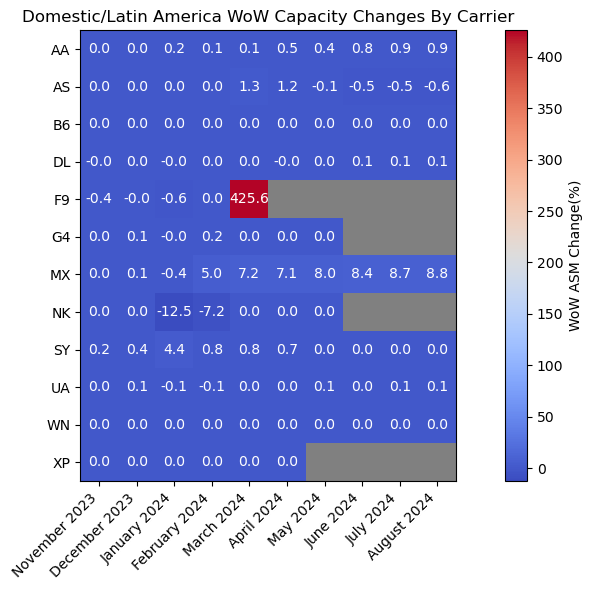

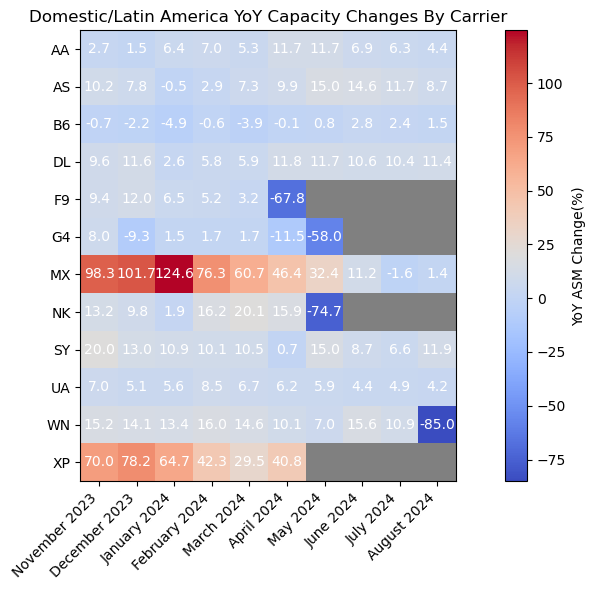

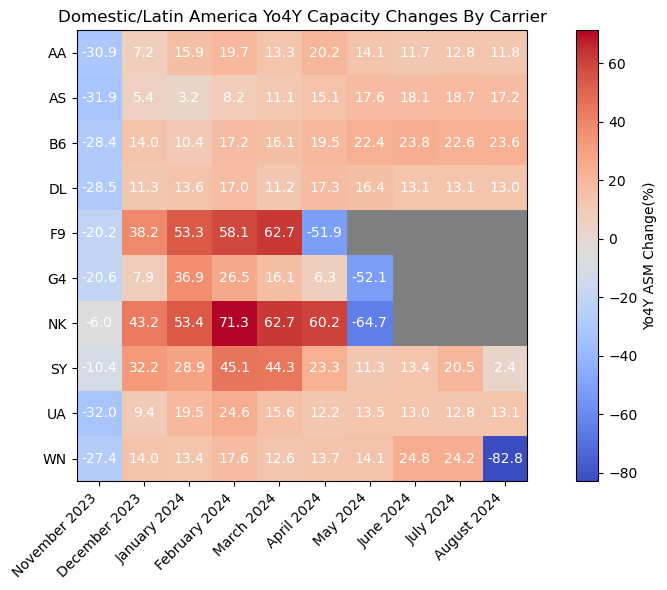

In [70]:
AirlineCapacityWoW=DashboardWoW['WoW ASM Change(%)']
AirlineCapacityWoW
AirlineWoWDF = AirlineCapacityWoW.reset_index()
AirlineWoWDF = AirlineWoWDF.pivot(index='Airline Code', columns='Travel Month and Year', values='WoW ASM Change(%)')
AirlineWoWDF.columns = pd.to_datetime(AirlineWoWDF.columns, format='%B %Y')
AirlineWoWDF.sort_index(axis=1, inplace=True)
AirlineWoWDF.columns = AirlineWoWDF.columns.strftime('%B %Y')


darker_black = (0.01, 0.01, 0.01)

# Create the visualization
plt.figure(figsize=(10, 6))

# Set the NaN values to a specific color (gray) and hide the NaN text
cmap = plt.get_cmap('coolwarm')
cmap.set_bad('gray')

vmin = np.nanmin(AirlineWoWDF.values)
vmax = np.nanmax(AirlineWoWDF.values)


# Plot the data with the updated settings
plt.imshow(AirlineWoWDF.values, cmap=cmap, vmin=vmin, vmax=vmax)

# Set the axis labels and ticks
plt.xticks(range(len(AirlineWoWDF.columns)), AirlineWoWDF.columns, rotation=45, ha='right')
plt.yticks(range(len(AirlineWoWDF.index)), AirlineWoWDF.index)

# Add the numerical values as text in the cells
for i in range(len(AirlineWoWDF.index)):
    for j in range(len(AirlineWoWDF.columns)):
        val = AirlineWoWDF.values[i, j]
        if np.isnan(val):
            continue
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='white')

# Add color bar and title
plt.colorbar(label='WoW ASM Change(%)')
plt.title('Domestic/Latin America WoW Capacity Changes By Carrier')

# Show the plot
plt.tight_layout()
plt.show()

AirlineCapacityYoY=DashboardYoY['YoY ASM Change(%)']
AirlineCapacityYoY
AirlineYoYDF = AirlineCapacityYoY.reset_index()
AirlineYoYDF = AirlineYoYDF.pivot(index='Airline Code', columns='Travel Month and Year', values='YoY ASM Change(%)')
AirlineYoYDF.columns = pd.to_datetime(AirlineYoYDF.columns, format='%B %Y')
AirlineYoYDF.sort_index(axis=1, inplace=True)
AirlineYoYDF.columns = AirlineYoYDF.columns.strftime('%B %Y')


darker_black = (0.01, 0.01, 0.01)

# Create the visualization
plt.figure(figsize=(10, 6))

# Set the NaN values to a specific color (gray) and hide the NaN text
cmap = plt.get_cmap('coolwarm')
cmap.set_bad('gray')

vmin = np.nanmin(AirlineYoYDF.values)
vmax = np.nanmax(AirlineYoYDF.values)


# Plot the data with the updated settings
plt.imshow(AirlineYoYDF.values, cmap=cmap, vmin=vmin, vmax=vmax)

# Set the axis labels and ticks
plt.xticks(range(len(AirlineYoYDF.columns)), AirlineYoYDF.columns, rotation=45, ha='right')
plt.yticks(range(len(AirlineYoYDF.index)), AirlineYoYDF.index)

# Add the numerical values as text in the cells
for i in range(len(AirlineYoYDF.index)):
    for j in range(len(AirlineYoYDF.columns)):
        val = AirlineYoYDF.values[i, j]
        if np.isnan(val):
            continue
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='white')

# Add color bar and title
plt.colorbar(label='YoY ASM Change(%)')
plt.title('Domestic/Latin America YoY Capacity Changes By Carrier')

# Show the plot
plt.tight_layout()
plt.show()


AirlineCapacityYo4Y=DashboardYo4Y['Yo4Y ASM Change(%)']
AirlineCapacityYo4Y
AirlineYo4YDF = AirlineCapacityYo4Y.reset_index()
AirlineYo4YDF = AirlineYo4YDF.pivot(index='Airline Code', columns='Travel Month and Year', values='Yo4Y ASM Change(%)')
AirlineYo4YDF.columns = pd.to_datetime(AirlineYo4YDF.columns, format='%B %Y')
AirlineYo4YDF.sort_index(axis=1, inplace=True)
AirlineYo4YDF.columns = AirlineYo4YDF.columns.strftime('%B %Y')


darker_black = (0.01, 0.01, 0.01)

# Create the visualization
plt.figure(figsize=(10, 6))

# Set the NaN values to a specific color (gray) and hide the NaN text
cmap = plt.get_cmap('coolwarm')
cmap.set_bad('gray')

vmin = np.nanmin(AirlineYo4YDF.values)
vmax = np.nanmax(AirlineYo4YDF.values)


# Plot the data with the updated settings
plt.imshow(AirlineYo4YDF.values, cmap=cmap, vmin=vmin, vmax=vmax)

# Set the axis labels and ticks
plt.xticks(range(len(AirlineYo4YDF.columns)), AirlineYo4YDF.columns, rotation=45, ha='right')
plt.yticks(range(len(AirlineYo4YDF.index)), AirlineYo4YDF.index)

# Add the numerical values as text in the cells
for i in range(len(AirlineYo4YDF.index)):
    for j in range(len(AirlineYo4YDF.columns)):
        val = AirlineYo4YDF.values[i, j]
        if np.isnan(val):
            continue
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='white')

# Add color bar and title
plt.colorbar(label='Yo4Y ASM Change(%)')
plt.title('Domestic/Latin America Yo4Y Capacity Changes By Carrier')

# Show the plot
plt.tight_layout()
plt.show()

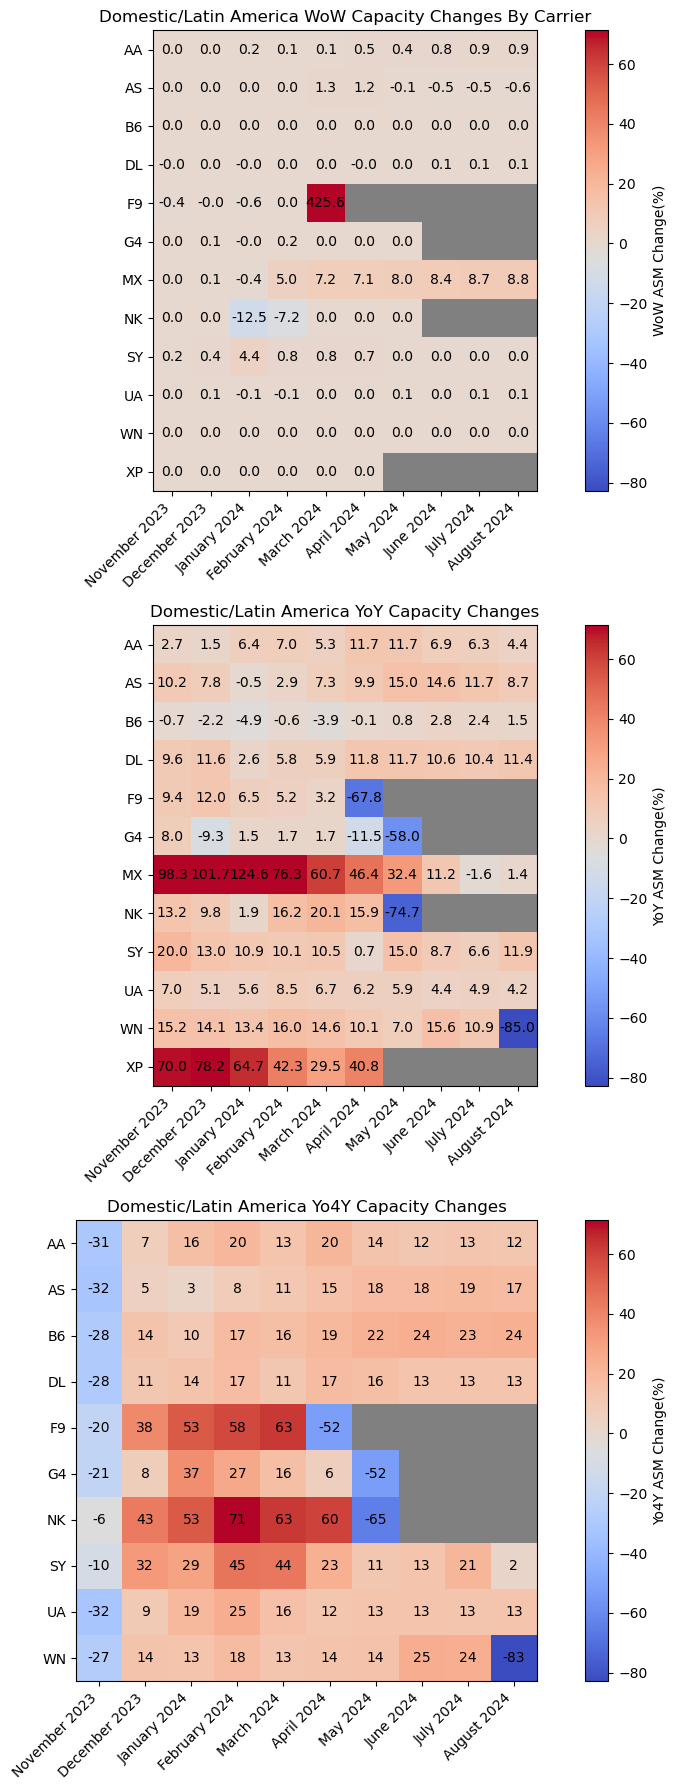

In [71]:
# Saving Correct Airline Capacity Dash into PNG
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# ---------------------- First Plot ----------------------
im = axs[0].imshow(AirlineWoWDF.values, cmap=cmap, vmin=vmin, vmax=vmax)
axs[0].set_xticks(range(len(AirlineWoWDF.columns)))
axs[0].set_xticklabels(AirlineWoWDF.columns, rotation=45, ha='right')
axs[0].set_yticks(range(len(AirlineWoWDF.index)))
axs[0].set_yticklabels(AirlineWoWDF.index)
# Add the numerical values as text in the cells
for i in range(len(AirlineWoWDF.index)):
    for j in range(len(AirlineWoWDF.columns)):
        val = AirlineWoWDF.values[i, j]
        if np.isnan(val):
            continue
        axs[0].text(j, i, f"{val:.1f}", ha='center', va='center', color='black')
axs[0].set_title('Domestic/Latin America WoW Capacity Changes By Carrier')
fig.colorbar(im, ax=axs[0], orientation='vertical', label='WoW ASM Change(%)')

# ---------------------- Second Plot ----------------------
im = axs[1].imshow(AirlineYoYDF.values, cmap=cmap, vmin=vmin, vmax=vmax)
axs[1].set_xticks(range(len(AirlineYoYDF.columns)))
axs[1].set_xticklabels(AirlineYoYDF.columns, rotation=45, ha='right')
axs[1].set_yticks(range(len(AirlineYoYDF.index)))
axs[1].set_yticklabels(AirlineYoYDF.index)
# Add the numerical values as text in the cells
for i in range(len(AirlineYoYDF.index)):
    for j in range(len(AirlineYoYDF.columns)):
        val = AirlineYoYDF.values[i, j]
        if np.isnan(val):
            continue
        axs[1].text(j, i, f"{val:.1f}", ha='center', va='center', color='black')
axs[1].set_title('Domestic/Latin America YoY Capacity Changes')
fig.colorbar(im, ax=axs[1], orientation='vertical', label='YoY ASM Change(%)')

# ---------------------- Third Plot ----------------------
im = axs[2].imshow(AirlineYo4YDF.values, cmap=cmap, vmin=vmin, vmax=vmax)
axs[2].set_xticks(range(len(AirlineYo4YDF.columns)))
axs[2].set_xticklabels(AirlineYo4YDF.columns, rotation=45, ha='right')
axs[2].set_yticks(range(len(AirlineYo4YDF.index)))
axs[2].set_yticklabels(AirlineYo4YDF.index)
# Add the numerical values as text in the cells
for i in range(len(AirlineYo4YDF.index)):
    for j in range(len(AirlineYo4YDF.columns)):
        val = AirlineYo4YDF.values[i, j]
        if np.isnan(val):
            continue
        axs[2].text(j, i, f"{val:.0f}", ha='center', va='center', color='black')
axs[2].set_title('Domestic/Latin America Yo4Y Capacity Changes')
fig.colorbar(im, ax=axs[2], orientation='vertical', label='Yo4Y ASM Change(%)')

plt.tight_layout()

# Save the figure as a PNG file
fig.savefig('AirlineCapacity.png')

## 5.2 Correct F9Base Capacity Dash

In [72]:
F9WoWMerge=AirlineChanges[9]
F9YoYMerge=AirlineChanges[10]
F9Yo4YMerge=AirlineChanges[11]


#Could use a list of designated crew bases 
Crew_Airports=['DEN','MCO','LAS','PHL','ATL','TPA','PHX','MIA']
filtered_testing1 = F9WoWMerge[F9WoWMerge['Origin Code'].isin(Crew_Airports)]
filtered_testing2= F9YoYMerge[F9YoYMerge['Origin Code'].isin(Crew_Airports)]
filtered_testing3= F9Yo4YMerge[F9Yo4YMerge['Origin Code'].isin(Crew_Airports)]

result17=DifferencesByBase(filtered_testing1)
result17 = result17.rename(columns={'ASMDifference': 'WoW ASM Change(%)',
                                            'SeatDifference': 'WoW Seat Change(%)',
                                            'FlightDifference': 'WoW Flight Change(%)'})
result18=DifferencesByBase(filtered_testing2)
result18=result18.rename(columns={'ASMDifference': 'YoY ASM Change(%)',
                                            'SeatDifference': 'YoY Seat Change(%)',
                                            'FlightDifference': 'YoY Flight Change(%)'})
result19=DifferencesByBase(filtered_testing3)
result19=result19.rename(columns={'ASMDifference': 'Yo4Y ASM Change(%)',
                                            'SeatDifference': 'Yo4Y Seat Change(%)',
                                            'FlightDifference': 'Yo4Y Flight Change(%)'})


In [73]:
from datetime import date
def last_day_of_month(any_day):
    """Return the last day of the current month."""
    next_month = any_day.replace(day=28) + timedelta(days=4)
    return next_month - timedelta(days=next_month.day)

def GetNext6Months():                       #(Recurring EDIT) If month range needs to be adjusted, change where indicated: 
    # Start from the current date
    current_date = date.today()
    
    # Calculate 6 months ahead
    if current_date.month <= 4:
        six_months_ahead = date(current_date.year, current_date.month + 5, 1)  #(Recurring EDIT) + "your value"
    else:
        six_months_ahead = date(current_date.year + 1, (current_date.month + 5) - 12, 1) #(Recurring EDIT) + "your value"
        
    end_date = last_day_of_month(six_months_ahead)
    month_order = []

    while current_date <= end_date:
        # Adding month and year (e.g., January 2023)
        month_order.append(current_date.strftime('%B'))  
        # Go to the first day of the next month
        if current_date.month == 12:
            current_date = date(current_date.year + 1, 1, 1)
        else:
            current_date = date(current_date.year, current_date.month + 1, 1)

    return month_order
F9BaseMonths=GetNext6Months()
F9BaseMonths

['November', 'December', 'January', 'February', 'March', 'April']

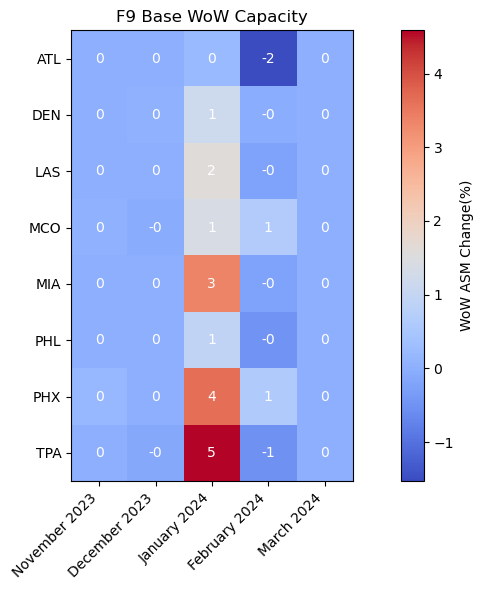

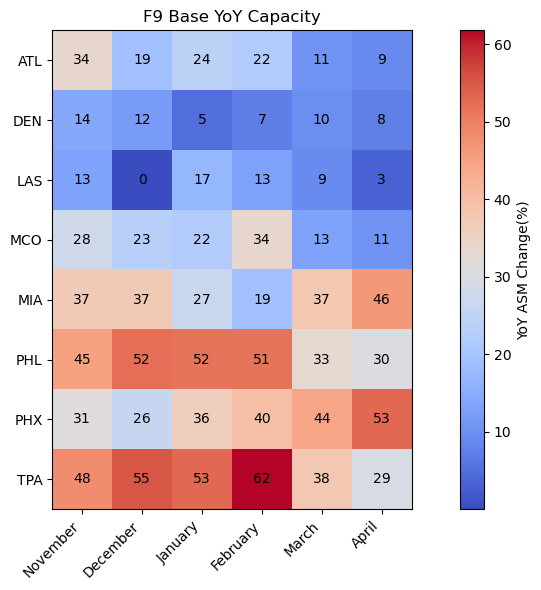

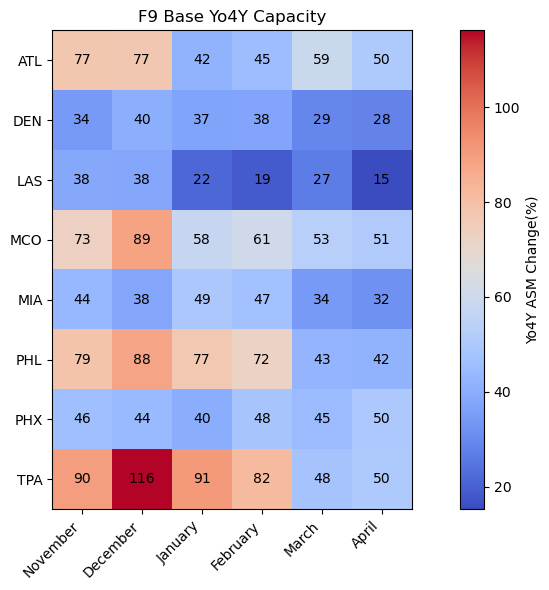

In [74]:
BaseCapacityWoW=result17["WoW ASM Change(%)"]
BaseCapacityYoY=result18["YoY ASM Change(%)"]
BaseCapacityYo4Y=result19["Yo4Y ASM Change(%)"]
F9WoWCapacity = BaseCapacityWoW.reset_index()
F9WoWCapacity = F9WoWCapacity.pivot(index='Origin Code', columns='Travel Month and Year_y', values='WoW ASM Change(%)')

F9WoWCapacity.columns = pd.to_datetime(F9WoWCapacity.columns, format='%B %Y')
# Sort the columns in chronological order
F9WoWCapacity.sort_index(axis=1, inplace=True)
F9WoWCapacity.columns = F9WoWCapacity.columns.strftime('%B %Y')


df_yoy = BaseCapacityYoY.reset_index()
df_yoy = df_yoy.pivot(index='Origin Code', columns='Travel Month and Year_y', values='YoY ASM Change(%)')

df_yoy.columns = pd.to_datetime(df_yoy.columns, format='%B %Y')
# Sort the columns in chronological order
df_yoy.sort_index(axis=1, inplace=True)
df_yoy.columns = df_yoy.columns.strftime('%B %Y')
df_yoy.columns = F9BaseMonths
df_yo4y=BaseCapacityYo4Y.reset_index()
df_yo4y = df_yo4y.pivot(index='Origin Code', columns='Travel Month and Year_y', values='Yo4Y ASM Change(%)')

df_yo4y.columns = pd.to_datetime(df_yo4y.columns, format='%B %Y')
# Sort the columns in chronological order
df_yo4y.sort_index(axis=1, inplace=True)
df_yo4y.columns = df_yo4y.columns.strftime('%B %Y')
df_yo4y.columns = F9BaseMonths


# Create the visualization
plt.figure(figsize=(10, 6))
plt.imshow(F9WoWCapacity.values, cmap='coolwarm')


# Set the axis labels and ticks
plt.xticks(range(len(F9WoWCapacity.columns)), F9WoWCapacity.columns, rotation=45, ha='right')
plt.yticks(range(len(F9WoWCapacity.index)), F9WoWCapacity.index)

# Add the numerical values as text in the cells
for i in range(len(F9WoWCapacity.index)):
    for j in range(len(F9WoWCapacity.columns)):
        plt.text(j, i, f"{F9WoWCapacity.values[i, j]:.0f}", ha='center', va='center', color='white')

# Add color bar and title
plt.colorbar(label='WoW ASM Change(%)')
plt.title('F9 Base WoW Capacity')


# Show the plot
plt.tight_layout()
plt.show()

# Create the second visualization
plt.figure(figsize=(10, 6))
plt.imshow(df_yoy.values, cmap='coolwarm')

# Set the axis labels and ticks
plt.xticks(range(len(df_yoy.columns)), df_yoy.columns, rotation=45, ha='right')
plt.yticks(range(len(df_yoy.index)), df_yoy.index)

# Add the numerical values as text in the cells
for i in range(len(df_yoy.index)):
    for j in range(len(df_yoy.columns)):
        plt.text(j, i, f"{df_yoy.values[i, j]:.0f}", ha='center', va='center', color='black')

# Add color bar and title for the second visualization
plt.colorbar(label='YoY ASM Change(%)')
plt.title('F9 Base YoY Capacity')

# Show the second plot
plt.tight_layout()
plt.show()

# Create the third visualization
plt.figure(figsize=(10, 6))
plt.imshow(df_yo4y.values, cmap='coolwarm')

# Set the axis labels and ticks
plt.xticks(range(len(df_yo4y.columns)), df_yo4y.columns, rotation=45, ha='right')
plt.yticks(range(len(df_yo4y.index)), df_yo4y.index)

# Add the numerical values as text in the cells
for i in range(len(df_yo4y.index)):
    for j in range(len(df_yo4y.columns)):
        plt.text(j, i, f"{df_yo4y.values[i, j]:.0f}", ha='center', va='center', color='black')

# Add color bar and title for the second visualization
plt.colorbar(label='Yo4Y ASM Change(%)')
plt.title('F9 Base Yo4Y Capacity')

# Show the third plot
plt.tight_layout()
plt.show()



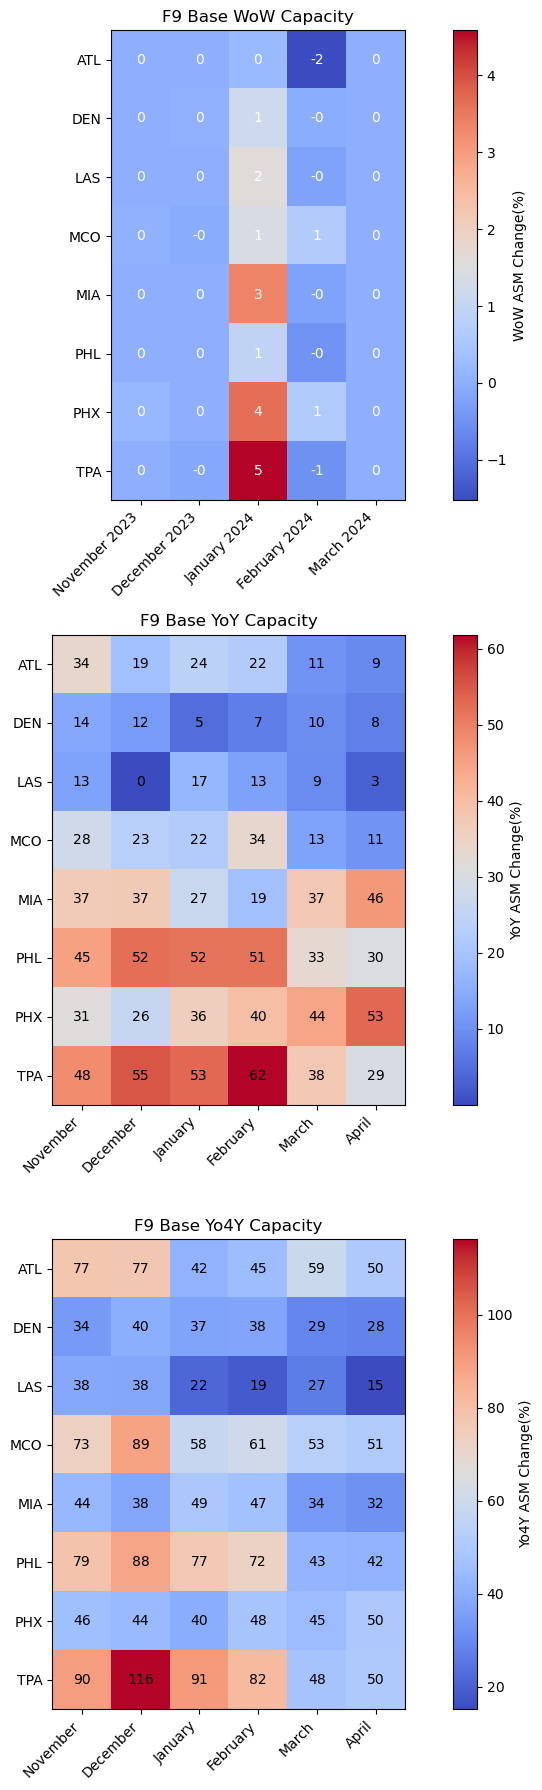

In [75]:
# Saving Correct F9Base Capacity Dash into PNG
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Create the first visualization
im = axs[0].imshow(F9WoWCapacity.values, cmap='coolwarm')
# Set the axis labels and ticks
axs[0].set_xticks(range(len(F9WoWCapacity.columns)))
axs[0].set_xticklabels(F9WoWCapacity.columns, rotation=45, ha='right')
axs[0].set_yticks(range(len(F9WoWCapacity.index)))
axs[0].set_yticklabels(F9WoWCapacity.index)
# Add the numerical values as text in the cells
for i in range(len(F9WoWCapacity.index)):
    for j in range(len(F9WoWCapacity.columns)):
        axs[0].text(j, i, f"{F9WoWCapacity.values[i, j]:.0f}", ha='center', va='center', color='white')
# Add color bar and title
fig.colorbar(im, ax=axs[0], label='WoW ASM Change(%)')
axs[0].set_title('F9 Base WoW Capacity')

# Create the second visualization
im = axs[1].imshow(df_yoy.values, cmap='coolwarm')
# Set the axis labels and ticks
axs[1].set_xticks(range(len(df_yoy.columns)))
axs[1].set_xticklabels(df_yoy.columns, rotation=45, ha='right')
axs[1].set_yticks(range(len(df_yoy.index)))
axs[1].set_yticklabels(df_yoy.index)
# Add the numerical values as text in the cells
for i in range(len(df_yoy.index)):
    for j in range(len(df_yoy.columns)):
        axs[1].text(j, i, f"{df_yoy.values[i, j]:.0f}", ha='center', va='center', color='black')
# Add color bar and title for the second visualization
fig.colorbar(im, ax=axs[1], label='YoY ASM Change(%)')
axs[1].set_title('F9 Base YoY Capacity')

# Create the third visualization
im = axs[2].imshow(df_yo4y.values, cmap='coolwarm')
# Set the axis labels and ticks
axs[2].set_xticks(range(len(df_yo4y.columns)))
axs[2].set_xticklabels(df_yo4y.columns, rotation=45, ha='right')
axs[2].set_yticks(range(len(df_yo4y.index)))
axs[2].set_yticklabels(df_yo4y.index)
# Add the numerical values as text in the cells
for i in range(len(df_yo4y.index)):
    for j in range(len(df_yo4y.columns)):
        axs[2].text(j, i, f"{df_yo4y.values[i, j]:.0f}", ha='center', va='center', color='black')
# Add color bar and title for the third visualization
fig.colorbar(im, ax=axs[2], label='Yo4Y ASM Change(%)')
axs[2].set_title('F9 Base Yo4Y Capacity')

# Save the figure as a PNG file
plt.tight_layout()
fig.savefig('F9BaseCapacity.png')


## 5.3 Correct Total Capacity/F9 Overlap Total Capacity Dash

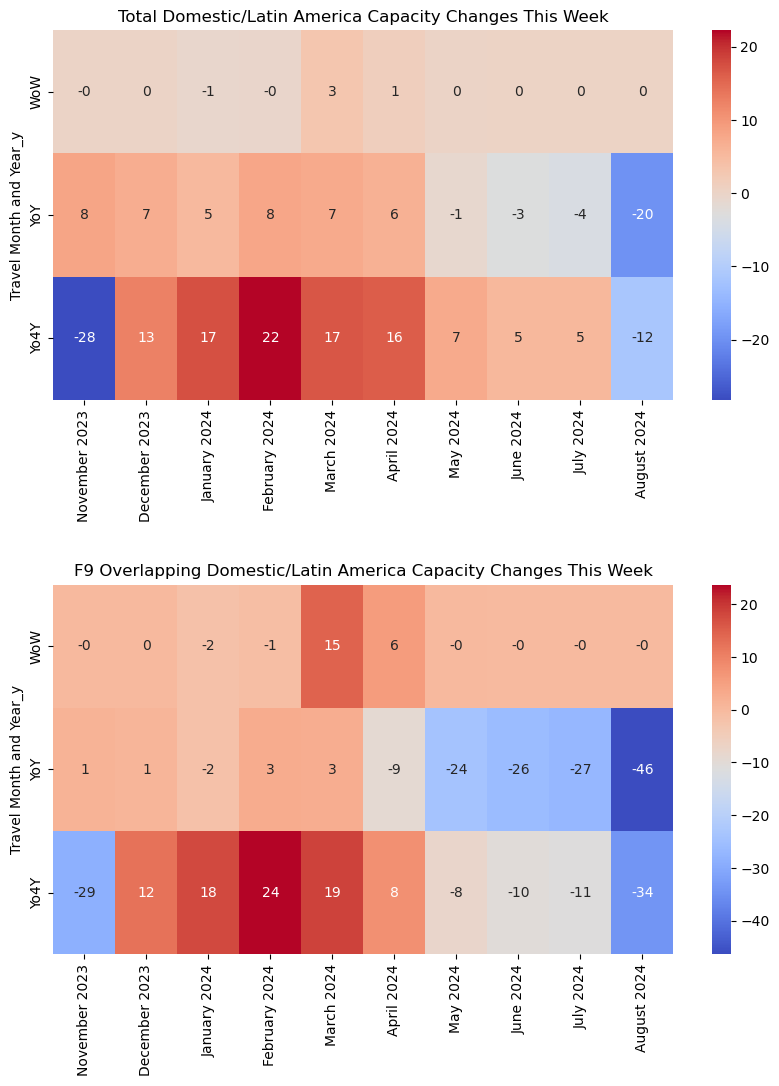

In [76]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Add space between plots
plt.subplots_adjust(hspace=0.5)

# Create a heatmap on the first axes object (ax1)
sns.heatmap(CapacityDash, annot=True, fmt=".0f", cmap='coolwarm', ax=ax1)
ax1.set_title('Total Domestic/Latin America Capacity Changes This Week')

# Create a heatmap on the second axes object (ax2)
sns.heatmap(F9OverlapCapacityDash, annot=True, fmt=".0f", cmap='coolwarm', ax=ax2)
ax2.set_title('F9 Overlapping Domestic/Latin America Capacity Changes This Week')

# Save the figure
plot_image_path = 'Test1.png'
fig.savefig(plot_image_path, dpi=300, bbox_inches='tight')

# Show the figure
plt.show()


## 6.) Carrier Summary Start/Calcs

In [77]:
#CORRECT BASE CALCS (DO NOT DELETE)

In [78]:
def GetCorrectTopBases(df):
    # Convert 'Flights' column to numeric, coercing non-numeric values to NaN
    df['Flights'] = pd.to_numeric(df['Flights'], errors='coerce')
    
    # Remove rows where 'Flights' is NaN
    df.dropna(subset=['Flights'], inplace=True)
    
    # Group by 'Origin Code' and sum up the 'Flights'
    flightsdata = df.groupby(['Origin Code'])['Flights'].sum()
    
    # Initialize n_largest to 10 as a default value
    n_largest = 10

    # Check if df.name attribute exists and its first two characters
    if hasattr(df, 'name'):
        prefix = df.name[:2]
        if prefix == 'NK' or prefix == 'SY':
            n_largest = 15
        elif prefix == 'B6':
            n_largest = 9
        elif prefix == 'AS' or prefix == 'XP':
            n_largest = 5
        elif prefix == 'UA':
            n_largest = 7
        elif prefix == 'WN':
            n_largest = 20
    
    # Get the n largest origin codes based on sum of 'Flights'
    top_origin_codes = flightsdata.nlargest(n_largest)
    
    return top_origin_codes.index.tolist()

NKThisWeekData.name = 'NKThisWeekData' 
B6ThisWeekData.name = 'B6ThisWeekData' 
ASThisWeekData.name = 'ASThisWeekData' 
UAThisWeekData.name = 'UAThisWeekData' 
WNThisWeekData.name = 'WNThisWeekData' 
SYThisWeekData.name = 'SYThisWeekData' 
XPThisWeekData.name = 'XPThisWeekData' 

In [79]:
#NEW CODE (9/9/2023, VS)

def GetCorrectTopOverlapMarkets(df):
    # Convert 'Flights' column to numeric, coercing non-numeric values to NaN
    df['Flights'] = pd.to_numeric(df['Flights'], errors='coerce')
    
    # Remove rows where 'Flights' is NaN
    df.dropna(subset=['Flights'], inplace=True)
    
    # Group by 'Origin Code' and sum up the 'Flights'
    amktdata = df.groupby(['aMkt'])['Flights'].sum()
    
    # Initialize n_largest to 10 as a default value
    n_largest = 10

    
    # Get the n largest origin codes based on sum of 'Flights'
    top_a_mkts = amktdata.nlargest(n_largest)
    
    return top_a_mkts.index.tolist()

NKThisWeekDataF9overlaps.name = 'NKThisWeekDataF9overlaps' 
B6ThisWeekDataF9overlaps.name = 'B6ThisWeekDataF9overlaps' 
ASThisWeekDataF9overlaps.name = 'ASThisWeekDataF9overlaps' 
UAThisWeekDataF9overlaps.name = 'UAThisWeekDataF9overlaps' 
WNThisWeekDataF9overlaps.name = 'WNThisWeekDataF9overlaps' 
SYThisWeekDataF9overlaps.name = 'SYThisWeekDataF9overlaps' 
XPThisWeekDataF9overlaps.name = 'XPThisWeekDataF9overlaps' 

In [80]:
#Sums up ASMs by overlapping aMkt for TW, LW, and LY Data. 
#NEW CODE (9/9/2023, VS)

all_airlines = ['NK', 'SY', 'G4', 'F9', 'B6', 'AS', 'AA', 'UA', 'DL', 'WN','MX','XP']


def GetMonthlySumsTopOverlapMarkets(carrier):
    if carrier not in all_airlines:
        raise ValueError(f"Carrier '{carrier}' not in recognized list of airlines.")
    
    this_week_df_name = carrier + "ThisWeekDataF9overlaps"
    last_week_df_name = carrier + "LastWeekDataF9overlaps"
    last_year_df_name = carrier + "LastYearDataF9overlaps"
    
    this_week_df = globals().get(this_week_df_name)
    last_week_df = globals().get(last_week_df_name)
    last_year_df = globals().get(last_year_df_name)
    Top_AMkts= GetCorrectTopOverlapMarkets(this_week_df)
    
    required_columns = ['ASMs', 'Travel Month and Year']
    if any(df is None or not all(col in df.columns for col in required_columns) 
           for df in [this_week_df, last_week_df, last_year_df]):
        raise ValueError("One or more of the expected DataFrames or the required columns not found.")
    
    # Filter data for each dataframe before summing ASMs
    this_week_sum_by_month = this_week_df[this_week_df['aMkt'].isin(Top_AMkts)].groupby(['Month', 'aMkt'])['ASMs'].sum()
    last_week_sum_by_month = last_week_df[last_week_df['aMkt'].isin(Top_AMkts)].groupby(['Month', 'aMkt'])['ASMs'].sum()
    last_year_sum_by_month = last_year_df[last_year_df['aMkt'].isin(Top_AMkts)].groupby(['Month', 'aMkt'])['ASMs'].sum()
    
    return this_week_sum_by_month, last_week_sum_by_month, last_year_sum_by_month

TotalMonthSumTopOverlapsDict = {carrier: GetMonthlySumsTopOverlapMarkets(carrier) for carrier in all_airlines}

# Printing the results
for carrier, sums in TotalMonthSumTopOverlapsDict .items():
    print(f"{carrier}: ThisWeek: {sums[0]}, LastWeek: {sums[1]}, LastYear: {sums[2]}")

NK: ThisWeek: Month     aMkt  
April     ATLDTW    24627240.0
          ATLFLL    32939214.0
          BOSMCO    60502612.0
          BWIMCO    43451844.0
          DTWMCO    63219420.0
                       ...    
November  LASPDX    19688556.0
          LASSAN     6854028.0
          LASSMF    10546702.0
          MCOPHL    16881627.0
          MCOSJU    31187470.0
Name: ASMs, Length: 70, dtype: float64, LastWeek: Month     aMkt  
April     ATLDTW    24627240.0
          ATLFLL    32939214.0
          BOSMCO    60502612.0
          BWIMCO    43451844.0
          DTWMCO    63219420.0
                       ...    
November  LASPDX    19688556.0
          LASSAN     6854028.0
          LASSMF    10546702.0
          MCOPHL    16881627.0
          MCOSJU    31187470.0
Name: ASMs, Length: 70, dtype: float64, LastYear: Month     aMkt  
April     ATLDTW    25621596.0
          ATLFLL    37978808.0
          BOSMCO    45362386.0
          BWIMCO    27504076.0
          DTWMCO    48137100.

In [81]:
#Sums up ASMs by Hub Bases for TW, LW, and LY Data. 

all_airlines = ['NK', 'SY', 'G4', 'F9', 'B6', 'AS', 'AA', 'UA', 'DL', 'WN','MX','XP']


def GetMonthlySumsTopBases(carrier):
    if carrier not in all_airlines:
        raise ValueError(f"Carrier '{carrier}' not in recognized list of airlines.")
    
    this_week_df_name = carrier + "ThisWeekData"
    last_week_df_name = carrier + "LastWeekData"
    last_year_df_name = carrier + "LastYearData"
    
    this_week_df = globals().get(this_week_df_name)
    last_week_df = globals().get(last_week_df_name)
    last_year_df = globals().get(last_year_df_name)
    Crew_Airports = GetCorrectTopBases(this_week_df)
    
    required_columns = ['ASMs', 'Travel Month and Year']
    if any(df is None or not all(col in df.columns for col in required_columns) 
           for df in [this_week_df, last_week_df, last_year_df]):
        raise ValueError("One or more of the expected DataFrames or the required columns not found.")
    
    # Filter data for each dataframe before summing ASMs
    this_week_sum_by_month = this_week_df[this_week_df['Origin Code'].isin(Crew_Airports)].groupby(['Month', 'Origin Code'])['ASMs'].sum()
    last_week_sum_by_month = last_week_df[last_week_df['Origin Code'].isin(Crew_Airports)].groupby(['Month', 'Origin Code'])['ASMs'].sum()
    last_year_sum_by_month = last_year_df[last_year_df['Origin Code'].isin(Crew_Airports)].groupby(['Month', 'Origin Code'])['ASMs'].sum()
    
    return this_week_sum_by_month, last_week_sum_by_month, last_year_sum_by_month

TotalMonthSumTopBasesDict = {carrier: GetMonthlySumsTopBases(carrier) for carrier in all_airlines}

# Printing the results
for carrier, sums in TotalMonthSumTopBasesDict.items():
    print(f"{carrier}: ThisWeek: {sums[0]}, LastWeek: {sums[1]}, LastYear: {sums[2]}")

NK: ThisWeek: Month     Origin Code
April     ATL            170559661.0
          BWI            148878396.0
          DFW            194950244.0
          DTW            185723924.0
          EWR            216384040.0
                            ...     
November  MCO            275652338.0
          MIA             82980405.0
          ORD            107938541.0
          PHL             65858976.0
          TPA             68582077.0
Name: ASMs, Length: 105, dtype: float64, LastWeek: Month     Origin Code
April     ATL            170559661.0
          BWI            148878396.0
          DFW            194950244.0
          DTW            185723924.0
          EWR            216384040.0
                            ...     
November  MCO            275652338.0
          MIA             82980405.0
          ORD            107938541.0
          PHL             65858976.0
          TPA             68582077.0
Name: ASMs, Length: 105, dtype: float64, LastYear: Month     Origin Code
Apri

In [82]:
def GetStationBreakdown(carrier):
    # Fetching the DataFrames for the carrier
    current_month_df = TotalMonthSumTopBasesDict[carrier][0]
    last_week_df = TotalMonthSumTopBasesDict[carrier][1]
    last_year_df = TotalMonthSumTopBasesDict[carrier][2]
    
    # Calculating WoW (Week-over-Week) percentage change
    WoW_change = ((current_month_df - last_week_df) / last_week_df) * 100
    
    # Calculating YoY (Year-over-Year) percentage change
    YoY_change = ((current_month_df - last_year_df) / last_year_df) * 100
    
    # Merging WoW and YoY DataFrames on ['Month', 'Origin Code']
    merged_df = pd.merge(WoW_change, YoY_change, on=['Month', 'Origin Code'])
    
    # Renaming columns
    merged_df.columns = ['WoW', 'YoY']
    
    return merged_df

#NEW CODE (9/9/2023, VS)
def GetTotalF9aMktOverlapBreakdown(carrier):
    # Fetching the DataFrames for the carrier
    current_month_df = TotalMonthSumTopOverlapsDict[carrier][0]
    last_week_df = TotalMonthSumTopOverlapsDict[carrier][1]
    last_year_df = TotalMonthSumTopOverlapsDict[carrier][2]
    
    # Calculating WoW (Week-over-Week) percentage change
    WoW_change = ((current_month_df - last_week_df) / last_week_df) * 100
    
    # Calculating YoY (Year-over-Year) percentage change
    YoY_change = ((current_month_df - last_year_df) / last_year_df) * 100
    
    # Merging WoW and YoY DataFrames on ['Month', 'Origin Code']
    merged_df = pd.merge(WoW_change, YoY_change, on=['Month', 'aMkt'])
    
    # Renaming columns
    merged_df.columns = ['WoW', 'YoY']
    
    return merged_df

AATopStationBreakdown=GetStationBreakdown('AA')
UATopStationBreakdown=GetStationBreakdown('UA')
DLTopStationBreakdown=GetStationBreakdown('DL')
WNTopStationBreakdown=GetStationBreakdown('WN')
NKTopStationBreakdown=GetStationBreakdown('NK')
SYTopStationBreakdown=GetStationBreakdown('SY')
G4TopStationBreakdown=GetStationBreakdown('G4')
B6TopStationBreakdown=GetStationBreakdown('B6')
ASTopStationBreakdown=GetStationBreakdown('AS')
F9TopStationBreakdown=GetStationBreakdown('F9')
MXTopStationBreakdown=GetStationBreakdown('MX')
XPTopStationBreakdown=GetStationBreakdown('XP')

AATopOverlapMarketsBreakdown=GetTotalF9aMktOverlapBreakdown('AA')
UATopOverlapMarketsBreakdown=GetTotalF9aMktOverlapBreakdown('UA')
DLTopOverlapMarketsBreakdown=GetTotalF9aMktOverlapBreakdown('DL')
WNTopOverlapMarketsBreakdown=GetTotalF9aMktOverlapBreakdown('WN')
NKTopOverlapMarketsBreakdown=GetTotalF9aMktOverlapBreakdown('NK')
SYTopOverlapMarketsBreakdown=GetTotalF9aMktOverlapBreakdown('SY')
G4TopOverlapMarketsBreakdown=GetTotalF9aMktOverlapBreakdown('G4')
B6TopOverlapMarketsBreakdown=GetTotalF9aMktOverlapBreakdown('B6')
ASTopOverlapMarketsBreakdown=GetTotalF9aMktOverlapBreakdown('AS')
F9TopOverlapMarketsBreakdown=GetTotalF9aMktOverlapBreakdown('F9')
MXTopOverlapMarketsBreakdown=GetTotalF9aMktOverlapBreakdown('MX')
XPTopOverlapMarketsBreakdown=GetTotalF9aMktOverlapBreakdown('XP')

In [83]:
#Entries (DO NOT DELETE)
def get_new_markets(airline_codes):
    """
    Function to get new markets for all provided airline codes.
    
    Parameters:
    airline_codes (list): List of airline codes.
    
    Returns:
    dict: Dictionary where each key is an airline code and each value is a list of new markets.
    """
    # Initialize result dictionary
    new_markets_dict = {}

    # Iterate over airline codes
    for airline_code in airline_codes:
        # Dynamically get the dataframes for this week and last week using the airline_code
        this_week_data = globals()[f'{airline_code}ThisWeekData']
        last_week_data = globals()[f'{airline_code}LastWeekData']

        # Convert 'Travel Date' column to datetime
        this_week_data['Travel Date'] = pd.to_datetime(this_week_data['Travel Date'])

        # Find new markets
        new_markets_df = this_week_data[~this_week_data['aMkt'].isin(last_week_data['aMkt'])]
        
        # Get first date for each market
        new_markets_first_date = new_markets_df.groupby('aMkt')['Travel Date'].min()

        # Count the number of flights for each market
        new_markets_flight_count = new_markets_df.groupby('aMkt').size()

        # Create a list of new markets with first date and number of flights
        new_markets_list = [f"{market if market not in F9WeeklyMarkets else market+'**'} ({date.strftime('%b %d, %Y')}, {count})" 
                            for market, date in new_markets_first_date.items()
                            for market_count, count in new_markets_flight_count.items()
                            if market == market_count]

        # Store results in dictionary
        new_markets_dict[airline_code] = new_markets_list

    # Return results
    return new_markets_dict

AllAirlines = ['NK', 'SY', 'G4', 'F9', 'B6', 'AS', 'AA', 'UA', 'DL', 'WN', 'MX', 'XP']
new_markets_by_airline = get_new_markets(AllAirlines)

# Now new_markets_by_airline is a dictionary where each key is an airline code 
# and each value is a list of new markets for that airline


new_markets_by_airline

{'NK': ['DTWIND (Jan 09, 2024, 1)',
  'DTWORD (Jan 09, 2024, 1)',
  'DTWPIT (Jan 09, 2024, 1)',
  'MIAMYR (Jan 10, 2024, 1)',
  'SATTPA (Jan 11, 2024, 40)'],
 'SY': ['BOSBWI (Nov 14, 2023, 2)', 'BWIDTW (Nov 14, 2023, 2)'],
 'G4': [],
 'F9': ['ATLMSY** (Mar 07, 2024, 30)',
  'HOULAS** (Mar 07, 2024, 50)',
  'MBJPHL** (Mar 09, 2024, 10)',
  'MYRPHL** (Mar 28, 2024, 12)',
  'PHLSAV** (Mar 21, 2024, 24)'],
 'B6': [],
 'AS': ['BNAPDX (Mar 14, 2024, 342)'],
 'AA': ['CLTTQO (Mar 28, 2024, 314)',
  'DFWTQO (Mar 28, 2024, 314)',
  'MIATQO (Mar 28, 2024, 314)'],
 'UA': [],
 'DL': [],
 'WN': [],
 'MX': ['AVPMCO (Jan 30, 2024, 124)',
  'BTVMCO (Feb 14, 2024, 116)',
  'BTVTPA (Jan 31, 2024, 124)',
  'CHSSWF (Feb 16, 2024, 114)',
  'CRWMYR (May 10, 2024, 66)',
  'EVVMCO (Feb 23, 2024, 110)',
  'GJTSFO (May 22, 2024, 60)',
  'GJTSNA (Feb 06, 2024, 178)',
  'MCOMSN** (Feb 14, 2024, 116)',
  'MCOSWF (Feb 15, 2024, 114)',
  'MSNTPA (Feb 07, 2024, 120)',
  'MYRPVD (Feb 15, 2024, 124)',
  'MYRTPA (May 10,

In [84]:
#Exits
def get_exit_markets(airline_codes):
    """
    Function to get exit markets for all provided airline codes.
    
    Parameters:
    airline_codes (list): List of airline codes.
    
    Returns:
    dict: Dictionary where each key is an airline code and each value is a list of exit markets.
    """
    # Initialize result dictionary
    exit_markets_dict = {}

    # Iterate over airline codes
    for airline_code in airline_codes:
        # Dynamically get the dataframes for this week and last week using the airline_code
        this_week_data = globals()[f'{airline_code}ThisWeekData']
        last_week_data = globals()[f'{airline_code}LastWeekData']

        # Convert 'Travel Date' column to datetime
        last_week_data['Travel Date'] = pd.to_datetime(last_week_data['Travel Date'])

        # Find exit markets
        exit_markets_df = last_week_data[~last_week_data['aMkt'].isin(this_week_data['aMkt'])]
        
        # Get last date for each market
        exit_markets_last_date = exit_markets_df.groupby('aMkt')['Travel Date'].max()

        # Create a list of exit markets with last date
        exit_markets_list = [f"{market} ({date.strftime('%b %d, %Y')})" 
                            for market, date in exit_markets_last_date.items()]

        # Store results in dictionary
        exit_markets_dict[airline_code] = exit_markets_list

    # Return results
    return exit_markets_dict


# Use the function
exit_markets_by_airline = get_exit_markets(AllAirlines)


exit_markets_by_airline

{'NK': [],
 'SY': [],
 'G4': [],
 'F9': [],
 'B6': [],
 'AS': [],
 'AA': [],
 'UA': [],
 'DL': [],
 'WN': [],
 'MX': [],
 'XP': []}

In [85]:
#Stage Breakdown
def AddStageGroup(MergedTable):
    """
    Function to add a 'Stage Group' column to a DataFrame based on 'Distance_y' values.

    Parameters:
    MergedTable (DataFrame): DataFrame with 'Distance_y' column.

    Returns:
    DataFrame: The modified DataFrame with an additional 'Stage Group' column.
    """
    def assign_stage_group(distance):
        if distance < 750:
            return "Short Haul"
        elif 750 <= distance < 1501:
            return "Medium Haul"
        elif 1501 <= distance < 2751:
            return "Long Haul"
        else:
            return "Xtra Long Haul"
        
    MergedTable['Stage Group'] = MergedTable['Distance_y'].apply(assign_stage_group)
    
    return MergedTable


#Fleet Breakdown
def GetTypeBreakdown(MergedTable):
    """
    Function to calculate the average ASMDifference for each type in Type_x.
    
    Parameters:
    MergedTable (DataFrame): The DataFrame to operate on.
    
    Returns:
    Series: A series where the index is the type from Type_x and the value is the average ASMDifference.
    """
    # Calculate the average 'ASMDifference' for each 'Type_x'
    average_asmdifference = MergedTable.groupby('Type_x')['ASMDifference'].mean()

    # Return the result
    return average_asmdifference




#Weekday/OffPeak vs. Peak 
def GetPeakAndOffPeak(MergedTable):
    # Calculate the average 'ASMDifference' for each 'Type_x'
    average_asmdifference = MergedTable.groupby('Peak/Off-Peak_y')['ASMDifference'].mean()

    # Return the result
    return average_asmdifference

def GetCorrectPeakAndOffPeak(file_path):
    # Calculate the average 'ASMDifference' for each 'Type_x'
    peakoffpeak = file_path.groupby(['Month', 'Peak/Off-Peak'])['ASMs'].sum()
    # Return the result
    return peakoffpeak

def GetEachWeekdayBreakdown(MergedTable):
    # Calculate the average 'ASMDifference' for each 'Type_x'
    average_asmdifference = MergedTable.groupby('Day of Week_x')['ASMDifference'].mean()

    # Return the result
    return average_asmdifference

def GetCorrectSeasonality(file_path):
    # Calculate the average 'ASMDifference' for each 'Type_x'
    SeasonalPeriods = file_path.groupby(['Month', 'Seasonality'])['ASMs'].sum()
    # Return the result
    return SeasonalPeriods

def GetCorrectMonthParts(file_path):
    # Calculate the average 'ASMDifference' for each 'Type_x'
    MonthlyParts = file_path.groupby(['Month', 'Part of Month'])['ASMs'].sum()
    # Return the result
    return MonthlyParts

def GetCorrectStageLength(file_path):
    StageLength = file_path.groupby(['Month', 'Stage Group'])['ASMs'].sum()
    # Return the result
    return StageLength

def GetCorrectType(file_path):
    FleetType=file_path.groupby(['Month', 'Type'])['ASMs'].sum()
    return FleetType

def GetCorrectStageDemandPeriod(file_path):
    StageDemandPeriod=file_path.groupby(['Seasonality', 'Stage Group'])['ASMs'].sum()
    return StageDemandPeriod

def GetCorrectRouteType(file_path):
    # Calculate the average 'ASMDifference' for each 'Type_x'
    routetype = file_path.groupby(['Month', 'Route Type'])['ASMs'].sum()
    # Return the result
    return routetype

In [86]:
#Dictionaries needed for correct calculations
old_mkt_airlines = ['NK', 'SY', 'G4', 'F9', 'B6', 'AS', 'AA', 'UA', 'DL', 'WN']

def GetPeakDict(carrier):
    ThisWeekData = eval(carrier + "ThisWeekData")
    LastWeekData = eval(carrier + "LastWeekData")
    LastYearData = eval(carrier + "LastYearData")
    Twenty19Data = eval(carrier + "Twenty19Data")
    
    TestingThis = GetCorrectPeakAndOffPeak(ThisWeekData)
    Testing2 = GetCorrectPeakAndOffPeak(LastWeekData)
    Testing3 = GetCorrectPeakAndOffPeak(LastYearData)
    Testing4 = GetCorrectPeakAndOffPeak(Twenty19Data)
    
    WoWTest = (TestingThis - Testing2) / Testing2 * 100
    YoYTest = (TestingThis - Testing3) / Testing3 * 100
    Yo4YTest = (TestingThis - Testing4) / Testing4 * 100
    
    return {
        carrier: {
            "WoW": WoWTest,
            "YoY": YoYTest,
            "Yo4Y": Yo4YTest
        }
    }


def GetDemandPeriodDict(carrier):
    ThisWeekData = eval(carrier + "ThisWeekData")
    LastWeekData = eval(carrier + "LastWeekData")
    LastYearData = eval(carrier + "LastYearData")
    Twenty19Data = eval(carrier + "Twenty19Data")
    
    TestingThis = GetCorrectSeasonality(ThisWeekData)
    Testing2 = GetCorrectSeasonality(LastWeekData)
    Testing3 = GetCorrectSeasonality(LastYearData)
    Testing4 = GetCorrectSeasonality(Twenty19Data)
    
    WoWTest = (TestingThis - Testing2) / Testing2 * 100
    YoYTest = (TestingThis - Testing3) / Testing3 * 100
    Yo4YTest = (TestingThis - Testing4) / Testing4 * 100
    
    return {
        carrier: {
            "WoW": WoWTest,
            "YoY": YoYTest,
            "Yo4Y": Yo4YTest
        }
    }

def GetMonthPartDict(carrier):
    ThisWeekData = eval(carrier + "ThisWeekData")
    LastWeekData = eval(carrier + "LastWeekData")
    LastYearData = eval(carrier + "LastYearData")
    Twenty19Data = eval(carrier + "Twenty19Data")
    
    TestingThis = GetCorrectMonthParts(ThisWeekData)
    Testing2 = GetCorrectMonthParts(LastWeekData)
    Testing3 = GetCorrectMonthParts(LastYearData)
    Testing4 = GetCorrectMonthParts(Twenty19Data)
    
    WoWTest = (TestingThis - Testing2) / Testing2 * 100
    YoYTest = (TestingThis - Testing3) / Testing3 * 100
    Yo4YTest = (TestingThis - Testing4) / Testing4 * 100
    
    return {
        carrier: {
            "WoW": WoWTest,
            "YoY": YoYTest,
            "Yo4Y": Yo4YTest
        }
    }


def GetStageLengthDict(carrier):
    ThisWeekData = eval(carrier + "ThisWeekData")
    LastWeekData = eval(carrier + "LastWeekData")
    LastYearData = eval(carrier + "LastYearData")
    Twenty19Data = eval(carrier + "Twenty19Data")
    
    TestingThis = GetCorrectStageLength(ThisWeekData)
    Testing2 = GetCorrectStageLength(LastWeekData)
    Testing3 = GetCorrectStageLength(LastYearData)
    Testing4 = GetCorrectStageLength(Twenty19Data)
    
    WoWTest = (TestingThis - Testing2) / Testing2 * 100
    YoYTest = (TestingThis - Testing3) / Testing3 * 100
    Yo4YTest = (TestingThis - Testing4) / Testing4 * 100
    
    return {
        carrier: {
            "WoW": WoWTest,
            "YoY": YoYTest,
            "Yo4Y": Yo4YTest
        }
    }

def GetFleetTypeDict(carrier):
    ThisWeekData = eval(carrier + "ThisWeekData")
    LastWeekData = eval(carrier + "LastWeekData")
    LastYearData = eval(carrier + "LastYearData")
    Twenty19Data = eval(carrier + "Twenty19Data")
    
    TestingThis = GetCorrectType(ThisWeekData)
    Testing2 = GetCorrectType(LastWeekData)
    Testing3 = GetCorrectType(LastYearData)
    Testing4 = GetCorrectType(Twenty19Data)
    
    WoWTest = (TestingThis - Testing2) / Testing2 * 100
    YoYTest = (TestingThis - Testing3) / Testing3 * 100
    Yo4YTest = (TestingThis - Testing4) / Testing4 * 100
    
    return {
        carrier: {
            "WoW": WoWTest,
            "YoY": YoYTest,
            "Yo4Y": Yo4YTest
        }
    }


def GetStageLengthDemandPeriodDict(carrier):
    ThisWeekData = eval(carrier + "ThisWeekData")
    LastWeekData = eval(carrier + "LastWeekData")
    LastYearData = eval(carrier + "LastYearData")
    Twenty19Data = eval(carrier + "Twenty19Data")
    
    TestingThis = GetCorrectStageDemandPeriod(ThisWeekData)
    Testing2 = GetCorrectStageDemandPeriod(LastWeekData)
    Testing3 = GetCorrectStageDemandPeriod(LastYearData)
    Testing4 = GetCorrectStageDemandPeriod(Twenty19Data)
    
    WoWTest = (TestingThis - Testing2) / Testing2 * 100
    YoYTest = (TestingThis - Testing3) / Testing3 * 100
    Yo4YTest = (TestingThis - Testing4) / Testing4 * 100
    
    return {
        carrier: {
            "WoW": WoWTest,
            "YoY": YoYTest,
            "Yo4Y": Yo4YTest
        }
    }


def GetRouteTypeDict(carrier):
    ThisWeekData = eval(carrier + "ThisWeekData")
    LastWeekData = eval(carrier + "LastWeekData")
    LastYearData = eval(carrier + "LastYearData")
    Twenty19Data = eval(carrier + "Twenty19Data")
    
    TestingThis = GetCorrectRouteType(ThisWeekData)
    Testing2 = GetCorrectRouteType(LastWeekData)
    Testing3 = GetCorrectRouteType(LastYearData)
    Testing4 = GetCorrectRouteType(Twenty19Data)
    
    WoWTest = (TestingThis - Testing2) / Testing2 * 100
    YoYTest = (TestingThis - Testing3) / Testing3 * 100
    Yo4YTest = (TestingThis - Testing4) / Testing4 * 100
    
    return {
        carrier: {
            "WoW": WoWTest,
            "YoY": YoYTest,
            "Yo4Y": Yo4YTest
        }
    }

# Use the function
CorrectPeakDict = {}
DemandPeriodDict = {}
MonthPartDict={}
StageLengthDict={}
FleetTypeDict={}
StageDemandPeriodDict={}
RouteTypeDict={}
for airline in old_mkt_airlines:
    CorrectPeakDict.update(GetPeakDict(airline))
    DemandPeriodDict.update(GetDemandPeriodDict(airline))
    MonthPartDict.update(GetMonthPartDict(airline))
    StageLengthDict.update(GetStageLengthDict(airline))
    FleetTypeDict.update(GetFleetTypeDict(airline))
    StageDemandPeriodDict.update(GetStageLengthDemandPeriodDict(airline))
    RouteTypeDict.update(GetRouteTypeDict(airline))

In [87]:
#Same process as above but with new airlines
new_mkt_airlines = ['XP','MX']

def GetPeakDictNewAirline(carrier):
    ThisWeekData = eval(carrier + "ThisWeekData")
    LastWeekData = eval(carrier + "LastWeekData")
    LastYearData = eval(carrier + "LastYearData")
    
    TestingThis = GetCorrectPeakAndOffPeak(ThisWeekData)
    Testing2 = GetCorrectPeakAndOffPeak(LastWeekData)
    Testing3 = GetCorrectPeakAndOffPeak(LastYearData)
    
    WoWTest = (TestingThis - Testing2) / Testing2 * 100
    YoYTest = (TestingThis - Testing3) / Testing3 * 100
    
    return {
        carrier: {
            "WoW": WoWTest,
            "YoY": YoYTest,
        }
    }

def GetDemandPeriodDictNewAirline(carrier):
    ThisWeekData = eval(carrier + "ThisWeekData")
    LastWeekData = eval(carrier + "LastWeekData")
    LastYearData = eval(carrier + "LastYearData")
    
    TestingThis = GetCorrectSeasonality(ThisWeekData)
    Testing2 = GetCorrectSeasonality(LastWeekData)
    Testing3 = GetCorrectSeasonality(LastYearData)
    
    WoWTest = (TestingThis - Testing2) / Testing2 * 100
    YoYTest = (TestingThis - Testing3) / Testing3 * 100
    
    return {
        carrier: {
            "WoW": WoWTest,
            "YoY": YoYTest,
        }
    }

def GetMonthPartDictNewAirline(carrier):
    ThisWeekData = eval(carrier + "ThisWeekData")
    LastWeekData = eval(carrier + "LastWeekData")
    LastYearData = eval(carrier + "LastYearData")
    
    TestingThis = GetCorrectMonthParts(ThisWeekData)
    Testing2 = GetCorrectMonthParts(LastWeekData)
    Testing3 = GetCorrectMonthParts(LastYearData)
    
    WoWTest = (TestingThis - Testing2) / Testing2 * 100
    YoYTest = (TestingThis - Testing3) / Testing3 * 100
    
    return {
        carrier: {
            "WoW": WoWTest,
            "YoY": YoYTest,
        }
    }


def GetStageLengthDictNewAirline(carrier):
    ThisWeekData = eval(carrier + "ThisWeekData")
    LastWeekData = eval(carrier + "LastWeekData")
    LastYearData = eval(carrier + "LastYearData")
    
    TestingThis = GetCorrectStageLength(ThisWeekData)
    Testing2 = GetCorrectStageLength(LastWeekData)
    Testing3 = GetCorrectStageLength(LastYearData)
    
    WoWTest = (TestingThis - Testing2) / Testing2 * 100
    YoYTest = (TestingThis - Testing3) / Testing3 * 100
    
    return {
        carrier: {
            "WoW": WoWTest,
            "YoY": YoYTest,
        }
    }

def GetFleetTypeDictNewAirline(carrier):
    ThisWeekData = eval(carrier + "ThisWeekData")
    LastWeekData = eval(carrier + "LastWeekData")
    LastYearData = eval(carrier + "LastYearData")
    
    TestingThis = GetCorrectType(ThisWeekData)
    Testing2 = GetCorrectType(LastWeekData)
    Testing3 = GetCorrectType(LastYearData)
    
    WoWTest = (TestingThis - Testing2) / Testing2 * 100
    YoYTest = (TestingThis - Testing3) / Testing3 * 100
    
    return {
        carrier: {
            "WoW": WoWTest,
            "YoY": YoYTest,
        }
    }


def GetStageLengthDemandPeriodDictNewAirline(carrier):
    ThisWeekData = eval(carrier + "ThisWeekData")
    LastWeekData = eval(carrier + "LastWeekData")
    LastYearData = eval(carrier + "LastYearData")
    
    TestingThis = GetCorrectStageDemandPeriod(ThisWeekData)
    Testing2 = GetCorrectStageDemandPeriod(LastWeekData)
    Testing3 = GetCorrectStageDemandPeriod(LastYearData)
    
    WoWTest = (TestingThis - Testing2) / Testing2 * 100
    YoYTest = (TestingThis - Testing3) / Testing3 * 100
    
    return {
        carrier: {
            "WoW": WoWTest,
            "YoY": YoYTest,
        }
    }


def GetRouteTypeDictNewAirline(carrier):
    ThisWeekData = eval(carrier + "ThisWeekData")
    LastWeekData = eval(carrier + "LastWeekData")
    LastYearData = eval(carrier + "LastYearData")
    
    TestingThis = GetCorrectRouteType(ThisWeekData)
    Testing2 = GetCorrectRouteType(LastWeekData)
    Testing3 = GetCorrectRouteType(LastYearData)
    
    WoWTest = (TestingThis - Testing2) / Testing2 * 100
    YoYTest = (TestingThis - Testing3) / Testing3 * 100

    
    return {
        carrier: {
            "WoW": WoWTest,
            "YoY": YoYTest,
        }
    }


NewCorrectPeakDict={}
NewDemandPeriodDict = {}
NewMonthPartDict={}
NewStageLengthDict={}
NewFleetTypeDict={}
NewStageDemandPeriodDict={}
NewRouteTypeDict={}
for airline in new_mkt_airlines:
    NewCorrectPeakDict.update(GetPeakDictNewAirline(airline))
    NewDemandPeriodDict.update(GetDemandPeriodDictNewAirline(airline))
    NewMonthPartDict.update(GetMonthPartDictNewAirline(airline))
    NewStageLengthDict.update(GetStageLengthDictNewAirline(airline))
    NewFleetTypeDict.update(GetFleetTypeDictNewAirline(airline))
    NewStageDemandPeriodDict.update(GetStageLengthDemandPeriodDictNewAirline(airline))
    NewRouteTypeDict.update(GetRouteTypeDictNewAirline(airline))

In [88]:
#Converts Dictionary to DataFrame so analysis and cleaning is easier
def FixDict(CarrierPeakDict):
    CarrierPeakDict=pd.DataFrame(CarrierPeakDict)
    CarrierPeakDict.fillna("",inplace=True)
    return CarrierPeakDict

NKCorrectPeakOffPeak=CorrectPeakDict['NK']
SYCorrectPeakOffPeak=CorrectPeakDict['SY']
G4CorrectPeakOffPeak=CorrectPeakDict['G4']
F9CorrectPeakOffPeak = CorrectPeakDict['F9']
B6CorrectPeakOffPeak = CorrectPeakDict['B6']
ASCorrectPeakOffPeak = CorrectPeakDict['AS']
AACorrectPeakOffPeak = CorrectPeakDict['AA']
UACorrectPeakOffPeak = CorrectPeakDict['UA']
DLCorrectPeakOffPeak = CorrectPeakDict['DL']
WNCorrectPeakOffPeak = CorrectPeakDict['WN']
XPCorrectPeakOffPeak = NewCorrectPeakDict['XP']
MXCorrectPeakOffPeak = NewCorrectPeakDict['MX']

NKCorrectPeakOffPeak=FixDict(NKCorrectPeakOffPeak)
SYCorrectPeakOffPeak=FixDict(SYCorrectPeakOffPeak)
G4CorrectPeakOffPeak=FixDict(G4CorrectPeakOffPeak)
F9CorrectPeakOffPeak=FixDict(F9CorrectPeakOffPeak)
B6CorrectPeakOffPeak=FixDict(B6CorrectPeakOffPeak)
ASCorrectPeakOffPeak=FixDict(ASCorrectPeakOffPeak)
AACorrectPeakOffPeak=FixDict(AACorrectPeakOffPeak)
UACorrectPeakOffPeak=FixDict(UACorrectPeakOffPeak)
DLCorrectPeakOffPeak=FixDict(DLCorrectPeakOffPeak)
WNCorrectPeakOffPeak=FixDict(WNCorrectPeakOffPeak)
XPCorrectPeakOffPeak=FixDict(XPCorrectPeakOffPeak)
MXCorrectPeakOffPeak=FixDict(MXCorrectPeakOffPeak)

NKCorrectDemandPeriod=DemandPeriodDict['NK']
SYCorrectDemandPeriod=DemandPeriodDict['SY']
G4CorrectDemandPeriod=DemandPeriodDict['G4']
F9CorrectDemandPeriod = DemandPeriodDict['F9']
B6CorrectDemandPeriod = DemandPeriodDict['B6']
ASCorrectDemandPeriod = DemandPeriodDict['AS']
AACorrectDemandPeriod = DemandPeriodDict['AA']
UACorrectDemandPeriod = DemandPeriodDict['UA']
DLCorrectDemandPeriod = DemandPeriodDict['DL']
WNCorrectDemandPeriod = DemandPeriodDict['WN']
XPCorrectDemandPeriod = NewDemandPeriodDict['XP']
MXCorrectDemandPeriod = NewDemandPeriodDict['MX']


NKCorrectDemandPeriod=FixDict(NKCorrectDemandPeriod)
SYCorrectDemandPeriod=FixDict(SYCorrectDemandPeriod)
G4CorrectDemandPeriod=FixDict(G4CorrectDemandPeriod)
F9CorrectDemandPeriod=FixDict(F9CorrectDemandPeriod)
B6CorrectDemandPeriod=FixDict(B6CorrectDemandPeriod)
ASCorrectDemandPeriod=FixDict(ASCorrectDemandPeriod)
AACorrectDemandPeriod=FixDict(AACorrectDemandPeriod)
UACorrectDemandPeriod=FixDict(UACorrectDemandPeriod)
DLCorrectDemandPeriod=FixDict(DLCorrectDemandPeriod)
WNCorrectDemandPeriod=FixDict(WNCorrectDemandPeriod)
XPCorrectDemandPeriod=FixDict(XPCorrectDemandPeriod)
MXCorrectDemandPeriod=FixDict(MXCorrectDemandPeriod)

NKCorrectMonthPart=MonthPartDict['NK']
SYCorrectMonthPart=MonthPartDict['SY']
G4CorrectMonthPart=MonthPartDict['G4']
F9CorrectMonthPart = MonthPartDict['F9']
B6CorrectMonthPart = MonthPartDict['B6']
ASCorrectMonthPart = MonthPartDict['AS']
AACorrectMonthPart = MonthPartDict['AA']
UACorrectMonthPart = MonthPartDict['UA']
DLCorrectMonthPart = MonthPartDict['DL']
WNCorrectMonthPart = MonthPartDict['WN']
XPCorrectMonthPart = NewMonthPartDict['XP']
MXCorrectMonthPart= NewMonthPartDict['MX']

NKCorrectMonthPart=FixDict(NKCorrectMonthPart)
SYCorrectMonthPart=FixDict(SYCorrectMonthPart)
G4CorrectMonthPart=FixDict(G4CorrectMonthPart)
F9CorrectMonthPart=FixDict(F9CorrectMonthPart)
B6CorrectMonthPart=FixDict(B6CorrectMonthPart)
ASCorrectMonthPart=FixDict(ASCorrectMonthPart)
AACorrectMonthPart=FixDict(AACorrectMonthPart)
UACorrectMonthPart=FixDict(UACorrectMonthPart)
DLCorrectMonthPart=FixDict(DLCorrectMonthPart)
WNCorrectMonthPart=FixDict(WNCorrectMonthPart)
XPCorrectMonthPart=FixDict(XPCorrectMonthPart)
MXCorrectMonthPart=FixDict(MXCorrectMonthPart)

NKCorrectStageLength=StageLengthDict['NK']
SYCorrectStageLength=StageLengthDict['SY']
G4CorrectStageLength=StageLengthDict['G4']
F9CorrectStageLength = StageLengthDict['F9']
B6CorrectStageLength = StageLengthDict['B6']
ASCorrectStageLength = StageLengthDict['AS']
AACorrectStageLength = StageLengthDict['AA']
UACorrectStageLength = StageLengthDict['UA']
DLCorrectStageLength = StageLengthDict['DL']
WNCorrectStageLength = StageLengthDict['WN']
XPCorrectStageLength = NewStageLengthDict['XP']
MXCorrectStageLength = NewStageLengthDict['MX']

NKCorrectStageLength=FixDict(NKCorrectStageLength)
SYCorrectStageLength=FixDict(SYCorrectStageLength)
G4CorrectStageLength=FixDict(G4CorrectStageLength)
F9CorrectStageLength=FixDict(F9CorrectStageLength)
B6CorrectStageLength=FixDict(B6CorrectStageLength)
ASCorrectStageLength=FixDict(ASCorrectStageLength)
AACorrectStageLength=FixDict(AACorrectStageLength)
UACorrectStageLength=FixDict(UACorrectStageLength)
DLCorrectStageLength=FixDict(DLCorrectStageLength)
WNCorrectStageLength=FixDict(WNCorrectStageLength)
XPCorrectStageLength=FixDict(XPCorrectStageLength)
MXCorrectStageLength=FixDict(MXCorrectStageLength)

NKCorrectFleetType=FleetTypeDict['NK']
SYCorrectFleetType=FleetTypeDict['SY']
G4CorrectFleetType=FleetTypeDict['G4']
F9CorrectFleetType = FleetTypeDict['F9']
B6CorrectFleetType = FleetTypeDict['B6']
ASCorrectFleetType = FleetTypeDict['AS']
AACorrectFleetType = FleetTypeDict['AA']
UACorrectFleetType = FleetTypeDict['UA']
DLCorrectFleetType = FleetTypeDict['DL']
WNCorrectFleetType = FleetTypeDict['WN']
XPCorrectFleetType = NewFleetTypeDict['XP']
MXCorrectFleetType = NewFleetTypeDict['MX']

NKCorrectFleetType=FixDict(NKCorrectFleetType)
SYCorrectFleetType=FixDict(SYCorrectFleetType)
G4CorrectFleetType=FixDict(G4CorrectFleetType)
F9CorrectFleetType=FixDict(F9CorrectFleetType)
B6CorrectFleetType=FixDict(B6CorrectFleetType)
ASCorrectFleetType=FixDict(ASCorrectFleetType)
AACorrectFleetType=FixDict(AACorrectFleetType)
UACorrectFleetType=FixDict(UACorrectFleetType)
DLCorrectFleetType=FixDict(DLCorrectFleetType)
WNCorrectFleetType=FixDict(WNCorrectFleetType)
XPCorrectFleetType=FixDict(XPCorrectFleetType)
MXCorrectFleetType=FixDict(MXCorrectFleetType)

NKCorrectStageDemandPeriod=StageDemandPeriodDict['NK']
SYCorrectStageDemandPeriod=StageDemandPeriodDict['SY']
G4CorrectStageDemandPeriod=StageDemandPeriodDict['G4']
F9CorrectStageDemandPeriod= StageDemandPeriodDict['F9']
B6CorrectStageDemandPeriod = StageDemandPeriodDict['B6']
ASCorrectStageDemandPeriod = StageDemandPeriodDict['AS']
AACorrectStageDemandPeriod = StageDemandPeriodDict['AA']
UACorrectStageDemandPeriod = StageDemandPeriodDict['UA']
DLCorrectStageDemandPeriod = StageDemandPeriodDict['DL']
WNCorrectStageDemandPeriod = StageDemandPeriodDict['WN']
MXCorrectStageDemandPeriod = NewStageDemandPeriodDict['MX']
XPCorrectStageDemandPeriod = NewStageDemandPeriodDict['XP']

NKCorrectStageDemandPeriod=FixDict(NKCorrectStageDemandPeriod)
SYCorrectStageDemandPeriod=FixDict(SYCorrectStageDemandPeriod)
G4CorrectStageDemandPeriod=FixDict(G4CorrectStageDemandPeriod)
F9CorrectStageDemandPeriod=FixDict(F9CorrectStageDemandPeriod)
B6CorrectStageDemandPeriod=FixDict(B6CorrectStageDemandPeriod)
ASCorrectStageDemandPeriod=FixDict(ASCorrectStageDemandPeriod)
AACorrectStageDemandPeriod=FixDict(AACorrectStageDemandPeriod)
UACorrectStageDemandPeriod=FixDict(UACorrectStageDemandPeriod)
DLCorrectStageDemandPeriod=FixDict(DLCorrectStageDemandPeriod)
WNCorrectStageDemandPeriod=FixDict(WNCorrectStageDemandPeriod)
MXCorrectStageDemandPeriod=FixDict(MXCorrectStageDemandPeriod)
XPCorrectStageDemandPeriod=FixDict(XPCorrectStageDemandPeriod)

NKCorrectRouteType=RouteTypeDict['NK']
SYCorrectRouteType=RouteTypeDict['SY']
G4CorrectRouteType=RouteTypeDict['G4']
F9CorrectRouteType = RouteTypeDict['F9']
B6CorrectRouteType = RouteTypeDict['B6']
ASCorrectRouteType= RouteTypeDict['AS']
AACorrectRouteType = RouteTypeDict['AA']
UACorrectRouteType = RouteTypeDict['UA']
DLCorrectRouteType = RouteTypeDict['DL']
WNCorrectRouteType = RouteTypeDict['WN']
XPCorrectRouteType = NewRouteTypeDict['XP']
MXCorrectRouteType = NewRouteTypeDict['MX']

NKCorrectRouteType=FixDict(NKCorrectRouteType)
SYCorrectRouteType=FixDict(SYCorrectRouteType)
G4CorrectRouteType=FixDict(G4CorrectRouteType)
F9CorrectRouteType = FixDict(F9CorrectRouteType)
B6CorrectRouteType = FixDict(B6CorrectRouteType)
ASCorrectRouteType= FixDict(ASCorrectRouteType)
AACorrectRouteType =FixDict(AACorrectRouteType)
UACorrectRouteType = FixDict(UACorrectRouteType)
DLCorrectRouteType = FixDict(DLCorrectRouteType)
WNCorrectRouteType = FixDict(WNCorrectRouteType)
XPCorrectRouteType = FixDict(XPCorrectRouteType)
MXCorrectRouteType = FixDict(MXCorrectRouteType)


In [89]:
# from datetime import date, timedelta
#This cell produces the next 10 months which is needed for Carrier Summary Tab sorting 

def last_day_of_month(any_day):
    """Return the last day of the current month."""
    next_month = any_day.replace(day=28) + timedelta(days=4)
    return next_month - timedelta(days=next_month.day)

def GetProperMonthOrder(): #(EDIT) If month range needs to be adjusted, change where indicated: 
    # Start from the current date
    current_date = date.today()
    
    # Calculate 10 months ahead
    if current_date.month <= 4:
        ten_months_ahead = date(current_date.year, current_date.month + 9, 1) #(EDIT) + "your value"
    else:
        ten_months_ahead = date(current_date.year + 1, (current_date.month + 9) - 12, 1) #(EDIT) + "your value"
        
    end_date = last_day_of_month(ten_months_ahead)
    month_order = []

    while current_date <= end_date:
        month_order.append(current_date.strftime('%B'))  # Adding month and year (e.g., January 2023)
        # Go to the first day of the next month
        if current_date.month == 12:
            current_date = date(current_date.year + 1, 1, 1)
        else:
            current_date = date(current_date.year, current_date.month + 1, 1)

    return month_order

# Test the function
(GetProperMonthOrder())

['November',
 'December',
 'January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August']

In [90]:
#These functions clean the files to sort them by chronological month order and round down to oe decimal. 
def FixCorrectFiles(file_path, category):
    FixedFile = file_path.reset_index()
    month_order=GetProperMonthOrder()
    FixedFile['Month'] = pd.Categorical(FixedFile['Month'], categories=month_order, ordered=True)
    FixedFile = FixedFile.sort_values(by='Month')
    FixedFile = FixedFile.set_index(['Month', category])
    FixedFile = FixedFile[FixedFile.index.get_level_values(0).notna()]
    # Convert the columns to numeric type
    FixedFile['WoW'] = pd.to_numeric(FixedFile['WoW'], errors='coerce')
    FixedFile['YoY'] = pd.to_numeric(FixedFile['YoY'], errors='coerce')
    FixedFile['Yo4Y'] = pd.to_numeric(FixedFile['Yo4Y'], errors='coerce')

    # Round the columns to 1 decimal place
    FixedFile['WoW'] = FixedFile['WoW'].round(1)
    FixedFile['YoY'] = FixedFile['YoY'].round(1)
    FixedFile['Yo4Y'] = FixedFile['Yo4Y'].round(1)
    FixedFile=FixedFile.fillna("")

    return FixedFile

def FixCorrectFilesNewAirline(file_path, category):
    FixedFile = file_path.reset_index()
    month_order=GetProperMonthOrder()
    FixedFile['Month'] = pd.Categorical(FixedFile['Month'], categories=month_order, ordered=True)
    FixedFile = FixedFile.sort_values(by='Month')
    FixedFile = FixedFile.set_index(['Month', category])
    FixedFile = FixedFile[FixedFile.index.get_level_values(0).notna()]
    # Convert the columns to numeric type
    FixedFile['WoW'] = pd.to_numeric(FixedFile['WoW'], errors='coerce')
    FixedFile['YoY'] = pd.to_numeric(FixedFile['YoY'], errors='coerce')

    # Round the columns to 1 decimal place
    FixedFile['WoW'] = FixedFile['WoW'].round(1)
    FixedFile['YoY'] = FixedFile['YoY'].round(1)
    FixedFile=FixedFile.fillna("")

    return FixedFile

def FixDemandStageFiles(file_path):
    FixedFile = file_path.reset_index()
    demandperiod_order=['Three Kings','Mid Jan','Off Peak Winter','Pres day-Pre SB','SB1','SB2+Easter','Intra-Peak Spring',
             'Early Summer+Mem Day','Summer','Late Summer','Early Fall','Fall','OP Fall',
              'Thanksgiving','Post-Thanksgiving','Xmas/NY']
    FixedFile['Seasonality'] = pd.Categorical(FixedFile['Seasonality'], categories=demandperiod_order, ordered=True)
    FixedFile = FixedFile.sort_values(by='Seasonality')
    FixedFile = FixedFile.set_index(['Seasonality'])
    FixedFile = FixedFile[FixedFile.index.get_level_values(0).notna()]

        # Convert the columns to numeric type
    FixedFile['WoW'] = pd.to_numeric(FixedFile['WoW'], errors='coerce')
    FixedFile['YoY'] = pd.to_numeric(FixedFile['YoY'], errors='coerce')
    FixedFile['Yo4Y'] = pd.to_numeric(FixedFile['Yo4Y'], errors='coerce')

    # Round the columns to 1 decimal place
    FixedFile['WoW'] = FixedFile['WoW'].round(1)
    FixedFile['YoY'] = FixedFile['YoY'].round(1)
    FixedFile['Yo4Y'] = FixedFile['Yo4Y'].round(1)
    FixedFile=FixedFile.fillna('')
    return FixedFile

def FixDemandStageFilesNewAirlines(file_path):
    FixedFile = file_path.reset_index()
    demandperiod_order=['Three Kings','Mid Jan','Off Peak Winter','Pres day-Pre SB','SB1','SB2+Easter','Intra-Peak Spring',
             'Early Summer+Mem Day','Summer','Late Summer','Early Fall','Fall','OP Fall',
              'Thanksgiving','Post-Thanksgiving','Xmas/NY']
    FixedFile['Seasonality'] = pd.Categorical(FixedFile['Seasonality'], categories=demandperiod_order, ordered=True)
    FixedFile = FixedFile.sort_values(by='Seasonality')
    FixedFile = FixedFile.set_index(['Seasonality'])
    FixedFile = FixedFile[FixedFile.index.get_level_values(0).notna()]

        # Convert the columns to numeric type
    FixedFile['WoW'] = pd.to_numeric(FixedFile['WoW'], errors='coerce')
    FixedFile['YoY'] = pd.to_numeric(FixedFile['YoY'], errors='coerce')

    # Round the columns to 1 decimal place
    FixedFile['WoW'] = FixedFile['WoW'].round(1)
    FixedFile['YoY'] = FixedFile['YoY'].round(1)
    FixedFile=FixedFile.fillna('')
    return FixedFile



In [91]:
#Correct Files Month and Rounding Cleanup

In [92]:
#Cleaning ONLY CorrectPeakOffPeak and CorrectStageDemandPeriod files. Will do rest further in code
TestPeakDict = {
    "NK": NKCorrectPeakOffPeak,
    "SY": SYCorrectPeakOffPeak,
    "G4": G4CorrectPeakOffPeak,
    "F9": F9CorrectPeakOffPeak,
    "B6": B6CorrectPeakOffPeak,
    "AS": ASCorrectPeakOffPeak,
    "AA": AACorrectPeakOffPeak,
    "UA": UACorrectPeakOffPeak,
    "DL": DLCorrectPeakOffPeak,
    "WN": WNCorrectPeakOffPeak,

}

TestPeakDictNew = {
    'MX': MXCorrectPeakOffPeak,
    'XP': XPCorrectPeakOffPeak,
    
}


TestStageDemandPeriodDict = {
    "NK": NKCorrectStageDemandPeriod,
    "SY": SYCorrectStageDemandPeriod,
    "G4": G4CorrectStageDemandPeriod,
    "F9": F9CorrectStageDemandPeriod,
    "B6": B6CorrectStageDemandPeriod,
    "AS": ASCorrectStageDemandPeriod,
    "AA": AACorrectStageDemandPeriod,
    "UA": UACorrectStageDemandPeriod,
    "DL": DLCorrectStageDemandPeriod,
    "WN": WNCorrectStageDemandPeriod,
    
}

TestStageDemandPeriodDictNew = {
    'MX': MXCorrectStageDemandPeriod,
    'XP': XPCorrectStageDemandPeriod,
    
}



for key, value in TestPeakDict.items():
    TestPeakDict[key] = FixCorrectFiles(value, 'Peak/Off-Peak')
for key, value in TestPeakDictNew.items():
    TestPeakDictNew[key] = FixCorrectFilesNewAirline(value, 'Peak/Off-Peak')
    
for key, value in TestStageDemandPeriodDict.items():
    TestStageDemandPeriodDict[key] = FixDemandStageFiles(value)
for key, value in TestStageDemandPeriodDictNew.items():
    TestStageDemandPeriodDictNew[key] = FixDemandStageFilesNewAirlines(value)
    
    
    

NKCorrectPeakOffPeak=TestPeakDict['NK']
SYCorrectPeakOffPeak=TestPeakDict['SY']
G4CorrectPeakOffPeak=TestPeakDict['G4']
F9CorrectPeakOffPeak=TestPeakDict['F9']
B6CorrectPeakOffPeak=TestPeakDict['B6']
ASCorrectPeakOffPeak=TestPeakDict['AS']
AACorrectPeakOffPeak=TestPeakDict['AA']
UACorrectPeakOffPeak=TestPeakDict['UA']
DLCorrectPeakOffPeak=TestPeakDict['DL']
WNCorrectPeakOffPeak=TestPeakDict['WN']
MXCorrectPeakOffPeak=TestPeakDictNew['MX']
XPCorrectPeakOffPeak=TestPeakDictNew['XP']

NKCorrectStageDemandPeriod=TestStageDemandPeriodDict['NK']
SYCorrectStageDemandPeriod=TestStageDemandPeriodDict['SY']
G4CorrectStageDemandPeriod=TestStageDemandPeriodDict['G4']
F9CorrectStageDemandPeriod=TestStageDemandPeriodDict['F9']
B6CorrectStageDemandPeriod=TestStageDemandPeriodDict['B6']
ASCorrectStageDemandPeriod=TestStageDemandPeriodDict['AS']
AACorrectStageDemandPeriod=TestStageDemandPeriodDict['AA']
UACorrectStageDemandPeriod=TestStageDemandPeriodDict['UA']
DLCorrectStageDemandPeriod=TestStageDemandPeriodDict['DL']
WNCorrectStageDemandPeriod=TestStageDemandPeriodDict['WN']
MXCorrectStageDemandPeriod=TestStageDemandPeriodDictNew['MX']
XPCorrectStageDemandPeriod=TestStageDemandPeriodDictNew['XP']




In [93]:
AACorrectStageDemandPeriod

,Stage Group,WoW,YoY,Yo4Y
Seasonality,,,,
Three Kings,Xtra Long Haul,0.0,-1.6,39.2
Three Kings,Short Haul,0.1,0.9,-5.8
Three Kings,Medium Haul,0.1,4.1,21.3
Three Kings,Long Haul,0.4,7.0,11.5
Mid Jan,Xtra Long Haul,0.0,2.7,32.2
...,...,...,...,...
Post-Thanksgiving,Xtra Long Haul,0.0,-8.9,57.7
Xmas/NY,Short Haul,0.0,3.8,-3.2
Xmas/NY,Long Haul,0.1,6.7,-3.1


In [94]:
#CORRECT MARKET TABLE (DO NOT DELETE)

In [95]:
#Code needed to get flight frequency table
import pandas as pd

def filter_down_dataframe(file_path):
    return file_path[['Month', 'aMkt','Flights','F9overlap']]

def process_dataframe(df):
    filtered_df = df[(df['WoW Freq'] != 0.0) | (df['YoY Freq'] != 0.0)]
    filtered_df['SigWoW'] = 'No'
    filtered_df['SigYoY'] = 'No'
    filtered_df.loc[(filtered_df['WoW Freq'] < -0.5) | (filtered_df['WoW Freq'] > 0.5), 'SigWoW'] = 'Yes'
    filtered_df.loc[(filtered_df['YoY Freq'] < -0.5) | (filtered_df['YoY Freq'] > 0.5), 'SigYoY'] = 'Yes'
    return filtered_df

def generate_final_dataframe(carrier, this_week_data, last_week_data, last_year_data):
    test = filter_down_dataframe(this_week_data)
    test['Flights'] = pd.to_numeric(test['Flights'], errors='coerce')
    grouped = test.groupby(['Month','aMkt','F9overlap']).agg({'Flights':'sum'}).reset_index()
    grouped['TW Freq'] = (grouped['Flights'] / 60).round(1)
    grouped.drop('Flights', axis=1, inplace=True)
    
    test2 = filter_down_dataframe(last_week_data)
    test2['Flights'] = pd.to_numeric(test2['Flights'], errors='coerce')
    grouped2 = test2.groupby(['Month','aMkt','F9overlap']).agg({'Flights':'sum'}).reset_index()
    grouped2['LW Freq'] = (grouped2['Flights'] / 60).round(1)
    grouped2.drop('Flights', axis=1, inplace=True)
    
    test3 = filter_down_dataframe(last_year_data)
    test3['Flights'] = pd.to_numeric(test3['Flights'], errors='coerce')
    grouped3 = test3.groupby(['Month','aMkt','F9overlap']).agg({'Flights':'sum'}).reset_index()
    grouped3['LY Freq'] = (grouped3['Flights'] / 60).round(1)
    grouped3.drop('Flights', axis=1, inplace=True)
    
    merged_pull = pd.merge(grouped, grouped2, on=['aMkt','Month','F9overlap'], how='outer')
    merged_pull2 = pd.merge(merged_pull, grouped3, on=['aMkt','Month','F9overlap'], how='outer')
    merged_pull2 = merged_pull2.fillna(0.0)
    merged_pull2['WoW Freq'] = merged_pull2['TW Freq'] - merged_pull2['LW Freq']
    merged_pull2['YoY Freq'] = merged_pull2['TW Freq'] - merged_pull2['LY Freq']
    merged_pull2['WoW Freq'] = merged_pull2['WoW Freq'].astype(float)
    merged_pull2['YoY Freq'] = merged_pull2['YoY Freq'].astype(float)
    
    return process_dataframe(merged_pull2)

# Example usage
# Assuming DLThisWeekData, DLLastWeekData, and DLLastYearData are your dataframes
AAFred = generate_final_dataframe("AA", AAThisWeekData, AALastWeekData, AALastYearData)
UAFred = generate_final_dataframe("UA", UAThisWeekData, UALastWeekData, UALastYearData)
DLFred = generate_final_dataframe("DL", DLThisWeekData, DLLastWeekData, DLLastYearData)
WNFred = generate_final_dataframe("WN", WNThisWeekData, WNLastWeekData, WNLastYearData)
NKFred = generate_final_dataframe("NK", NKThisWeekData, NKLastWeekData, NKLastYearData)
SYFred = generate_final_dataframe("SY", SYThisWeekData, SYLastWeekData, SYLastYearData)
G4Fred = generate_final_dataframe("G4", G4ThisWeekData, G4LastWeekData, G4LastYearData)
B6Fred = generate_final_dataframe("B6", B6ThisWeekData, B6LastWeekData, B6LastYearData)
ASFred = generate_final_dataframe("AS", ASThisWeekData, ASLastWeekData, ASLastYearData)
F9Fred = generate_final_dataframe("F9", F9ThisWeekData, F9LastWeekData, F9LastYearData)
MXFred = generate_final_dataframe("MX", MXThisWeekData, MXLastWeekData, MXLastYearData)
XPFred = generate_final_dataframe("XP", XPThisWeekData, XPLastWeekData, XPLastYearData)

In [96]:
#Next two cells are code for Daily ASM Breakdown
import pandas as pd

def GetCorrectDateData(file_path):
    datedata = file_path.groupby(['Travel Month and Day'])['ASMs'].sum()
    return datedata


def generate_final_date_dataframe(carrier, data_this_week, data_last_week, data_last_year):
    
    # Get correct date data
    Test97 = GetCorrectDateData(data_this_week)
    Test98 = GetCorrectDateData(data_last_week)
    Test99 = GetCorrectDateData(data_last_year)
    
    # Perform calculations
    Test100 = Test97.subtract(Test98, fill_value=0)
    Test102=((Test97-Test98)/Test98) * 100
    Test103=((Test97-Test99)/Test99) * 100
    
    # Create DataFrame
    data_dict = {
        'Nominal WoW Change': Test100,
        'WoW Change %': Test102,
        'YoY Change %': Test103
    }
    final_df = pd.DataFrame(data_dict)
    
    return final_df




# Example usage:
AAEachDate = generate_final_date_dataframe("AA", AAThisWeekData, AALastWeekData, AALastYearData)
UAEachDate = generate_final_date_dataframe("UA", UAThisWeekData, UALastWeekData, UALastYearData)
DLEachDate = generate_final_date_dataframe("DL", DLThisWeekData, DLLastWeekData, DLLastYearData)
WNEachDate = generate_final_date_dataframe("WN", WNThisWeekData, WNLastWeekData, WNLastYearData)
NKEachDate = generate_final_date_dataframe("NK", NKThisWeekData, NKLastWeekData, NKLastYearData)
SYEachDate = generate_final_date_dataframe("SY", SYThisWeekData, SYLastWeekData, SYLastYearData)
G4EachDate = generate_final_date_dataframe("G4", G4ThisWeekData, G4LastWeekData, G4LastYearData)
B6EachDate = generate_final_date_dataframe("B6", B6ThisWeekData, B6LastWeekData, B6LastYearData)
ASEachDate = generate_final_date_dataframe("AS", ASThisWeekData, ASLastWeekData, ASLastYearData)
F9EachDate = generate_final_date_dataframe("F9", F9ThisWeekData, F9LastWeekData, F9LastYearData)
MXEachDate = generate_final_date_dataframe("MX", MXThisWeekData, MXLastWeekData, MXLastYearData)
XPEachDate = generate_final_date_dataframe("XP", XPThisWeekData, XPLastWeekData, XPLastYearData)

In [97]:
import pandas as pd

def process_date_dataframe(file_path):
    # Assuming file_path is already a DataFrame, if it's a file path, read it with pd.read_csv() or appropriate function
    df = file_path.reset_index()
    
    # Add the year "2023" to each entry in the 'Travel Month and Day' column
    df['Travel Month and Day'] = df['Travel Month and Day'].apply(lambda x: f"{x}, 2023")
    
    # Function to check if a date string is valid
    def is_valid_date(date_str):
        try:
            pd.to_datetime(date_str, format='%B %d, %Y')
            return True
        except ValueError:
            return False

    # Filter the DataFrame
    df = df[df['Travel Month and Day'].apply(is_valid_date)]

    # Now proceed with the conversion and sorting
    df['Travel Month and Day'] = pd.to_datetime(df['Travel Month and Day'], format='%B %d, %Y')
    df.sort_values(by='Travel Month and Day', inplace=True)
    
    # Convert datetime back to desired string format and round the percentage columns
    df['Travel Month and Day'] = df['Travel Month and Day'].dt.strftime('%B %d')
    df['WoW Change %'] = df['WoW Change %'].round(1)
    df['YoY Change %'] = df['YoY Change %'].round(1)
    
    return df

# Example usage
AAEachDate = process_date_dataframe(AAEachDate)
UAEachDate = process_date_dataframe(UAEachDate)
DLEachDate = process_date_dataframe(DLEachDate)
WNEachDate = process_date_dataframe(WNEachDate)
NKEachDate = process_date_dataframe(NKEachDate)
SYEachDate = process_date_dataframe(SYEachDate)
G4EachDate = process_date_dataframe(G4EachDate)
B6EachDate = process_date_dataframe(B6EachDate)
ASEachDate = process_date_dataframe(ASEachDate)
F9EachDate = process_date_dataframe(F9EachDate)
MXEachDate = process_date_dataframe(MXEachDate)
XPEachDate = process_date_dataframe(XPEachDate)

## 7.) Carrier Summary Tab Document Creation Code

In [98]:
#Dictionary Tab, will hold all dicts 

colors = {
    'NK': "FFFFFF00",  # Yellow
    'SY': "FFFFA500",  # Orange
    'G4': "FFFFE135",  # Goldenrod 
    'F9': "FF008000",  # Green
    'B6': "FF000080",  # Navy Blue
    'AS': "FF90EE90",  # Light Green
    'AA': "FFFF6A6A",  # Light Coral 
    'UA': "FF0000FF",  # Light Blue
    'DL': "FF8B0000",  # Dark Red
    'WN': "FF0000CD"   # Blue
}

new_mkt_airlines = ['MX', 'XP']

# Define colors for each sheet
new_colors = {
    'MX': "FF87CEEB",  # Sky Blue
    'XP': "FFD8BFD8",  # Thistle (Light Purple)
}


            
# Dictionary mapping each carrier code to its corresponding dataframe
fred_dict = {
    'NK': NKFred,
    'SY': SYFred,
    'G4': G4Fred,
    'F9': F9Fred,
    'B6': B6Fred,
    'AS': ASFred,
    'AA': AAFred,
    'UA': UAFred,
    'DL': DLFred,
    'WN': WNFred,
    'MX': MXFred,
    'XP': XPFred,
}

# Dictionary mapping each carrier code to its corresponding F9Overlap dataframe
F9Overlap_dict = {
    'NK': NKTopOverlapMarketsBreakdown,
    'SY': SYTopOverlapMarketsBreakdown,
    'G4': G4TopOverlapMarketsBreakdown,
    'F9': F9TopOverlapMarketsBreakdown,
    'B6': B6TopOverlapMarketsBreakdown,
    'AS': ASTopOverlapMarketsBreakdown,
    'AA': AATopOverlapMarketsBreakdown,
    'UA': UATopOverlapMarketsBreakdown,
    'DL': DLTopOverlapMarketsBreakdown,
    'WN': WNTopOverlapMarketsBreakdown,
    'MX': MXTopOverlapMarketsBreakdown,
    'XP': XPTopOverlapMarketsBreakdown,
}


PeakDict = {
    "NK": NKCorrectPeakOffPeak,
    "SY": SYCorrectPeakOffPeak,
    "G4": G4CorrectPeakOffPeak,
    "F9": F9CorrectPeakOffPeak,
    "B6": B6CorrectPeakOffPeak,
    "AS": ASCorrectPeakOffPeak,
    "AA": AACorrectPeakOffPeak,
    "UA": UACorrectPeakOffPeak,
    "DL": DLCorrectPeakOffPeak,
    "WN": WNCorrectPeakOffPeak,
    'MX': MXCorrectPeakOffPeak,
    'XP': XPCorrectPeakOffPeak,
}

MonthPartCarrierTabDict = {
    "NK": NKCorrectMonthPart,
    "SY": SYCorrectMonthPart,
    "G4": G4CorrectMonthPart,
    "F9": F9CorrectMonthPart,
    "B6": B6CorrectMonthPart,
    "AS": ASCorrectMonthPart,
    "AA": AACorrectMonthPart,
    "UA": UACorrectMonthPart,
    "DL": DLCorrectMonthPart,
    "WN": WNCorrectMonthPart,
    'MX': MXCorrectMonthPart,
    'XP': XPCorrectMonthPart,
}

DemandPeriodDict = {
    "NK": NKCorrectDemandPeriod,
    "SY": SYCorrectDemandPeriod,
    "G4": G4CorrectDemandPeriod,
    "F9": F9CorrectDemandPeriod,
    "B6": B6CorrectDemandPeriod,
    "AS": ASCorrectDemandPeriod,
    "AA": AACorrectDemandPeriod,
    "UA": UACorrectDemandPeriod,
    "DL": DLCorrectDemandPeriod,
    "WN": WNCorrectDemandPeriod,
    'MX': MXCorrectDemandPeriod,
    'XP': XPCorrectDemandPeriod,
}


CarrierSummaryFleetTypeDict = {
    "NK": NKCorrectFleetType,
    "SY": SYCorrectFleetType,
    "G4": G4CorrectFleetType,
    "F9": F9CorrectFleetType,
    "B6": B6CorrectFleetType,
    "AS": ASCorrectFleetType,
    "AA": AACorrectFleetType,
    "UA": UACorrectFleetType,
    "DL": DLCorrectFleetType,
    "WN": WNCorrectFleetType,
    'MX': MXCorrectFleetType,
    'XP': XPCorrectFleetType,
}

CarrierSummaryStageLengthDict = {
    "NK": NKCorrectStageLength,
    "SY": SYCorrectStageLength,
    "G4": G4CorrectStageLength,
    "F9": F9CorrectStageLength,
    "B6": B6CorrectStageLength,
    "AS": ASCorrectStageLength,
    "AA": AACorrectStageLength,
    "UA": UACorrectStageLength,
    "DL": DLCorrectStageLength,
    "WN": WNCorrectStageLength,
    'MX': MXCorrectStageLength,
    'XP': XPCorrectStageLength,
    
}

CarrierSummaryStageDemandPeriodDict = {
    "NK": NKCorrectStageDemandPeriod,
    "SY": SYCorrectStageDemandPeriod,
    "G4": G4CorrectStageDemandPeriod,
    "F9": F9CorrectStageDemandPeriod,
    "B6": B6CorrectStageDemandPeriod,
    "AS": ASCorrectStageDemandPeriod,
    "AA": AACorrectStageDemandPeriod,
    "UA": UACorrectStageDemandPeriod,
    "DL": DLCorrectStageDemandPeriod,
    "WN": WNCorrectStageDemandPeriod,
    'MX': MXCorrectStageDemandPeriod,
    'XP': XPCorrectStageDemandPeriod,
    
}

CorrectRouteTypeDict = {
    "NK": NKCorrectRouteType,
    "SY": SYCorrectRouteType,
    "G4": G4CorrectRouteType,
    "F9": F9CorrectRouteType,
    "B6": B6CorrectRouteType,
    "AS": ASCorrectRouteType,
    "AA": AACorrectRouteType,
    "UA": UACorrectRouteType,
    "DL": DLCorrectRouteType,
    "WN": WNCorrectRouteType,
    'MX': MXCorrectRouteType,
    'XP': XPCorrectRouteType,
    
}

EachDayDict = {
    "NK": NKEachDate,
    "SY": SYEachDate,
    "G4": G4EachDate,
    "F9": F9EachDate,
    "B6": B6EachDate,
    "AS": ASEachDate,
    "AA": AAEachDate,
    "UA": UAEachDate,
    "DL": DLEachDate,
    "WN": WNEachDate,
    'MX': MXEachDate,
    'XP': XPEachDate,
    
}


BaseDict = {
    'NK': NKTopStationBreakdown,
    'SY': SYTopStationBreakdown,
    'G4': G4TopStationBreakdown,
    'F9': F9TopStationBreakdown,
    'B6': B6TopStationBreakdown,
    'AS': ASTopStationBreakdown,
    'AA': AATopStationBreakdown,
    'UA': UATopStationBreakdown,
    'DL': DLTopStationBreakdown,
    'WN': WNTopStationBreakdown,
    'XP': XPTopStationBreakdown,
    'MX': MXTopStationBreakdown,
}


In [99]:
for key, value in MonthPartCarrierTabDict.items():
    if key in ['MX', 'XP']:
        MonthPartCarrierTabDict[key] = FixCorrectFilesNewAirline(value, 'Part of Month')
    else:
        MonthPartCarrierTabDict[key] = FixCorrectFiles(value, 'Part of Month')
for key, value in DemandPeriodDict.items():
    if key in ['MX', 'XP']:
        DemandPeriodDict[key] = FixCorrectFilesNewAirline(value, 'Seasonality')
    else:
        DemandPeriodDict[key] = FixCorrectFiles(value, 'Seasonality')
for key, value in CarrierSummaryFleetTypeDict.items():
    if key in ['MX', 'XP']:
        CarrierSummaryFleetTypeDict[key] = FixCorrectFilesNewAirline(value, 'Type')
    else:
        CarrierSummaryFleetTypeDict[key] = FixCorrectFiles(value, 'Type')
for key, value in CorrectRouteTypeDict.items():
    if key in ['MX', 'XP']:
        CorrectRouteTypeDict[key] = FixCorrectFilesNewAirline(value, 'Route Type')
    else:
        CorrectRouteTypeDict[key] = FixCorrectFiles(value, 'Route Type')
for key, value in BaseDict.items():
        BaseDict[key] = FixCorrectFilesNewAirline(value, 'Origin Code')
for key, value in F9Overlap_dict.items():
        F9Overlap_dict[key] = FixCorrectFilesNewAirline(value, 'aMkt')

In [100]:
# import openpyxl
# from openpyxl import Workbook
# from openpyxl import styles
# from openpyxl.styles import Font, Color

def process_airline_sheet(sheet, data, new_markets_data, exit_markets_data, F9Overlap_data,PeakData,
                          MonthPartData,DemandPeriodData,StageDemandPeriodData,FleetData,
                          RouteTypeData,BaseData,DailyData,carrier):
    # Insert a new row at the top (at position 1) for the titles
    sheet.insert_rows(idx=1)
    sheet.merge_cells(start_row=1, start_column=1, end_row=1, end_column=6)
    sheet.cell(row=1, column=1, value=f"{carrier} Market Freq Changes")
    
    
    # Insert another row for the headers
    sheet.insert_rows(idx=2)
    headers = ["Index", "Month", "aMkt", "F9overlap", "TW Freq", "LW Freq", "LY Freq", 
               "WoW Freq", "YoY Freq","SigWoW","SigYoY"]
    F9Overlapheaders = ["Month", "aMkt", "WoWASM Change(%)", "YoYASM Change(%)"]
    peak_headers=["Month", "Peak/OffPeak", "WoWASM Change(%)", "YoYASM Change(%)", "Yo4YASM Change(%)"]
    MP_headers=["Month", "Part of Month", "WoWASM Change(%)", "YoYASM Change(%)", "Yo4YASM Change(%)"]
    DP_headers=["Month", "Demand Period", "WoWASM Change(%)", "YoYASM Change(%)", "Yo4YASM Change(%)"]
    StageDP_headers=["Demand Period", "Stage Group", "WoWASM Change(%)", "YoYASM Change(%)", "Yo4YASM Change(%)"]
    Fleet_headers=["Month", "Fleet Type", "WoWASM Change(%)", "YoYASM Change(%)", "Yo4YASM Change(%)"]
    Route_headers=["Month", "Route Type", "WoWASM Change(%)", "YoYASM Change(%)", "Yo4YASM Change(%)"]
    Hub_headers=["Month", "Base", "WoWASM Change(%)", "YoYASM Change(%)"]
    Daily_headers=["Index", "Month and Day", "Nominal WoW ASM Change", "WoWASM Change(%)", "YoYASM Change(%)"]
    for j, header in enumerate(headers, start=1):
        sheet.cell(row=2, column=j, value=header)
    for j, header in enumerate(F9Overlapheaders, start=1):
        sheet.cell(row=2, column=j+14, value=header)
    for j, header in enumerate(peak_headers, start=1):
        sheet.cell(row=2, column=j+21, value=header)
    for j, header in enumerate(MP_headers, start=1):
        sheet.cell(row=2, column=j+28, value=header)  
    for j, header in enumerate(DP_headers, start=1):
        sheet.cell(row=2, column=j+34, value=header)  
    for j, header in enumerate(StageDP_headers, start=1):
        sheet.cell(row=2, column=j+40, value=header)  
    for j, header in enumerate(Fleet_headers, start=1):
        sheet.cell(row=2, column=j+46, value=header)  
    for j, header in enumerate(Route_headers, start=1):
        sheet.cell(row=2, column=j+52, value=header)  
    for j, header in enumerate(Hub_headers, start=1):
        sheet.cell(row=2, column=j+59, value=header) 
    for j, header in enumerate(Daily_headers, start=1):
        sheet.cell(row=2, column=j+65, value=header) 
    # Write the data to the sheet
    for i, row in enumerate(data, start=3):  # Start from the 3rd row, which is right after the headers
        for j, value in enumerate(row, start=1):
            sheet.cell(row=i, column=j, value=value)

    # Write the new markets data to the sheet, starting from column 8
    for i, data in enumerate(new_markets_data, start=3):  # Start from the 3rd row, which is right after the headers
        sheet.cell(row=i, column=13, value=data)
        
    for i, data in enumerate(exit_markets_data, start=2+len(new_markets_data)+3):  # Start from the 3rd row, which is right after the headers
        sheet.cell(row=i, column=13, value=data)
    
    sheet.cell(row=1, column=13, value="Entries and Exits")
    sheet.cell(row=2, column=13, value="aMkt Entries (start date, # of flights) **F9Service")
    sheet.cell(row=2+len(new_markets_data)+2, column=13, value="aMkt Exits (end date)")
    sheet.cell(row=1, column=15, value=f"{carrier} Top 10 F9Overlap major markets")
    sheet.merge_cells(start_row=1, start_column=15, end_row=1, end_column=19)
    sheet.cell(row=1, column=22, value=f"{carrier} Peak/Off Peak Breakdown")
    sheet.merge_cells(start_row=1, start_column=22, end_row=1, end_column=27)
    sheet.cell(row=1, column=29, value=f"{carrier} Month Part Breakdown")
    sheet.merge_cells(start_row=1, start_column=29, end_row=1, end_column=33)
    sheet.cell(row=1, column=35, value=f"{carrier} Demand Period Breakdown")
    sheet.merge_cells(start_row=1, start_column=35, end_row=1, end_column=39)
    sheet.cell(row=1, column=41, value=f"{carrier} Demand Period Stage Breakdown")
    sheet.merge_cells(start_row=1, start_column=41, end_row=1, end_column=45)
    sheet.cell(row=1, column=47, value=f"{carrier} Fleet Type Breakdown")
    sheet.merge_cells(start_row=1, start_column=47, end_row=1, end_column=51)
    sheet.cell(row=1, column=53, value=f"{carrier} Route Type Breakdown")
    sheet.merge_cells(start_row=1, start_column=53, end_row=1, end_column=57)
    sheet.cell(row=1, column=60, value=f"{carrier} Hub Station Breakdown")
    sheet.merge_cells(start_row=1, start_column=60, end_row=1, end_column=63)
    sheet.cell(row=1, column=66, value=f"{carrier} Daily ASM Breakdown")
    sheet.merge_cells(start_row=1, start_column=66, end_row=1, end_column=69)
    mkt_title=sheet.cell(row=1,column=1)
    mkt_title.font=Font(bold=True)
    EntryExit_title=sheet.cell(row=1, column=13)
    EntryExit_title.font=Font(bold=True)
    F9MktOverlap_title=sheet.cell(row=1, column=15)
    F9MktOverlap_title.font=Font(bold=True)
    Peak_title=sheet.cell(row=1, column=22)
    Peak_title.font=Font(bold=True)
    MP_title=sheet.cell(row=1, column=29)
    MP_title.font=Font(bold=True)
    DP_title=sheet.cell(row=1, column=35)
    DP_title.font=Font(bold=True)
    SDP_title=sheet.cell(row=1, column=41)
    SDP_title.font=Font(bold=True)
    Fleet_title=sheet.cell(row=1, column=47)
    Fleet_title.font=Font(bold=True)
    Route_title=sheet.cell(row=1, column=53)
    Route_title.font=Font(bold=True)
    Hub_title=sheet.cell(row=1, column=60)
    Hub_title.font=Font(bold=True)
    Daily_title=sheet.cell(row=1, column=66)
    Daily_title.font=Font(bold=True)
    # Write the F9 Overlap data to the sheet, starting from column 15
    for i, row in enumerate(F9Overlap_data, start=3):  # Start from the 3rd row, which is right after the headers
        for j, value in enumerate(row, start=15):
            sheet.cell(row=i, column=j, value=value)
    # Write the Peak data to the sheet, starting from column 22
    for i, row in enumerate(PeakData, start=3):  # Start from the 3rd row, which is right after the headers
        for j, value in enumerate(row, start=22):
            sheet.cell(row=i, column=j, value=value)
    for i, row in enumerate(MonthPartData, start=3):  # Start from the 3rd row, which is right after the headers
        for j, value in enumerate(row, start=29):
            sheet.cell(row=i, column=j, value=value)
    for i, row in enumerate(DemandPeriodData, start=3):  # Start from the 3rd row, which is right after the headers
        for j, value in enumerate(row, start=35):
            sheet.cell(row=i, column=j, value=value)
    for i, row in enumerate(StageDemandPeriodData, start=3):  # Start from the 3rd row, which is right after the headers
        for j, value in enumerate(row, start=41):
            sheet.cell(row=i, column=j, value=value)  
    for i, row in enumerate(FleetData, start=3):  # Start from the 3rd row, which is right after the headers
        for j, value in enumerate(row, start=47):
            sheet.cell(row=i, column=j, value=value)  
    for i, row in enumerate(RouteTypeData, start=3):  # Start from the 3rd row, which is right after the headers
        for j, value in enumerate(row, start=53):
            sheet.cell(row=i, column=j, value=value)
    for i, row in enumerate(BaseData, start=3):  # Start from the 3rd row, which is right after the headers
        for j, value in enumerate(row, start=60):
            sheet.cell(row=i, column=j, value=value)
    for i, row in enumerate(DailyData, start=3):  # Start from the 3rd row, which is right after the headers
        for j, value in enumerate(row, start=66):
            sheet.cell(row=i, column=j, value=value)            
            
def process_airline_sheet2(sheet, data, new_markets_data, exit_markets_data, F9Overlap_data,PeakData,
                           MonthPartData, SeasonData,StageDemandPeriodData,RouteTypeData,BaseDara,DailyData,carrier):
    # Insert a new row at the top (at position 1) for the titles
    sheet.insert_rows(idx=1)
    sheet.merge_cells(start_row=1, start_column=1, end_row=1, end_column=6)
    sheet.cell(row=1, column=1, value=f"{carrier} Market Freq Changes")
    mkt_title=sheet.cell(row=1, column=1)
    mkt_title.font=Font(bold=True)
    
    # Insert another row for the headers
    sheet.insert_rows(idx=2)
    headers = ["Index", "Month", "aMkt", "F9overlap", "TW Freq", "LW Freq", "LY Freq", 
               "WoW Freq", "YoY Freq","SigWoW","SigYoY"]
    F9Overlapheaders = ["Month", "aMkt", "WoWASM Change(%)", "YoYASM Change(%)"]
    peak_headers=["Month", "Peak/OffPeak", "WoWASM Change(%)", "YoYASM Change(%)"]
    monthpart_headers=["Month", "Part of Month", "WoWASM Change(%)","YoYASM Change(%)"]
    seasonality_headers=["Month", "Seasonality", "WoWASM Change(%)","YoYASM Change(%)"]
    StageDP_headers=["Demand Period", "Stage Group", "WoWASM Change(%)", "YoYASM Change(%)"]
    Route_headers=["Month", "Route Type", "WoWASM Change(%)", "YoYASM Change(%)"]
    Hub_headers=["Month", "Base", "WoWASM Change(%)", "YoYASM Change(%)"]
    Daily_headers=["Index", "Month and Day", "Nominal WoW ASM Change", "WoWASM Change(%)", "YoYASM Change(%)"]
    for j, header in enumerate(headers, start=1):
        sheet.cell(row=2, column=j, value=header)
    for j, header in enumerate(F9Overlapheaders, start=1):
        sheet.cell(row=2, column=j+14, value=header)
    for j, header in enumerate(peak_headers, start=1):
        sheet.cell(row=2, column=j+21, value=header)
    for j, header in enumerate(monthpart_headers, start=1):
        sheet.cell(row=2, column=j+26, value=header)
    for j, header in enumerate(seasonality_headers, start=1):
        sheet.cell(row=2, column=j+31, value=header)
    for j, header in enumerate(StageDP_headers, start=1):
        sheet.cell(row=2, column=j+36, value=header)  
    for j, header in enumerate(Route_headers, start=1):
        sheet.cell(row=2, column=j+41, value=header)  
    for j, header in enumerate(Hub_headers, start=1):
        sheet.cell(row=2, column=j+46, value=header) 
    for j, header in enumerate(Daily_headers, start=1):
        sheet.cell(row=2, column=j+51, value=header) 
            

    # Write the data to the sheet
    for i, row in enumerate(data, start=3):  # Start from the 3rd row, which is right after the headers
        for j, value in enumerate(row, start=1):
            sheet.cell(row=i, column=j, value=value)

    # Write the new markets data to the sheet, starting from column 8
    for i, data in enumerate(new_markets_data, start=3):  # Start from the 3rd row, which is right after the headers
        sheet.cell(row=i, column=13, value=data)
        
    for i, data in enumerate(exit_markets_data, start=2+len(new_markets_data)+3):  # Start from the 3rd row, which is right after the headers
        sheet.cell(row=i, column=13, value=data)
    
    sheet.cell(row=1, column=13, value="Entries and Exits")
    sheet.cell(row=2, column=13, value="aMkt Entries (start date, # of flights) **F9Service")
    sheet.cell(row=2+len(new_markets_data)+2, column=13, value="aMkt Exits (end date)")
    sheet.cell(row=1, column=15, value=f"{carrier} Top 10 F9Overlap major markets")
    sheet.merge_cells(start_row=1, start_column=15, end_row=1, end_column=19)
    sheet.cell(row=1, column=22, value=f"{carrier} Peak/Off-Peak Breakdown")
    sheet.merge_cells(start_row=1, start_column=22, end_row=1, end_column=25)
    sheet.cell(row=1, column=27, value=f"{carrier} MonthlyPart Breakdown")
    sheet.merge_cells(start_row=1, start_column=27, end_row=1, end_column=30)
    sheet.cell(row=1, column=32, value=f"{carrier} Demand Period Breakdown")
    sheet.merge_cells(start_row=1, start_column=32, end_row=1, end_column=35)
    sheet.cell(row=1, column=37, value=f"{carrier} Stage/DemandPeriod Breakdown")
    sheet.merge_cells(start_row=1, start_column=37, end_row=1, end_column=40) 
    sheet.cell(row=1, column=42, value=f"{carrier} Route Type Breakdown")
    sheet.merge_cells(start_row=1, start_column=42, end_row=1, end_column=45) 
    sheet.cell(row=1, column=47, value=f"{carrier} Hub Station Breakdown")
    sheet.merge_cells(start_row=1, start_column=47, end_row=1, end_column=50)
    sheet.cell(row=1, column=52, value=f"{carrier} Daily ASM Breakdown")
    sheet.merge_cells(start_row=1, start_column=52, end_row=1, end_column=55)
    EntryExit_title=sheet.cell(row=1, column=13)
    EntryExit_title.font=Font(bold=True)
    F9MktOverlap_title=sheet.cell(row=1, column=15)
    F9MktOverlap_title.font=Font(bold=True)
    Peak_title=sheet.cell(row=1, column=22)
    Peak_title.font=Font(bold=True)
    MP_title=sheet.cell(row=1, column=27)
    MP_title.font=Font(bold=True)
    DP_title=sheet.cell(row=1, column=32)
    DP_title.font=Font(bold=True)
    SDP_title=sheet.cell(row=1, column=37)
    SDP_title.font=Font(bold=True)
    Route_title=sheet.cell(row=1, column=42)
    Route_title.font=Font(bold=True) 
    Hub_title=sheet.cell(row=1, column=47)
    Hub_title.font=Font(bold=True)
    Daily_title=sheet.cell(row=1, column=52)
    Daily_title.font=Font(bold=True)
    # Write the F9 Overlap data to the sheet, starting from column 15
    for i, row in enumerate(F9Overlap_data, start=3):  # Start from the 3rd row, which is right after the headers
        for j, value in enumerate(row, start=15):
            sheet.cell(row=i, column=j, value=value)
    for i, row in enumerate(PeakData, start=3):  # Start from the 3rd row, which is right after the headers
        for j, value in enumerate(row, start=22):
            sheet.cell(row=i, column=j, value=value)
    for i, row in enumerate(MonthPartData, start=3):  # Start from the 3rd row, which is right after the headers
        for j, value in enumerate(row, start=27):
            sheet.cell(row=i, column=j, value=value)
    for i, row in enumerate(SeasonData, start=3):  # Start from the 3rd row, which is right after the headers
        for j, value in enumerate(row, start=32):
            sheet.cell(row=i, column=j, value=value)    
    for i, row in enumerate(StageDemandPeriodData, start=3):  # Start from the 3rd row, which is right after the headers
        for j, value in enumerate(row, start=37):
            sheet.cell(row=i, column=j, value=value)  
    for i, row in enumerate(RouteTypeData, start=3):  # Start from the 3rd row, which is right after the headers
        for j, value in enumerate(row, start=42):
            sheet.cell(row=i, column=j, value=value)            
    for i, row in enumerate(BaseData, start=3):  # Start from the 3rd row, which is right after the headers
        for j, value in enumerate(row, start=47):
            sheet.cell(row=i, column=j, value=value)
    for i, row in enumerate(DailyData, start=3):  # Start from the 3rd row, which is right after the headers
        for j, value in enumerate(row, start=52):
            sheet.cell(row=i, column=j, value=value)  
#Other Data to Pass To Function

#ExtremeF9Data
#PeakOffPeakData (Still need to do for MX, XP)
#MonthPartData  (Still need to do for old mkt airlines)
#SeasonalityData (Still need to do for old mkt airlines)
#StageData (later additions, select OA)
#FleetData (later additions, select OA)
#BaseData (next up)

# Create a new workbook
workbook = Workbook()

# Remove the default sheet
workbook.remove(workbook.active)

old_mkt_airlines = ['NK', 'SY', 'G4', 'F9', 'B6', 'AS', 'AA', 'UA', 'DL', 'WN']
fleet_airlines=['DL','UA','AA','AS']
# Define colors for each sheet

for carrier in old_mkt_airlines:
    # Create a new sheet for this carrier
    sheet = workbook.create_sheet(title=carrier)

    # Change the color of the tab
    sheet.sheet_properties.tabColor = Color(rgb=colors[carrier])
    #Remove Gridlines
    sheet.sheet_view.showGridLines=False

    # Prepare data for this airline
    fred = fred_dict[carrier]  # Fetch the appropriate dataframe for this carrier
    data = fred.reset_index().values.tolist()
    new_markets_data = new_markets_by_airline.get(carrier, [])
    exit_markets_data = exit_markets_by_airline.get(carrier, [])
    F9Overlap = F9Overlap_dict[carrier]  # Fetch the appropriate F9Overlap dataframe for this carrier
    F9Overlap_data = F9Overlap.reset_index().values.tolist()
    Peak=PeakDict[carrier]
    PeakData=Peak.reset_index().values.tolist()
    MonthPart=MonthPartCarrierTabDict[carrier]
    MonthPartData=MonthPart.reset_index().values.tolist()
    DemandPeriod=DemandPeriodDict[carrier]
    DemandPeriodData=DemandPeriod.reset_index().values.tolist()
    StageDP=CarrierSummaryStageDemandPeriodDict[carrier]
    StageDemandPeriodData=StageDP.reset_index().values.tolist()
    RouteType=CorrectRouteTypeDict[carrier]
    RouteTypeData=RouteType.reset_index().values.tolist()
    Fleet=CarrierSummaryFleetTypeDict[carrier]
    FleetData=Fleet.reset_index().values.tolist()
    TopBases=BaseDict[carrier]
    BaseData=TopBases.reset_index().values.tolist()
    EachDay=EachDayDict[carrier]
    DailyData=EachDay.reset_index().values.tolist()
    # Process this airline's sheet
    process_airline_sheet(sheet, data, new_markets_data, exit_markets_data, 
                          F9Overlap_data,PeakData,MonthPartData,DemandPeriodData,
                          StageDemandPeriodData,FleetData,RouteTypeData,BaseData,DailyData,carrier)
     

for carrier in new_mkt_airlines:
        # Create a new sheet for this carrier
    sheet = workbook.create_sheet(title=carrier)
    # Change the color of the tab
    sheet.sheet_properties.tabColor = Color(rgb=new_colors[carrier])
    #Remove Gridlines
    sheet.sheet_view.showGridLines=False
    
    # Prepare data for this airline
    fred = fred_dict[carrier]  # Fetch the appropriate dataframe for this carrier
    data = fred.reset_index().values.tolist()
    new_markets_data = new_markets_by_airline.get(carrier, [])
    exit_markets_data = exit_markets_by_airline.get(carrier, [])
    F9Overlap = F9Overlap_dict[carrier]  # Fetch the appropriate F9Overlap dataframe for this carrier
    F9Overlap_data = F9Overlap.reset_index().values.tolist()
    Peak=PeakDict[carrier]
    PeakData=Peak.reset_index().values.tolist()
    MonthPart=MonthPartCarrierTabDict[carrier]
    MonthPartData=MonthPart.reset_index().values.tolist()
    SeasonPart=DemandPeriodDict[carrier]
    SeasonData=SeasonPart.reset_index().values.tolist()
    StageDP=CarrierSummaryStageDemandPeriodDict[carrier]
    StageDemandPeriodData=StageDP.reset_index().values.tolist()
    RouteType=CorrectRouteTypeDict[carrier]
    RouteTypeData=RouteType.reset_index().values.tolist()
    TopBases=BaseDict[carrier]
    BaseData=TopBases.reset_index().values.tolist()
    EachDay=EachDayDict[carrier]
    DailyData=EachDay.reset_index().values.tolist()

    # Process this airline's sheet
    process_airline_sheet2(sheet, data, new_markets_data, exit_markets_data, F9Overlap_data,PeakData,MonthPartData,
                           SeasonData, StageDemandPeriodData,RouteTypeData,BaseData,DailyData,carrier)

legendsheet = workbook.create_sheet(title='Legend') 

# Load the source workbook and worksheet
source_wb = openpyxl.load_workbook('ACRLegend.xlsx')
source_ws = source_wb.active

# Iterate over each cell in the source worksheet and copy its value to the destination worksheet
for row in source_ws.iter_rows():
    for cell in row:
        legendsheet[cell.coordinate].value = cell.value

legendsheet.sheet_view.showGridLines=False


# file_path = r'C:\Users\Matthew.Lebby\Documents\Python Scripts\ACR Carrier Summary Tabs.xlsx' #(PATH EDIT) CHANGE FILE PATH TO PATH WITH JUPYTER NOTEBOOK/PYTHON
file_path = r'C:\Users\vishe\Documents\ACR Carrier Summary Tabs.xlsx'
workbook.save(file_path)


## 7.) Summary Dash Page Code

In [101]:
from PIL import Image

# Load images
img1 = Image.open("Test1.png")
img2 = Image.open("AirlineCapacity.png")
img3 = Image.open("F9BaseCapacity.png")

# Make sure images have the same size
img2 = img2.resize(img1.size)
img3 = img3.resize(img1.size)

# Create a new image with appropriate size
new_img = Image.new("RGB", (img1.width, img1.height * 3))

# Paste the images
new_img.paste(img1, (0, 0))
new_img.paste(img2, (0, img1.height))
new_img.paste(img3, (0, img1.height * 2))

# Save the image
new_img.save("Combined.png")

# Open the image file
img = Image.open("Combined.png")
# if it has an alpha channel, convert it to white background
if img.mode in ('RGBA', 'LA'):
    background = Image.new(img.mode[:-1], img.size, (255,255,255))
    background.paste(img, img.split()[-1]) 
    img = background

# Create a new PDF file
pdf = canvas.Canvas("SummaryDash.pdf")

# Set the width and height to match the image
pdf.setPageSize((img.width, img.height))

# Draw the image to the PDF file
pdf.drawImage("Combined.png", 0, 0, img.width, img.height)

# Save the PDF file
pdf.save()